In [1]:
import wandb
import numpy  as np
import pandas as pd
import tensorflow as tf
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import math

In [2]:
wandb.login()

wandb: Currently logged in as: ananthu2014. Use `wandb login --relogin` to force relogin


True

In [4]:
'''LOADING TRAIN AND TEST DATA SET'''
(X_train,Y_train),(X_test,Y_test) = fashion_mnist.load_data()

In [5]:
print(f'Shape of input train data is : {X_train.shape}')
print(f'Shape of input test data is : {X_test.shape}')
print(f'Shape of output train data is : {Y_train.shape}')
print(f'Shape of output test data is : {Y_test.shape}')

Shape of input train data is : (60000, 28, 28)
Shape of input test data is : (10000, 28, 28)
Shape of output train data is : (60000,)
Shape of output test data is : (10000,)


In [6]:
'''Finding image of each category'''
categories=[]
images_list=[]
attributes={0:'T-shirt',1:'Trouser',2:'Pullover',3:'Skirt',4:'Overcoat',5:'Sandal',
            6:'Shirt',7:'Sneakers',8:'Bag',9:'Ankle boot'}
title=list(attributes.values())
print(f'The various categorical variables in the data are : {title}')
for i in range(10):
    categories.append(i)
for i in range(Y_train.shape[0]):
               if Y_train[i]==categories[0]:
                    images_list.append(X_train[i])
                    del(categories[0])
                    if len(categories)==0:
                        break


The various categorical variables in the data are : ['T-shirt', 'Trouser', 'Pullover', 'Skirt', 'Overcoat', 'Sandal', 'Shirt', 'Sneakers', 'Bag', 'Ankle boot']


Numerical value equivalent to categorical variable : 9


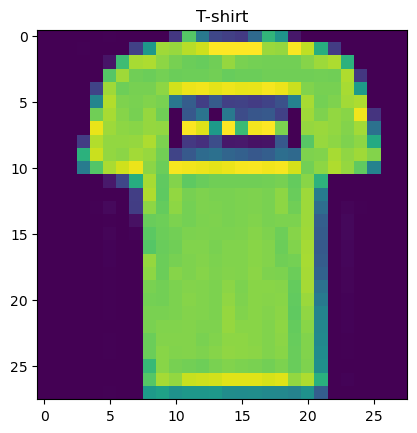

Numerical value equivalent to categorical variable : 0


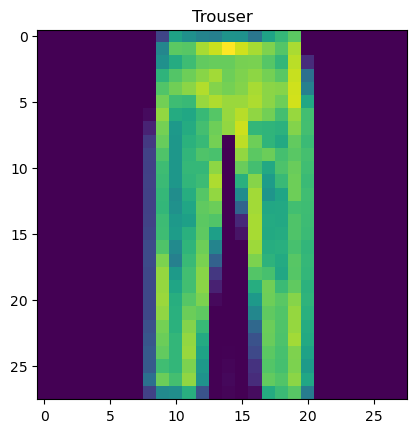

Numerical value equivalent to categorical variable : 0


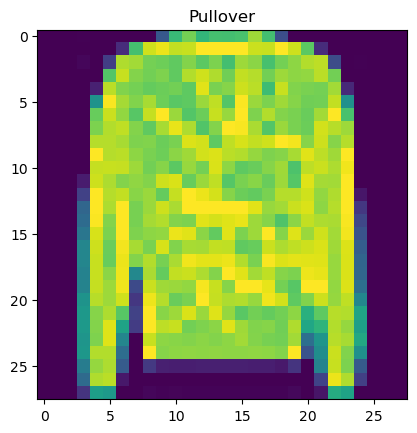

Numerical value equivalent to categorical variable : 3


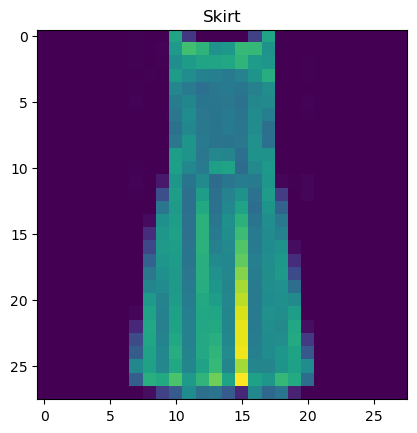

Numerical value equivalent to categorical variable : 0


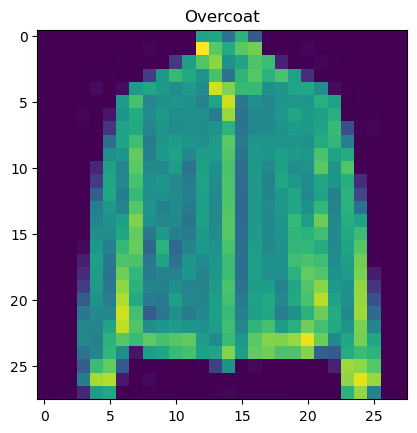

Numerical value equivalent to categorical variable : 2


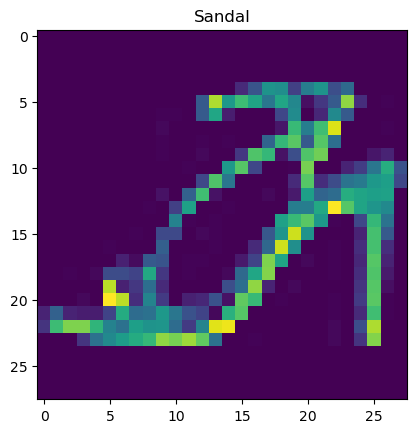

Numerical value equivalent to categorical variable : 7


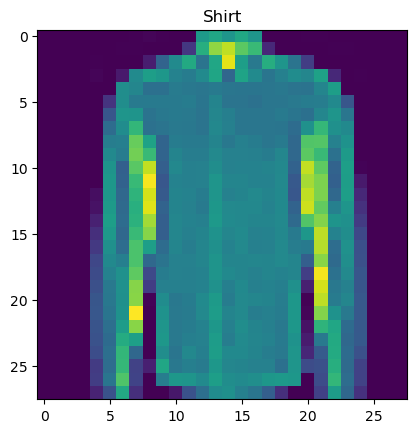

Numerical value equivalent to categorical variable : 2


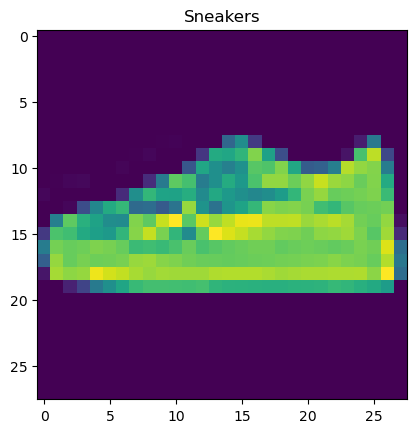

Numerical value equivalent to categorical variable : 5


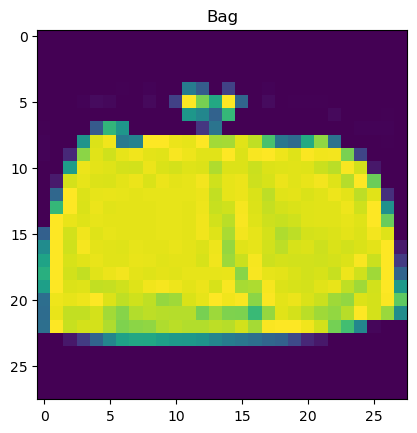

Numerical value equivalent to categorical variable : 5


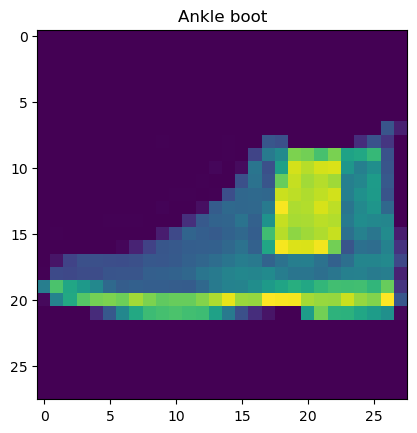

In [7]:
'''Plotting image of each category'''
for i in range(len(attributes)):
    print(f'Numerical value equivalent to categorical variable : {Y_train[i]}')
    plt.imshow(images_list[i], cmap=plt.get_cmap())
    plt.title(attributes[i])
    plt.show()

In [7]:
wandb.init(project="CS6910_ASSIGNMENT_1", name='Assignment_1_sample_imgs')
'''Displaying sample images in wandb'''
wandb.log({"Sample Image from each class": [wandb.Image(image, caption=caption) for image, 
                                            caption in zip(images_list,title)]})

In [8]:
'''CHANGING THE SHAPE OF INPUT DATA'''
x_train=np.zeros((60000,784))
for i in range(X_train.shape[0]):
    a=X_train[i].reshape(1,784)
    x_train[i]=a
print('Train data',x_train.shape)
x_test=np.zeros((10000,784))
for i in range(X_test.shape[0]):
    a=X_test[i].reshape(1,784)
    x_test[i]=a
print('Test data',x_test.shape)

Train data (60000, 784)
Test data (10000, 784)


In [9]:
'''CONVERTING OUTPUT DATA INTO ONE HOT VECTOR FORM'''
a = np.max(Y_train)+1
y_train=np.zeros((Y_train.shape[0],a))
for i in range(Y_train.shape[0]):
    for j in range(a):
        if Y_train[i]==j:
            y_train[i,j]=1
print('Train data',y_train.shape)
y_test=np.zeros((Y_test.shape[0],a))
for i in range(Y_test.shape[0]):
    for j in range(a):
        if Y_test[i]==j:
            y_test[i,j]=1
#print(y_test[0,:])
print('Test data',y_test.shape)

Train data (60000, 10)
Test data (10000, 10)


In [10]:
'''CREATING VALIDATION DATA SET'''
x_train,x_val,y_train,y_val = train_test_split(x_train,y_train,test_size=0.10,random_state=42)
x_train=x_train.T/255
y_train=y_train.T
x_test=x_test.T/255
y_test=y_test.T
x_val=x_val.T/255
y_val=y_val.T
print(x_train.shape)
print(x_test.shape)
print(x_val.shape)

(784, 54000)
(784, 10000)
(784, 6000)


In [11]:
'''ACTIVATION FUNCTIONS'''
#SIGMOID FUNCTION
def sigmoid_function(z):
    h=1/(1+np.exp(-z.astype("float")))
    return h

#TANH FUNCTION
def tanh_function(z):
    h=np.tanh(z.astype("float"))
    return h

#RELU FUNCTION
def relu_function(z):
    h=max(0,z)
    return h

#IDENTITY FUNCTION
def identity_function(z):
    return z


In [12]:
'''OUTPUT LAYER FUNCTION'''

#SOFTMAX FUNCTION
def softmax_function(z):
    expon=np.exp(z.astype("float"))
    h = expon/np.sum(expon,axis=0)
    return h

In [13]:
'''DERIVATIVE FUNCTIONS'''

#DERIVATIVE OF SIGMOID FUNCTION
def sigmoid_function_dash(z):
    h = sigmoid_function(z)
    return h*(1-h)


#DERIVATIVE OF TANH FUNCTION
def tanh_function_dash(z):
    h=tanh_function(z)
    return 1-(h)**2


#DERIVATIVE OF RELU FUNCTION
def relu_function_dash(z):
    h=relu_function(z)
    if h>0:
        return 1
    else:
        return 0
    
#DERIVATIVE OF IDENTITY FUNCTION
def identity_function_dash(z):
    h = identity_function(z)
    return np.ones(h.shape)



In [14]:
#CROSS ENTROPY FUNCTION(DERIVATIVE OF OUTPUT LAYER)
def cross_entropy_function(y,ycap,w,lambd):
    '''L2 Rregularization is used here'''

    m=y.shape[1]
    cost=-(1/m)*np.sum(y*np.log(ycap))
    regularization_cost=0
    for i in range(len(w)):
        regularization_cost += (lambd/(2*m))*np.sum(np.square(w[i]))
    return cost+regularization_cost
     
        
#MEAN SQUARED ERROR FUNCTION
def mean_squared_error_function(y,ycap):
    m = y.shape[1]
    a=np.argmax(ycap,axis=0)
    b=np.argmax(y,axis=0)
    mean_square_error = (1/m)*np.sum((a-b)**2)
    regularization_cost=0
    for i in range(len(w)):
        regularization_cost += (lambd/(2*m))*np.sum(np.square(w[i]))
    return mean_square_error + regularization_cost


In [15]:
#INITIALISE PARAMETERS
def random_initialization(layer_attributes):
    '''input:  Layer_attributes is a list consisting of number of 
    neurons in each layer. Here,input layer is considered as 0th Layer, output layer is considered as Lth layer
    and the layers from 1 to (L-1) are considered as hidden layers.Therefore, layer-attributes consists of (L+1) values. '''
    L=len(layer_attributes)-1
    W=[]
    B=[]
    for i in range(1,L+1):
        weight_i = np.random.uniform(-1,1,(layer_attributes[i],layer_attributes[i-1]))
        bias_i=np.zeros((layer_attributes[i],1))
        W.append(weight_i)
        B.append(bias_i)
    return W,B

def xavier_initialization(layer_attributes):
    L=len(layer_attributes)-1
    W=[]
    B=[]
    for i in range(1,L+1):
        lim = np.sqrt(6/(i+(i-1)))
        weight_i = np.random.uniform(-lim,lim,(layer_attributes[i],layer_attributes[i-1]))
        bias_i=np.zeros((layer_attributes[i],1))
        W.append(weight_i)
        B.append(bias_i)
    return W,B
        

In [16]:
#FORWARD PROPOGATION
def forward_propogation(x,w,b,activation='sigmoid_function'):
    
    '''Forward propogation is used to find the predicted value of output and cost function by going forward,starting from 
    input layer until the output layer.We calculate the pre-activation and activation values and returns the latter after each
    layer. The input parameters taken are input data set,weights and bias value, and activation function to be used where the 
    default is set as sigmoid function. Softmax function is used to find the values at the output layer.
    Here,z is the linear part and a is the non-linear part(activation function) of a neuron.'''
    A=[]
    Z=[]
    length=len(w)
    #Hidden layers
    A.append(x)
    for i in range(length-1):
        z_i=np.dot(w[i],A[-1])+b[i]
        Z.append(z_i)
        if activation =='sigmoid_function':
            a_i = sigmoid_function(z_i)
            A.append(a_i)
        elif activation=='tanh_function':
            a_i = tanh_function(z_i)
            A.append(a_i)
        elif activation == 'relu_function':
            a_i = relu_function(z_i)
            A.append(a_i)
        elif activation == 'identity_function':
            a_i = identity_function(z_i)
            A.append(a_i)
    #output layer
    z_l = np.dot(w[-1],A[-1]) + b[-1]
    a_l = softmax_function(z_l)
    A.append(a_l)
    Z.append(z_l)

    return Z,A


In [17]:
#BACK PROPOGATION
def back_propogation(A,y,W,B,Z,lambd,activation='sigmoid_function'):
    
    '''Back propogation is used to find the derivatives of each weights and biases at each layers by starting 
    from the output layer and travelling backwards.We find the derivatives wrto ouput layer,wrto hidden layer and eventually
    wrto weights and biases;dw=dJ/dw,db=dJ/db,dz=dJ/dz.'''
    m=y.shape[1]
    L=len(W)
    dW=[]
    dB=[]
    dZ=[]
    #Output Layer
    dZ.append(A[-1]-y)
    dB.append((1/m)*np.sum(dZ[-1],axis=1,keepdims=True))
    dW.append((1/m)*(np.dot(dZ[-1],A[-2].T))+(lambd/m)*W[-1])
   
    
    
    #Hidden layers
    l=L-1
    while l >0:
        if activation=='sigmoid_function':
            dz_l = (1/m)*np.dot(W[l].T,dZ[-1])*sigmoid_function_dash(A[l])
            db_l = (1/m)*np.sum(dz_l,axis=1,keepdims=True)
            dw_l = (1/m)*np.dot(dz_l,A[l-1].T) + (lambd/m)*W[l-1]
            dW.append(dw_l)
            dB.append(db_l)
            dZ.append(dz_l)
        
        elif activation == 'relu_function':
            dz_l = (1/m)*np.dot(W[l].T,dZ[-1])*relu_function_dash(A[l])
            db_l = (1/m)*np.sum(dz_l,axis=1,keepdims=True)
            dw_l = (1/m)*np.dot(dz_l,A[l-1].T) + (lambd/m)*W[l-1]
            dW.append(dw_l)
            dB.append(db_l)
            dZ.append(dz_l)
            
        elif activation=='tanh_function':
            dz_l = (1/m)*np.dot(W[l].T,dZ[-1])*tanh_function_dash(A[l])
            db_l = (1/m)*np.sum(dz_l,axis=1,keepdims=True)
            dw_l = (1/m)*np.dot(dz_l,A[l-1].T) + (lambd/m)*W[l-1]
            dW.append(dw_l)
            dB.append(db_l)
            dZ.append(dz_l)
            
        elif activation=='identity_function':
            dz_l = (1/m)*np.dot(W[l].T,dZ[-1])*identity_function_dash(A[l])
            db_l = (1/m)*np.sum(dz_l,axis=1,keepdims=True)
            dw_l = (1/m)*np.dot(dz_l,A[l-1].T) + (lambd/m)*W[l-1]
            dW.append(dw_l)
            dB.append(db_l)
            dZ.append(dz_l)
            
        l=l-1
            
    return dZ[::-1],dW[::-1],dB[::-1]

In [18]:
#OPTIMIZERS
def gradient_descent(W,B,dW,dB,learning_rate):
    '''Mini batch,vanilla and stochastic gradient descents can be performed using this function'''
    alpha=learning_rate
    length=len(W)
    for i in range(length):
        W[i] = W[i] - alpha*dW[i]
        B[i] = B[i] - alpha*dB[i]
    return W,B

def momentum_gradient_descent(w,b,dw,db,learning_rate,momentum,update_w,update_b):
    '''Nesterov accelarated gradient descent can also be implemented as a special case of Momentum gradient descent'''
    for i in range(len(w)):  
        update_w[i] = (momentum*update_w[i]) + dw[i]
        update_b[i] = (momentum*update_b[i]) + db[i]
        w[i] = w[i] - (learning_rate*update_w[i])
        b[i] = b[i] - (learning_rate*update_b[i])
    return w,b,update_w,update_b

def rms_prop(w,b,dw,db,learning_rate,beta,epsilon,v_t_w,v_t_b):
    '''RMSProp is an adaptive learning rate algorithm and the hyperparamteters used here are learning_rate(alpha) and beta.'''
    for i in range(len(w)):
        v_t_w[i] = beta*v_t_w[i] + (1-beta)*((dw[i])**2)
        v_t_b[i] = beta*v_t_b[i] + (1-beta)*((db[i])**2)
        w[i] = w[i] - (learning_rate/(np.sqrt(v_t_w[i]+epsilon)))*dw[i]
        b[i] = b[i] - (learning_rate/(np.sqrt(v_t_b[i]+epsilon)))*db[i]
        return w,b,v_t_w,v_t_b


def adam(w,b,dw,db,learning_rate,beta1,beta2,epsilon,m_w,m_b,v_w,v_b,t):
    
    m_w_cap=[]
    m_b_cap=[]
    v_w_cap=[]
    v_b_cap=[]
    for k in range(len(w)):
        upd_w=np.zeros((w[k].shape))
        upd_b=np.zeros((b[k].shape))
        m_w_cap.append(upd_w)
        m_b_cap.append(upd_b)
        v_w_cap.append(upd_w)
        v_b_cap.append(upd_b)
        
    for i in range(len(w)):
        m_w[i]=beta1*m_w[i]+(1-beta1)*dw[i]
        m_b[i]=beta1*m_b[i]+(1-beta1)*db[i]
        v_w[i]=beta2*v_w[i]+(1-beta2)*(dw[i]**2)
        v_b[i]=beta2*v_b[i]+(1-beta2)*(db[i]**2)
        m_w_cap[i] = (1/(1-math.pow(beta1,t)))*m_w[i]
        m_b_cap[i] = (1/(1-math.pow(beta1,t)))*m_b[i]
        v_w_cap[i] = (1/(1-math.pow(beta2,t)))*v_w[i]
        v_b_cap[i] = (1/(1-math.pow(beta2,t)))*v_b[i]
        w[i] = w[i] - (learning_rate/(np.sqrt(v_w_cap[i]+epsilon)))*m_w_cap[i]
        b[i] = b[i] - (learning_rate/(np.sqrt(v_b_cap[i]+epsilon)))*m_b_cap[i]
        
    return w,b,m_w,m_b,v_w,v_b

def nadam(w,b,dw,db,learning_rate,beta1,beta2,epsilon,m_w,m_b,v_w,v_b,t):
    
    m_w_cap=[]
    m_b_cap=[]
    v_w_cap=[]
    v_b_cap=[]
    for k in range(len(w)):
        upd_w=np.zeros((w[k].shape))
        upd_b=np.zeros((b[k].shape))
        m_w_cap.append(upd_w)
        m_b_cap.append(upd_b)
        v_w_cap.append(upd_w)
        v_b_cap.append(upd_b)
        
    for i in range(len(w)):
        
        m_w[i] = beta1*m_w[i] + (1-beta1)*dw[i]
        m_b[i] = beta1*m_b[i] + (1-beta1)*db[i]
        v_w[i] = beta2*v_w[i] + (1-beta2)*(dw[i])**2
        v_b[i] = beta2*v_b[i] + (1-beta2)*(db[i])**2
        m_w_cap[i] = (1/(1-beta1**t))*m_w[i]
        m_b_cap[i] = (1/(1-beta1**t))*m_b[i]
        v_w_cap[i] = (1/(1-beta2**t))*v_w[i]
        v_b_cap[i] = (1/(1-beta2**t))*v_b[i]
        w[i] = w[i]-(learning_rate/np.sqrt(v_w_cap[i]+epsilon))*(beta1*m_w_cap[i]+(1-beta1)*dw[i]/(1-beta1**t))
        b[i] = b[i]-(learning_rate/np.sqrt(v_b_cap[i]+epsilon))*(beta1*m_b_cap[i]+(1-beta1)*db[i]/(1-beta1**t))
        
    return w,b,m_w,m_b,v_w,v_b
        
                                                                   

In [19]:
#FUNCTION FOR PLOTS
def plot_error(j_train, j_val):
    plt.plot(list(range(len(j_train))), j_train, 'r', label="Train Loss")
    plt.plot(list(range(len(j_val))), j_val, 'lime', label="Validation Loss")
    plt.title("Training and Validation Loss vs No. of Epochs", size=16)
    plt.xlabel("No. of epochs", size=16)
    plt.ylabel("Loss", size=16)
    plt.legend()
    plt.grid()
    plt.show()
    
def plot_accuracy(acc_train, acc_val):
    plt.plot(list(range(len(acc_train))), acc_train, 'r', label="Train Accuracy")
    plt.plot(list(range(len(acc_val))), acc_val, 'lime', label="Validation Accuracy")
    plt.title("Training and Validation Accuracy vs No. of Epochs", size=16)
    plt.xlabel("No. of epochs", size=16)
    plt.ylabel("Accuracy", size=16)
    plt.legend()
    plt.grid()
    plt.show()

In [20]:
def accuracy(y,yout):
    '''Function to find the accuracy taking y and ypred as input and returns accracy value.'''
    yout=np.argmax(yout,axis=0)
    y = np.argmax(y,axis=0)   
    acc=np.mean(y==yout)*100
    return acc
    

In [22]:
#def neural_network(learning_rate = 0.1,momentum = 0.5,beta=0.5,beta1=0.5,beta2=0.5,epochs = 1,num_hidden_layers = 1,neurons=4,batch_size=4,epsilon=0.00000001,weight_init='random_initialization',
                   #activation='sigmoid_function',loss='cross_entropy_function',optimizer='stochastic_gradient_descent',lambd=0):
def neural_network():
    
    # Default values for hyper-parameters
    config_defaults = {
        'learning_rate': 0.1,
        'activation': 'sigmoid_function',
        'weight_init': 'random_initialization',
        'optimizer': 'stochastic_gradient_descent',
        'batch_size': 4,
        'epochs': 10,
        'lambd': 0,
        'neurons': 4,
        'num_hidden_layers': 1,
        'momentum':0.5,
        'beta':0.5,
        'beta1':0.5,
        'beta2':0.5,
        'loss':'cross_entropy_function'
        }

    # Initialize a new wandb run
    wandb.init(config=config_defaults)
    
    # Config is a variable that holds and saves hyperparameters and inputs
    config = wandb.config

    # Local variables, values obtained from wandb config
    learning_rate = config.learning_rate
    activation = config.activation
    weight_init = config.weight_init
    optimizer = config.optimizer
    batch_size = config.batch_size
    epochs = config.epochs
    lambd = config.lambd
    neurons = config.neurons
    num_hidden_layers = config.num_hidden_layers
    momentum=config.momentum
    beta = config.beta
    beta1=config.beta1
    beta2=config.beta2
    loss=config.loss
    
    run_name= f'lr_{learning_rate}_acti_{activation}_w_in{weight_init}_opt_{optimizer}_epoch_{epochs}_num_hid_{num_hidden_layers}_loss_{loss}_batchsize_{batch_size}_neur_{neurons}_lam_{lambd}_momentum_{momentum}_beta_{beta}_beta1_{beta1}_beta2_{beta2}'
    print(run_name)
    
    epsilon=0.00000001
    layer=[]
    n,m=x_train.shape
    J_train=[]
    Accuracy_train=[]
    J_val=[]
    Accuracy_val=[]
    layer.append(x_train.shape[0])
    for i in range(num_hidden_layers):
        layer.append(neurons)
    layer.append(y_train.shape[0])
    print(f'neuron configuration: {layer}')
    if weight_init=='random_initialization':
        w,b=random_initialization(layer)
    elif weight_init=='xavier_initialization':
        w,b=xavier_initialization(layer)
    update_w=[]
    update_b=[]
    w_lookahead=[]
    b_lookahead=[]
    v_t_w=[]
    v_t_b=[]
    m_w=[]
    m_b=[]
    v_w=[]
    v_b=[]
    for k in range(len(w)):
        upd_w=np.zeros((w[k].shape))
        upd_b=np.zeros((b[k].shape))
        update_w.append(upd_w)
        w_lookahead.append(upd_w)
        update_b.append(upd_b)
        b_lookahead.append(upd_b)
        v_t_w.append(upd_w)
        v_t_b.append(upd_b)
        m_w.append(upd_w)
        m_b.append(upd_b)
        v_w.append(upd_w)
        v_b.append(upd_b)
        
    num_batches = x_train.shape[1]//batch_size
    
    if optimizer=='vanilla_gradient_descent':
        
        for j in range(epochs):
            z,a = forward_propogation(x_train,w,b,activation)
            dz,dw,db=back_propogation(a,y_train,w,b,z,lambd,activation)
            w,b=gradient_descent(w,b,dw,db,learning_rate)
            cost_train=cross_entropy_function(y_train,a[-1],w,lambd)
            J_train.append(cost_train)
            acc_train = accuracy(y_train,a[-1])
            Accuracy_train.append(acc_train)
            z_val,a_val = forward_propogation(x_val,w,b,activation)
            cost_val = cross_entropy_function(y_val,a_val[-1],w,lambd)
            J_val.append(cost_val)
            acc_val = accuracy(y_val,a_val[-1])
            wandb.log({"accuracy_train": acc_train, "accuracy_validation": acc_val, "loss_train": cost_train, "cost_validation": cost_val, 'epochs': j})
            Accuracy_val.append(acc_val)
            #if j%(epochs/10)==0:
        print(f' \n epoch:{j:4d}  Train error:  {J_train[-1]:8.2f}  Train accuracy: {Accuracy_train[-1]:8.2f} Val error: {J_val[-1]:8.2f} Val accuracy: {Accuracy_val[-1]:8.2f}')
            #if j%((epochs/10)/5)==0:
                #print('==',end='')
            
    if optimizer=='stochastic_gradient_descent':
        
        
        for j in range(epochs):
            for i in range(m):
                x_data = x_train[:,i].reshape(x_train.shape[0],1)
                y_data = y_train[:,i].reshape(y_train.shape[0],1)
                z,a = forward_propogation(x_data,w,b,activation)
                dz,dw,db=back_propogation(a,y_data,w,b,z,lambd,activation)
                w,b=gradient_descent(w,b,dw,db,learning_rate)
            z,a = forward_propogation(x_train,w,b,activation)
            cost_train=cross_entropy_function(y_train,a[-1],w,lambd)
            J_train.append(cost_train)
            acc_train = accuracy(y_train,a[-1])
            Accuracy_train.append(acc_train)
            z_val,a_val = forward_propogation(x_val,w,b,activation)
            cost_val = cross_entropy_function(y_val,a_val[-1],w,lambd)
            J_val.append(cost_val)
            acc_val = accuracy(y_val,a_val[-1])
            wandb.log({"accuracy_train": acc_train, "accuracy_validation": acc_val, "loss_train": cost_train, "cost_validation": cost_val, 'epochs': j})
            Accuracy_val.append(acc_val)
            #if j%(epochs/10)==0:
        print(f' \n epoch:{j:4d}  Train error:  {J_train[-1]:8.2f}  Train accuracy: {Accuracy_train[-1]:8.2f} Val error: {J_val[-1]:8.2f} Val accuracy: {Accuracy_val[-1]:8.2f}')
            #if j%((epochs/10)/5)==0:
                #print('==',end='')
            
    if optimizer=='momentum_gradient_descent':
            
        for j in range(epochs):
            
            for i in range(num_batches):
                x_mb = x_train[:,i*batch_size:(i+1)*batch_size].reshape(x_train.shape[0],batch_size)
                y_mb = y_train[:,i*batch_size:(i+1)*batch_size].reshape(y_train.shape[0],batch_size)
                z,a = forward_propogation(x_mb,w,b,activation)
                dz,dw,db=back_propogation(a,y_mb,w,b,z,lambd,activation)
                w,b,update_w,update_b = momentum_gradient_descent(w,b,dw,db,learning_rate,momentum,update_w,update_b)
            if x_train.shape[1] % batch_size !=0:
                x_last = x_train[:,num_batches*batch_size:]
                y_last = y_train[:,num_batches*batch_size:]
                z,a = forward_propogation(x_last,w,b,activation)
                dz,dw,db=back_propogation(a,y_last,w,b,z,lambd,activation)
                w,b,update_w,update_b = momentum_gradient_descent(w,b,dw,db,learning_rate,momentum,update_w,update_b)
            z,a = forward_propogation(x_train,w,b,activation)
            cost_train=cross_entropy_function(y_train,a[-1],w,lambd)
            J_train.append(cost_train)
            acc_train = accuracy(y_train,a[-1])
            Accuracy_train.append(acc_train)
            z_val,a_val = forward_propogation(x_val,w,b,activation)
            cost_val = cross_entropy_function(y_val,a_val[-1],w,lambd)
            J_val.append(cost_val)
            acc_val = accuracy(y_val,a_val[-1])
            wandb.log({"accuracy_train": acc_train, "accuracy_validation": acc_val, "loss_train": cost_train, "cost_validation": cost_val, 'epochs': j})
            Accuracy_val.append(acc_val)
            #if j%(epochs/10)==0:
        print(f' \n epoch:{j:4d}  Train error:  {J_train[-1]:8.2f}  Train accuracy: {Accuracy_train[-1]:8.2f} Val error: {J_val[-1]:8.2f} Val accuracy: {Accuracy_val[-1]:8.2f}')
            #if j%((epochs/10)/5)==0:
                #print('==',end='')
                
    if optimizer == 'nesterov_accelarated_gradient_descent':
        
        for j in range(epochs):
            
            for i in range(num_batches):
                x_mb = x_train[:,i*batch_size:(i+1)*batch_size].reshape(x_train.shape[0],batch_size)
                y_mb = y_train[:,i*batch_size:(i+1)*batch_size].reshape(y_train.shape[0],batch_size)
                for i in range(len(w)):
                    w_lookahead[i] = w[i]-momentum*update_w[i]
                    b_lookahead[i] = b[i]-momentum*update_b[i]
                z,a = forward_propogation(x_mb,w_lookahead,b_lookahead,activation)
                dz,dw,db=back_propogation(a,y_mb,w_lookahead,b_lookahead,z,lambd,activation)
                w,b,update_w,update_b = momentum_gradient_descent(w,b,dw,db,learning_rate,momentum,update_w,update_b)
            if x_train.shape[1] % batch_size !=0:
                x_last = x_train[:,num_batches*batch_size:]
                y_last = y_train[:,num_batches*batch_size:]
                z,a = forward_propogation(x_last,w_lookahead,b_lookahead,activation)
                dz,dw,db=back_propogation(a,y_last,w_lookahead,b_lookahead,z,lambd,activation)
                w,b,update_w,update_b = momentum_gradient_descent(w,b,dw,db,learning_rate,momentum,update_w,update_b)
                
            z,a = forward_propogation(x_train,w,b,activation,w,lambd)
            cost_train=cross_entropy_function(y_train,a[-1])
            J_train.append(cost_train)
            acc_train = accuracy(y_train,a[-1])
            Accuracy_train.append(acc_train)
            z_val,a_val = forward_propogation(x_val,w,b,activation)
            cost_val = cross_entropy_function(y_val,a_val[-1],w,lambd)
            J_val.append(cost_val)
            acc_val = accuracy(y_val,a_val[-1])
            wandb.log({"accuracy_train": acc_train, "accuracy_validation": acc_val, "loss_train": cost_train, "cost_validation": cost_val, 'epochs': j})
            Accuracy_val.append(acc_val)
            #if j%(epochs/10)==0:
        print(f' \n epoch:{j:4d}  Train error:  {J_train[-1]:8.2f}  Train accuracy: {Accuracy_train[-1]:8.2f} Val error: {J_val[-1]:8.2f} Val accuracy: {Accuracy_val[-1]:8.2f}')
            #if j%((epochs/10)/5)==0:
                #print('==',end='')
                
                
    if optimizer == 'rms_prop':
            
        for j in range(epochs):
            
            for i in range(num_batches):
                x_mb = x_train[:,i*batch_size:(i+1)*batch_size].reshape(x_train.shape[0],batch_size)
                y_mb = y_train[:,i*batch_size:(i+1)*batch_size].reshape(y_train.shape[0],batch_size)
                z,a = forward_propogation(x_mb,w,b,activation)
                dz,dw,db=back_propogation(a,y_mb,w,b,z,lambd,activation)
                w,b,v_t_w,v_t_b = rms_prop(w,b,dw,db,learning_rate,beta,epsilon,v_t_w,v_t_b)
            if x_train.shape[1] % batch_size !=0:
                x_last = x_train[:,num_batches*batch_size:]
                y_last = y_train[:,num_batches*batch_size:]
                z,a = forward_propogation(x_last,w,b,activation)
                dz,dw,db=back_propogation(a,y_last,w,b,z,lambd,activation)
                w,b,v_t_w,v_t_b = rms_prop(w,b,dw,db,learning_rate,beta,epsilon,v_t_w,v_t_b)
            z,a = forward_propogation(x_train,w,b,activation)
            cost_train=cross_entropy_function(y_train,a[-1],w,lambd)
            J_train.append(cost_train)
            acc_train = accuracy(y_train,a[-1])
            Accuracy_train.append(acc_train)
            z_val,a_val = forward_propogation(x_val,w,b,activation)
            cost_val = cross_entropy_function(y_val,a_val[-1],w,lambd)
            J_val.append(cost_val)
            acc_val = accuracy(y_val,a_val[-1])
            wandb.log({"accuracy_train": acc_train, "accuracy_validation": acc_val, "loss_train": cost_train, "cost_validation": cost_val, 'epochs': j})
            Accuracy_val.append(acc_val)
            #if j%(epochs/10)==0:
        print(f' \n epoch:{j:4d}  Train error:  {J_train[-1]:8.2f}  Train accuracy: {Accuracy_train[-1]:8.2f} Val error: {J_val[-1]:8.2f} Val accuracy: {Accuracy_val[-1]:8.2f}')
            #if j%((epochs/10)/5)==0:
                #print('==',end='')
                
                
    if optimizer == 'adam':
        for  j in range(epochs):
            
            for i in range(num_batches):
                x_mb = x_train[:,i*batch_size:(i+1)*batch_size].reshape(x_train.shape[0],batch_size)
                y_mb = y_train[:,i*batch_size:(i+1)*batch_size].reshape(y_train.shape[0],batch_size)
                z,a = forward_propogation(x_mb,w,b,activation)
                dz,dw,db=back_propogation(a,y_mb,w,b,z,lambd,activation)
                w,b,m_w,m_b,v_w,v_b = adam(w,b,dw,db,learning_rate,beta1,beta2,epsilon,m_w,m_b,v_w,v_b,j+1)
            if x_train.shape[1] % batch_size !=0:
                x_last = x_train[:,num_batches*batch_size:]
                y_last = y_train[:,num_batches*batch_size:]
                z,a = forward_propogation(x_last,w,b,activation)
                dz,dw,db=back_propogation(a,y_last,w,b,z,lambd,activation)
                w,b,m_w,m_b,v_w,v_b = adam(w,b,dw,db,learning_rate,beta1,beta2,epsilon,m_w,m_b,v_w,v_b,j+1)
            z,a=forward_propogation(x_train,w,b,activation)
            cost_train=cross_entropy_function(y_train,a[-1],w,lambd)
            J_train.append(cost_train)
            acc_train = accuracy(y_train,a[-1])
            Accuracy_train.append(acc_train)
            z_val,a_val = forward_propogation(x_val,w,b,activation)
            cost_val = cross_entropy_function(y_val,a_val[-1],w,lambd)
            J_val.append(cost_val)
            acc_val = accuracy(y_val,a_val[-1])
            wandb.log({"accuracy_train": acc_train, "accuracy_validation": acc_val, "loss_train": cost_train, "cost_validation": cost_val, 'epochs': j})
            Accuracy_val.append(acc_val)
            #if j%(epochs/10)==0:
        print(f' \n epoch:{j:4d}  Train error:  {J_train[-1]:8.2f}  Train accuracy: {Accuracy_train[-1]:8.2f} Val error: {J_val[-1]:8.2f} Val accuracy: {Accuracy_val[-1]:8.2f}')
            #if j%((epochs/10)/5)==0:
                #print('==',end='')
                
                
    if optimizer =='nadam':
        for  j in range(epochs):
            
            for i in range(num_batches):
                x_mb = x_train[:,i*batch_size:(i+1)*batch_size].reshape(x_train.shape[0],batch_size)
                y_mb = y_train[:,i*batch_size:(i+1)*batch_size].reshape(y_train.shape[0],batch_size)
                z,a = forward_propogation(x_mb,w,b,activation)
                dz,dw,db=back_propogation(a,y_mb,w,b,z,lambd,activation)
                w,b,m_w,m_b,v_w,v_b = nadam(w,b,dw,db,learning_rate,beta1,beta2,epsilon,m_w,m_b,v_w,v_b,j+1)
            if x_train.shape[1] % batch_size !=0:
                x_last = x_train[:,num_batches*batch_size:]
                y_last = y_train[:,num_batches*batch_size:]
                z,a = forward_propogation(x_last,w,b,activation)
                dz,dw,db=back_propogation(a,y_last,w,b,z,lambd,activation)
                w,b,m_w,m_b,v_w,v_b = nadam(w,b,dw,db,learning_rate,beta1,beta2,epsilon,m_w,m_b,v_w,v_b,j+1)
            z,a=forward_propogation(x_train,w,b,activation)
            cost_train=cross_entropy_function(y_train,a[-1],w,lambd)
            J_train.append(cost_train)
            acc_train = accuracy(y_train,a[-1])
            Accuracy_train.append(acc_train)
            z_val,a_val = forward_propogation(x_val,w,b,activation)
            cost_val = cross_entropy_function(y_val,a_val[-1],w,lambd)
            J_val.append(cost_val)
            acc_val = accuracy(y_val,a_val[-1])
            wandb.log({"accuracy_train": acc_train, "accuracy_validation": acc_val, "loss_train": cost_train, "cost_validation": cost_val, 'epochs': j})
            Accuracy_val.append(acc_val)
            #if j%(epochs/10)==0:
        print(f' \n epoch:{j:4d}  Train error:  {J_train[-1]:8.2f}  Train accuracy: {Accuracy_train[-1]:8.2f} Val error: {J_val[-1]:8.2f} Val accuracy: {Accuracy_val[-1]:8.2f}')
            #if j%((epochs/10)/5)==0:
                #print('==',end='')
        
            
            
    #plot_error(J_train,J_val)
    plot_accuracy(Accuracy_train,Accuracy_val)
    
    wandb.run.name = run_name
    wandb.run.save()
    wandb.run.finish()
    
    return w,b,J_train,J_val
        
        
        
        

Create sweep with ID: i6vhkxkf
Sweep URL: https://wandb.ai/ananthu2014/CS6910_ASSIGNMENT_1/sweeps/i6vhkxkf


wandb: Agent Starting Run: ysllsqih with config:
wandb: 	activation: sigmoid_function
wandb: 	batch_size: 4
wandb: 	beta: 0.5
wandb: 	beta1: 0.9
wandb: 	beta2: 0.99
wandb: 	epochs: 20
wandb: 	lambd: 0
wandb: 	learning_rate: 0.001
wandb: 	loss: mean_squared_error_function
wandb: 	momentum: 0.9
wandb: 	neurons: 128
wandb: 	num_hidden_layers: 3
wandb: 	optimizer: nestorov_accelarated_gradient_descent
wandb: 	weight_init: xavier_initialization


lr_0.001_acti_sigmoid_function_w_inxavier_initialization_opt_nestorov_accelarated_gradient_descent_epoch_20_num_hid_3_loss_mean_squared_error_function_batchsize_4_neur_128_lam_0_momentum_0.9_beta_0.5_beta1_0.9_beta2_0.99
neuron configuration: [784, 128, 128, 128, 10]


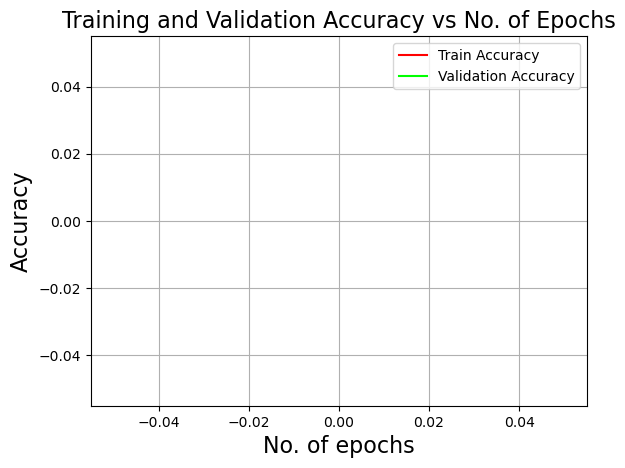

wandb: WARNING Calling wandb.run.save without any arguments is deprecated.Changes to attributes are automatically persisted.


wandb: Agent Starting Run: rsdvcz2l with config:
wandb: 	activation: tanh_function
wandb: 	batch_size: 32
wandb: 	beta: 0.9
wandb: 	beta1: 0.9
wandb: 	beta2: 0.99
wandb: 	epochs: 10
wandb: 	lambd: 0
wandb: 	learning_rate: 0.001
wandb: 	loss: mean_squared_error_function
wandb: 	momentum: 0.8
wandb: 	neurons: 64
wandb: 	num_hidden_layers: 3
wandb: 	optimizer: rms_prop
wandb: 	weight_init: random_initialization


lr_0.001_acti_tanh_function_w_inrandom_initialization_opt_rms_prop_epoch_10_num_hid_3_loss_mean_squared_error_function_batchsize_32_neur_64_lam_0_momentum_0.8_beta_0.9_beta1_0.9_beta2_0.99
neuron configuration: [784, 64, 64, 64, 10]
 
 epoch:   9  Train error:      1.39  Train accuracy:    63.09 Val error:     1.42 Val accuracy:    62.13


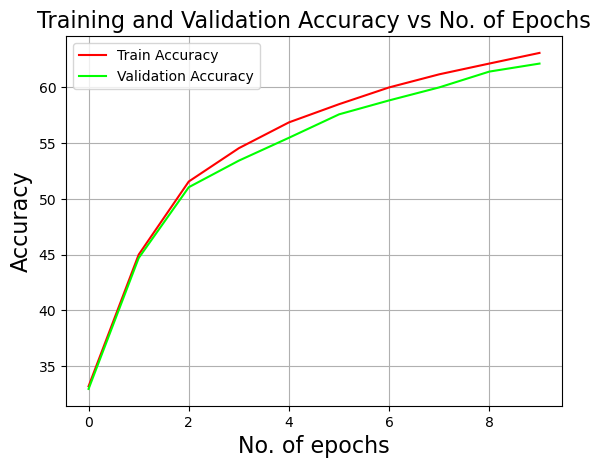

wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 431olk4g with config:
wandb: 	activation: tanh_function
wandb: 	batch_size: 4
wandb: 	beta: 0.5
wandb: 	beta1: 0.9
wandb: 	beta2: 0.99
wandb: 	epochs: 5
wandb: 	lambd: 0
wandb: 	learning_rate: 0.1
wandb: 	loss: cross_entropy_function
wandb: 	momentum: 0.8
wandb: 	neurons: 128
wandb: 	num_hidden_layers: 3
wandb: 	optimizer: nestorov_accelarated_gradient_descent
wandb: 	weight_init: xavier_initialization


lr_0.1_acti_tanh_function_w_inxavier_initialization_opt_nestorov_accelarated_gradient_descent_epoch_5_num_hid_3_loss_cross_entropy_function_batchsize_4_neur_128_lam_0_momentum_0.8_beta_0.5_beta1_0.9_beta2_0.99
neuron configuration: [784, 128, 128, 128, 10]


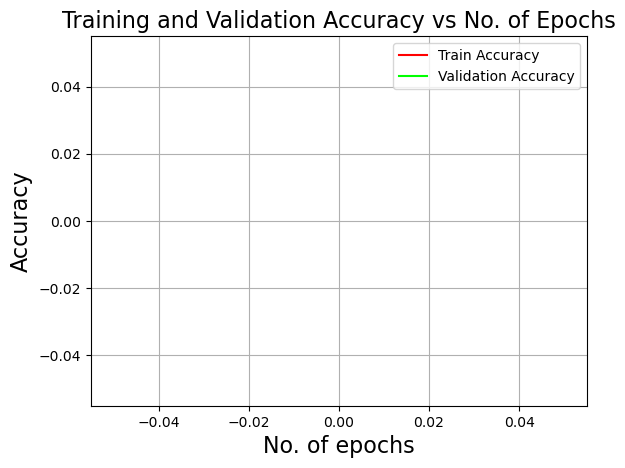

wandb: Agent Starting Run: 9zer8sux with config:
wandb: 	activation: relu_function
wandb: 	batch_size: 32
wandb: 	beta: 0.9
wandb: 	beta1: 0.9
wandb: 	beta2: 0.99
wandb: 	epochs: 10
wandb: 	lambd: 0.5
wandb: 	learning_rate: 0.01
wandb: 	loss: mean_squared_error_function
wandb: 	momentum: 0.9
wandb: 	neurons: 128
wandb: 	num_hidden_layers: 3
wandb: 	optimizer: nadam
wandb: 	weight_init: random_initialization


lr_0.01_acti_relu_function_w_inrandom_initialization_opt_nadam_epoch_10_num_hid_3_loss_mean_squared_error_function_batchsize_32_neur_128_lam_0.5_momentum_0.9_beta_0.9_beta1_0.9_beta2_0.99
neuron configuration: [784, 128, 128, 128, 10]


Run 9zer8sux errored: ValueError('The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()')
wandb: ERROR Run 9zer8sux errored: ValueError('The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()')
wandb: Agent Starting Run: 9ccwkknk with config:
wandb: 	activation: identity_function
wandb: 	batch_size: 256
wandb: 	beta: 0.5
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	epochs: 40
wandb: 	lambd: 0
wandb: 	learning_rate: 0.1
wandb: 	loss: cross_entropy_function
wandb: 	momentum: 0.9
wandb: 	neurons: 32
wandb: 	num_hidden_layers: 4
wandb: 	optimizer: stochastic_gradient_descent
wandb: 	weight_init: xavier_initialization


lr_0.1_acti_identity_function_w_inxavier_initialization_opt_stochastic_gradient_descent_epoch_40_num_hid_4_loss_cross_entropy_function_batchsize_256_neur_32_lam_0_momentum_0.9_beta_0.5_beta1_0.9_beta2_0.999
neuron configuration: [784, 32, 32, 32, 32, 10]


C:\Users\anant\AppData\Local\Temp\ipykernel_720\1055133583.py:5: RuntimeWarning: overflow encountered in exp
  expon=np.exp(z.astype("float"))
C:\Users\anant\AppData\Local\Temp\ipykernel_720\1055133583.py:6: RuntimeWarning: invalid value encountered in true_divide
  h = expon/np.sum(expon,axis=0)


 
 epoch:  39  Train error:       nan  Train accuracy:    10.01 Val error:      nan Val accuracy:     9.95


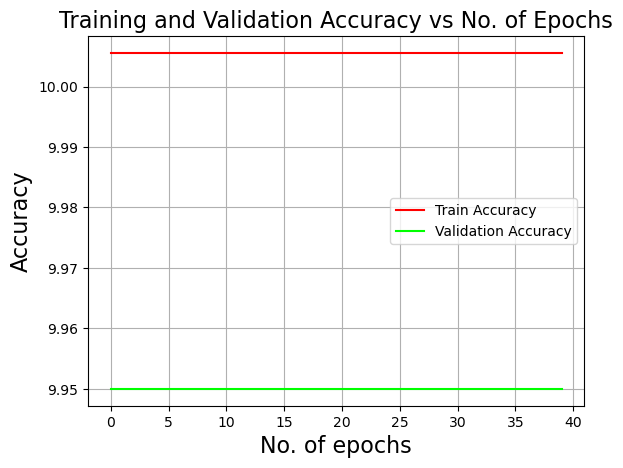

wandb: Agent Starting Run: 144mep1x with config:
wandb: 	activation: sigmoid_function
wandb: 	batch_size: 128
wandb: 	beta: 0.9
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	epochs: 40
wandb: 	lambd: 0
wandb: 	learning_rate: 0.1
wandb: 	loss: cross_entropy_function
wandb: 	momentum: 0.5
wandb: 	neurons: 32
wandb: 	num_hidden_layers: 4
wandb: 	optimizer: nestorov_accelarated_gradient_descent
wandb: 	weight_init: xavier_initialization


lr_0.1_acti_sigmoid_function_w_inxavier_initialization_opt_nestorov_accelarated_gradient_descent_epoch_40_num_hid_4_loss_cross_entropy_function_batchsize_128_neur_32_lam_0_momentum_0.5_beta_0.9_beta1_0.9_beta2_0.999
neuron configuration: [784, 32, 32, 32, 32, 10]


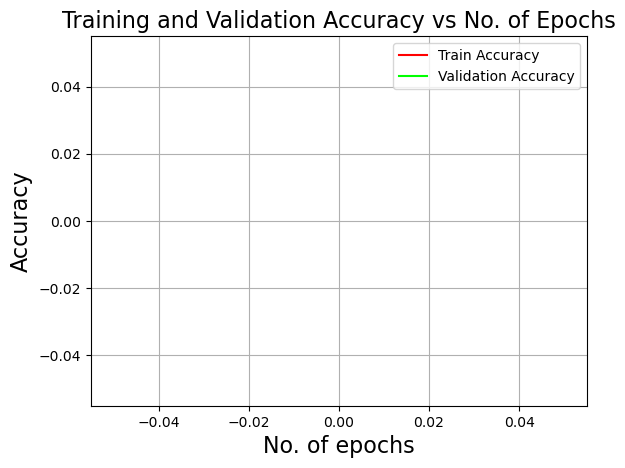

wandb: Agent Starting Run: olt7ghcd with config:
wandb: 	activation: relu_function
wandb: 	batch_size: 128
wandb: 	beta: 0.9
wandb: 	beta1: 0.9
wandb: 	beta2: 0.99
wandb: 	epochs: 20
wandb: 	lambd: 0.0005
wandb: 	learning_rate: 0.0001
wandb: 	loss: cross_entropy_function
wandb: 	momentum: 0.8
wandb: 	neurons: 128
wandb: 	num_hidden_layers: 4
wandb: 	optimizer: rms_prop
wandb: 	weight_init: xavier_initialization


lr_0.0001_acti_relu_function_w_inxavier_initialization_opt_rms_prop_epoch_20_num_hid_4_loss_cross_entropy_function_batchsize_128_neur_128_lam_0.0005_momentum_0.8_beta_0.9_beta1_0.9_beta2_0.99
neuron configuration: [784, 128, 128, 128, 128, 10]


Run olt7ghcd errored: ValueError('The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()')
wandb: ERROR Run olt7ghcd errored: ValueError('The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()')
wandb: Agent Starting Run: 9x5s1za3 with config:
wandb: 	activation: relu_function
wandb: 	batch_size: 32
wandb: 	beta: 0.5
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	epochs: 40
wandb: 	lambd: 0.0005
wandb: 	learning_rate: 0.01
wandb: 	loss: mean_squared_error_function
wandb: 	momentum: 0.8
wandb: 	neurons: 128
wandb: 	num_hidden_layers: 4
wandb: 	optimizer: rms_prop
wandb: 	weight_init: random_initialization


lr_0.01_acti_relu_function_w_inrandom_initialization_opt_rms_prop_epoch_40_num_hid_4_loss_mean_squared_error_function_batchsize_32_neur_128_lam_0.0005_momentum_0.8_beta_0.5_beta1_0.9_beta2_0.999
neuron configuration: [784, 128, 128, 128, 128, 10]


Run 9x5s1za3 errored: ValueError('The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()')
wandb: ERROR Run 9x5s1za3 errored: ValueError('The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()')
wandb: Agent Starting Run: 3zafwk3g with config:
wandb: 	activation: tanh_function
wandb: 	batch_size: 64
wandb: 	beta: 0.9
wandb: 	beta1: 0.9
wandb: 	beta2: 0.99
wandb: 	epochs: 5
wandb: 	lambd: 0.0005
wandb: 	learning_rate: 0.1
wandb: 	loss: cross_entropy_function
wandb: 	momentum: 0.5
wandb: 	neurons: 128
wandb: 	num_hidden_layers: 4
wandb: 	optimizer: rms_prop
wandb: 	weight_init: random_initialization


lr_0.1_acti_tanh_function_w_inrandom_initialization_opt_rms_prop_epoch_5_num_hid_4_loss_cross_entropy_function_batchsize_64_neur_128_lam_0.0005_momentum_0.5_beta_0.9_beta1_0.9_beta2_0.99
neuron configuration: [784, 128, 128, 128, 128, 10]
 
 epoch:   4  Train error:      5.42  Train accuracy:    38.76 Val error:     5.39 Val accuracy:    39.10


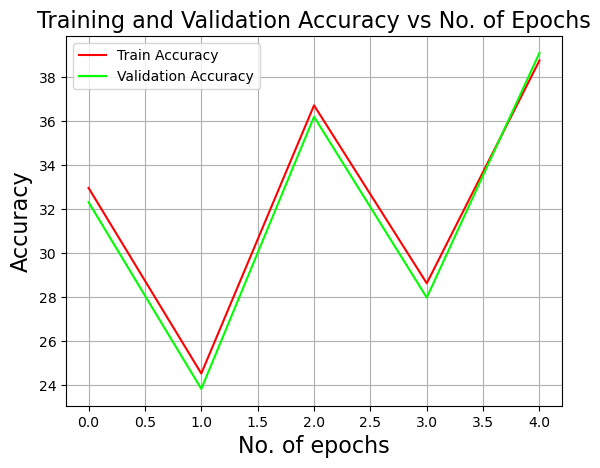

wandb: Agent Starting Run: ua7u9aa6 with config:
wandb: 	activation: sigmoid_function
wandb: 	batch_size: 64
wandb: 	beta: 0.5
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	epochs: 10
wandb: 	lambd: 0
wandb: 	learning_rate: 0.01
wandb: 	loss: mean_squared_error_function
wandb: 	momentum: 0.9
wandb: 	neurons: 128
wandb: 	num_hidden_layers: 5
wandb: 	optimizer: vanilla_gradient_descent
wandb: 	weight_init: random_initialization


lr_0.01_acti_sigmoid_function_w_inrandom_initialization_opt_vanilla_gradient_descent_epoch_10_num_hid_5_loss_mean_squared_error_function_batchsize_64_neur_128_lam_0_momentum_0.9_beta_0.5_beta1_0.9_beta2_0.999
neuron configuration: [784, 128, 128, 128, 128, 128, 10]
 
 epoch:   9  Train error:      4.53  Train accuracy:    16.37 Val error:     4.47 Val accuracy:    16.13


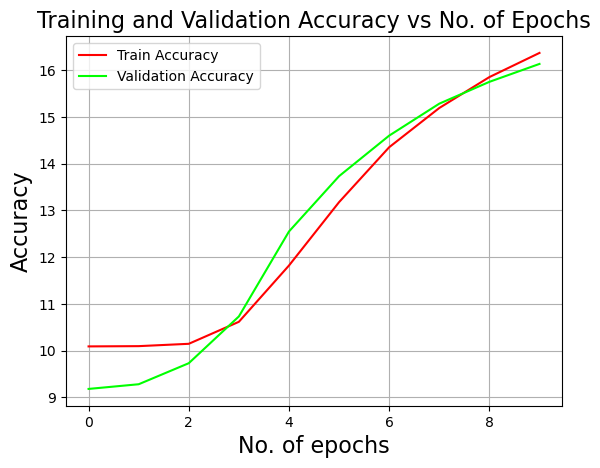

wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: qhd9qdlz with config:
wandb: 	activation: identity_function
wandb: 	batch_size: 256
wandb: 	beta: 0.9
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	epochs: 40
wandb: 	lambd: 0
wandb: 	learning_rate: 0.0001
wandb: 	loss: mean_squared_error_function
wandb: 	momentum: 0.5
wandb: 	neurons: 64
wandb: 	num_hidden_layers: 5
wandb: 	optimizer: nadam
wandb: 	weight_init: random_initialization


lr_0.0001_acti_identity_function_w_inrandom_initialization_opt_nadam_epoch_40_num_hid_5_loss_mean_squared_error_function_batchsize_256_neur_64_lam_0_momentum_0.5_beta_0.9_beta1_0.9_beta2_0.999
neuron configuration: [784, 64, 64, 64, 64, 64, 10]
 
 epoch:  39  Train error:       nan  Train accuracy:    10.01 Val error:      nan Val accuracy:     9.95


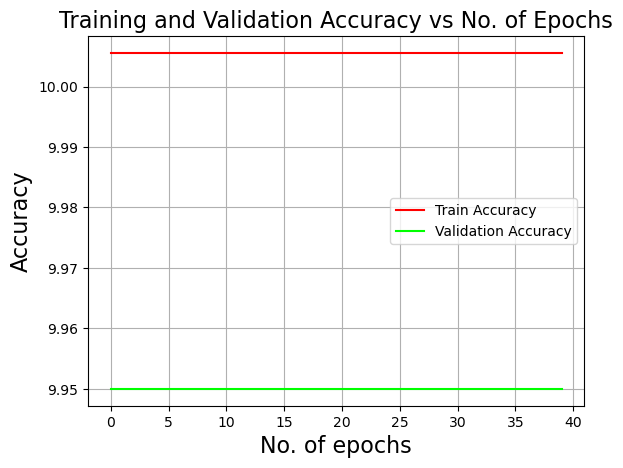

wandb: Agent Starting Run: 7j33m2ya with config:
wandb: 	activation: tanh_function
wandb: 	batch_size: 128
wandb: 	beta: 0.5
wandb: 	beta1: 0.9
wandb: 	beta2: 0.99
wandb: 	epochs: 20
wandb: 	lambd: 0.0005
wandb: 	learning_rate: 0.01
wandb: 	loss: cross_entropy_function
wandb: 	momentum: 0.5
wandb: 	neurons: 32
wandb: 	num_hidden_layers: 4
wandb: 	optimizer: nestorov_accelarated_gradient_descent
wandb: 	weight_init: xavier_initialization


lr_0.01_acti_tanh_function_w_inxavier_initialization_opt_nestorov_accelarated_gradient_descent_epoch_20_num_hid_4_loss_cross_entropy_function_batchsize_128_neur_32_lam_0.0005_momentum_0.5_beta_0.5_beta1_0.9_beta2_0.99
neuron configuration: [784, 32, 32, 32, 32, 10]


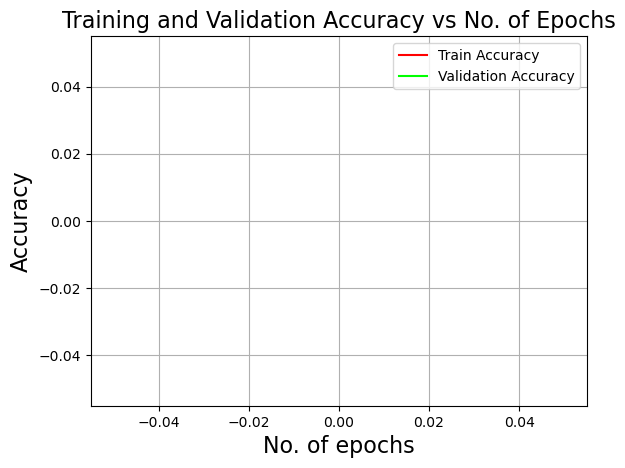

wandb: Agent Starting Run: 924kko76 with config:
wandb: 	activation: tanh_function
wandb: 	batch_size: 16
wandb: 	beta: 0.5
wandb: 	beta1: 0.9
wandb: 	beta2: 0.99
wandb: 	epochs: 20
wandb: 	lambd: 0
wandb: 	learning_rate: 0.1
wandb: 	loss: cross_entropy_function
wandb: 	momentum: 0.9
wandb: 	neurons: 128
wandb: 	num_hidden_layers: 5
wandb: 	optimizer: stochastic_gradient_descent
wandb: 	weight_init: random_initialization


lr_0.1_acti_tanh_function_w_inrandom_initialization_opt_stochastic_gradient_descent_epoch_20_num_hid_5_loss_cross_entropy_function_batchsize_16_neur_128_lam_0_momentum_0.9_beta_0.5_beta1_0.9_beta2_0.99
neuron configuration: [784, 128, 128, 128, 128, 128, 10]
 
 epoch:  19  Train error:      2.44  Train accuracy:    20.06 Val error:     2.44 Val accuracy:    19.28


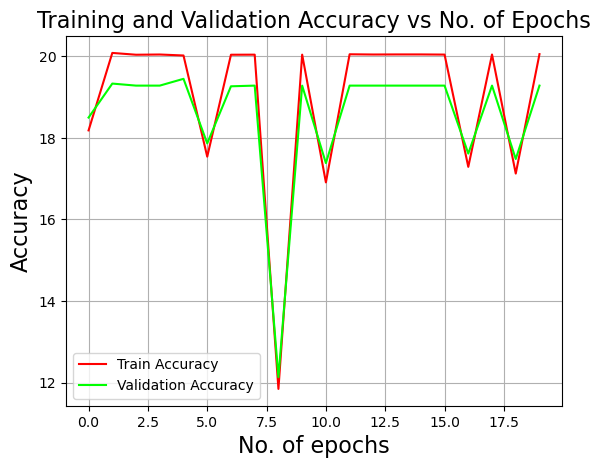

wandb: Agent Starting Run: 4ordmi19 with config:
wandb: 	activation: tanh_function
wandb: 	batch_size: 16
wandb: 	beta: 0.5
wandb: 	beta1: 0.9
wandb: 	beta2: 0.99
wandb: 	epochs: 40
wandb: 	lambd: 0.0005
wandb: 	learning_rate: 0.001
wandb: 	loss: mean_squared_error_function
wandb: 	momentum: 0.8
wandb: 	neurons: 64
wandb: 	num_hidden_layers: 5
wandb: 	optimizer: nadam
wandb: 	weight_init: random_initialization


lr_0.001_acti_tanh_function_w_inrandom_initialization_opt_nadam_epoch_40_num_hid_5_loss_mean_squared_error_function_batchsize_16_neur_64_lam_0.0005_momentum_0.8_beta_0.5_beta1_0.9_beta2_0.99
neuron configuration: [784, 64, 64, 64, 64, 64, 10]
 
 epoch:  39  Train error:      0.68  Train accuracy:    76.35 Val error:     0.68 Val accuracy:    76.58


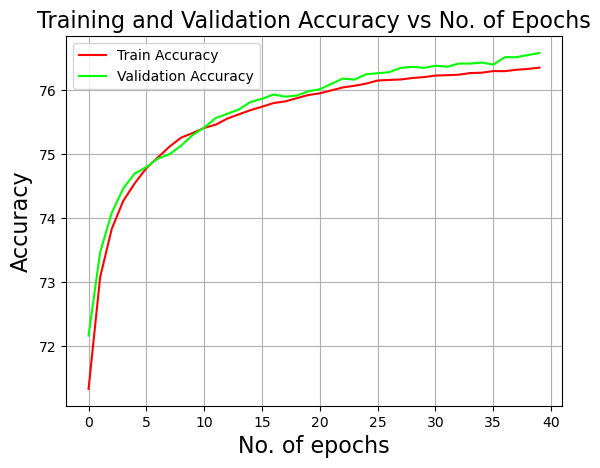

wandb: Agent Starting Run: h1sgugiz with config:
wandb: 	activation: tanh_function
wandb: 	batch_size: 64
wandb: 	beta: 0.9
wandb: 	beta1: 0.9
wandb: 	beta2: 0.99
wandb: 	epochs: 40
wandb: 	lambd: 0.5
wandb: 	learning_rate: 0.001
wandb: 	loss: cross_entropy_function
wandb: 	momentum: 0.5
wandb: 	neurons: 128
wandb: 	num_hidden_layers: 3
wandb: 	optimizer: nestorov_accelarated_gradient_descent
wandb: 	weight_init: xavier_initialization


lr_0.001_acti_tanh_function_w_inxavier_initialization_opt_nestorov_accelarated_gradient_descent_epoch_40_num_hid_3_loss_cross_entropy_function_batchsize_64_neur_128_lam_0.5_momentum_0.5_beta_0.9_beta1_0.9_beta2_0.99
neuron configuration: [784, 128, 128, 128, 10]


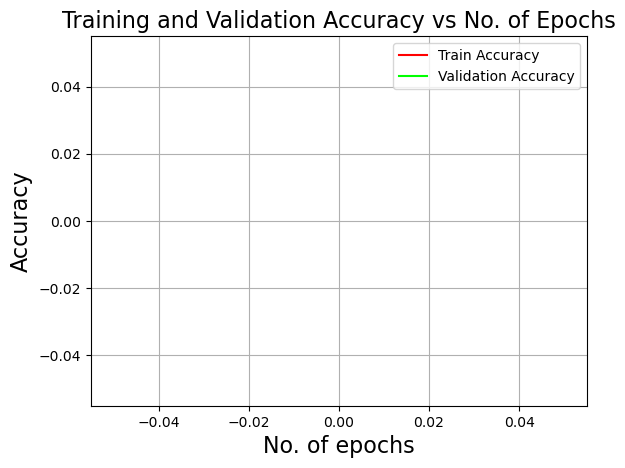

wandb: Agent Starting Run: f8d93uck with config:
wandb: 	activation: sigmoid_function
wandb: 	batch_size: 4
wandb: 	beta: 0.9
wandb: 	beta1: 0.9
wandb: 	beta2: 0.99
wandb: 	epochs: 10
wandb: 	lambd: 0.5
wandb: 	learning_rate: 0.0001
wandb: 	loss: cross_entropy_function
wandb: 	momentum: 0.8
wandb: 	neurons: 32
wandb: 	num_hidden_layers: 3
wandb: 	optimizer: adam
wandb: 	weight_init: xavier_initialization


lr_0.0001_acti_sigmoid_function_w_inxavier_initialization_opt_adam_epoch_10_num_hid_3_loss_cross_entropy_function_batchsize_4_neur_32_lam_0.5_momentum_0.8_beta_0.9_beta1_0.9_beta2_0.99
neuron configuration: [784, 32, 32, 32, 10]
 
 epoch:   9  Train error:      2.30  Train accuracy:     9.99 Val error:     2.30 Val accuracy:    10.13


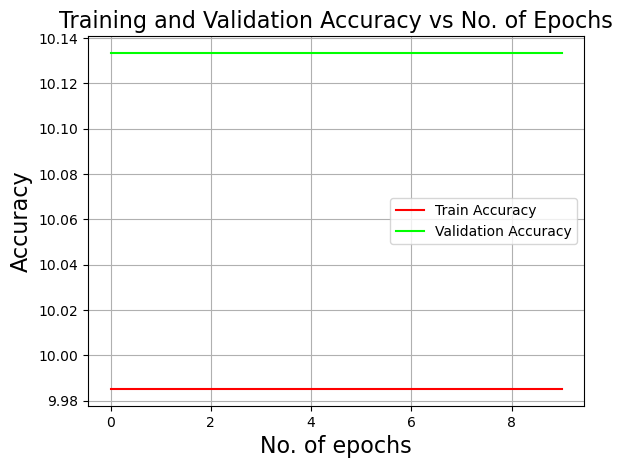

wandb: Agent Starting Run: wewwofzl with config:
wandb: 	activation: sigmoid_function
wandb: 	batch_size: 4
wandb: 	beta: 0.5
wandb: 	beta1: 0.9
wandb: 	beta2: 0.99
wandb: 	epochs: 40
wandb: 	lambd: 0.5
wandb: 	learning_rate: 0.0001
wandb: 	loss: mean_squared_error_function
wandb: 	momentum: 0.9
wandb: 	neurons: 64
wandb: 	num_hidden_layers: 5
wandb: 	optimizer: adam
wandb: 	weight_init: random_initialization


lr_0.0001_acti_sigmoid_function_w_inrandom_initialization_opt_adam_epoch_40_num_hid_5_loss_mean_squared_error_function_batchsize_4_neur_64_lam_0.5_momentum_0.9_beta_0.5_beta1_0.9_beta2_0.99
neuron configuration: [784, 64, 64, 64, 64, 64, 10]
 
 epoch:  39  Train error:      2.30  Train accuracy:     9.99 Val error:     2.30 Val accuracy:    10.13


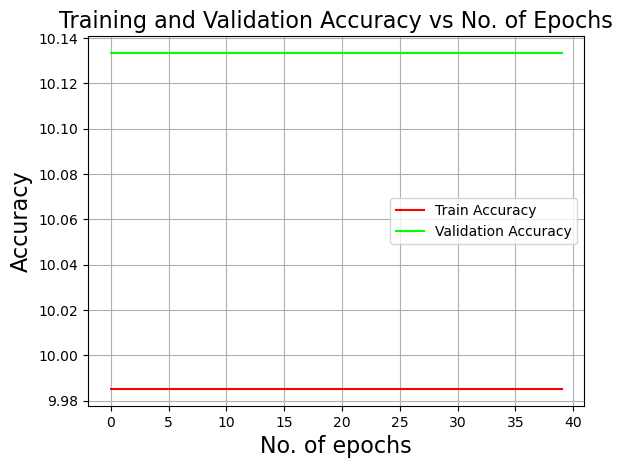

wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: pysruxcm with config:
wandb: 	activation: tanh_function
wandb: 	batch_size: 32
wandb: 	beta: 0.5
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	epochs: 20
wandb: 	lambd: 0
wandb: 	learning_rate: 0.0001
wandb: 	loss: mean_squared_error_function
wandb: 	momentum: 0.5
wandb: 	neurons: 64
wandb: 	num_hidden_layers: 3
wandb: 	optimizer: vanilla_gradient_descent
wandb: 	weight_init: xavier_initialization


lr_0.0001_acti_tanh_function_w_inxavier_initialization_opt_vanilla_gradient_descent_epoch_20_num_hid_3_loss_mean_squared_error_function_batchsize_32_neur_64_lam_0_momentum_0.5_beta_0.5_beta1_0.9_beta2_0.999
neuron configuration: [784, 64, 64, 64, 10]
 
 epoch:  19  Train error:      5.23  Train accuracy:    12.25 Val error:     5.23 Val accuracy:    12.22


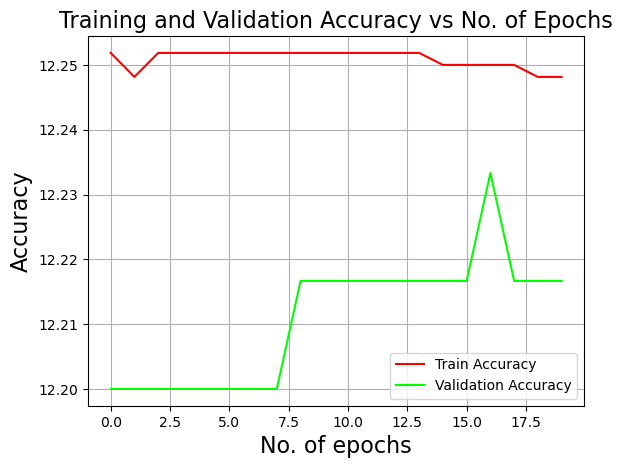

wandb: Agent Starting Run: e63kqp20 with config:
wandb: 	activation: tanh_function
wandb: 	batch_size: 64
wandb: 	beta: 0.5
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	epochs: 20
wandb: 	lambd: 0.5
wandb: 	learning_rate: 0.0001
wandb: 	loss: cross_entropy_function
wandb: 	momentum: 0.9
wandb: 	neurons: 128
wandb: 	num_hidden_layers: 3
wandb: 	optimizer: vanilla_gradient_descent
wandb: 	weight_init: random_initialization


lr_0.0001_acti_tanh_function_w_inrandom_initialization_opt_vanilla_gradient_descent_epoch_20_num_hid_3_loss_cross_entropy_function_batchsize_64_neur_128_lam_0.5_momentum_0.9_beta_0.5_beta1_0.9_beta2_0.999
neuron configuration: [784, 128, 128, 128, 10]
 
 epoch:  19  Train error:      8.95  Train accuracy:    10.89 Val error:    10.72 Val accuracy:    10.65


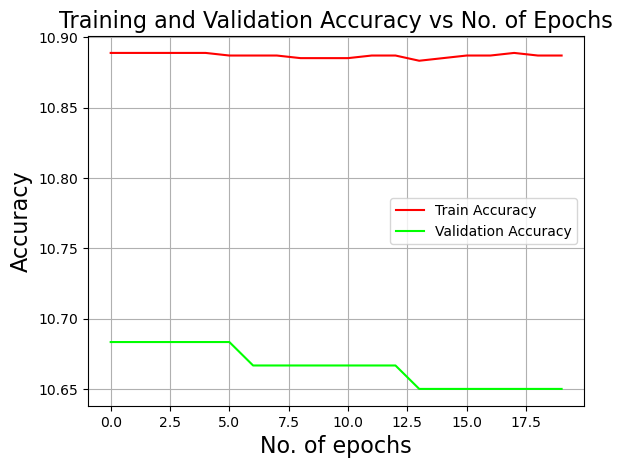

wandb: Agent Starting Run: f7a7vp4t with config:
wandb: 	activation: relu_function
wandb: 	batch_size: 256
wandb: 	beta: 0.9
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	epochs: 20
wandb: 	lambd: 0.0005
wandb: 	learning_rate: 0.1
wandb: 	loss: mean_squared_error_function
wandb: 	momentum: 0.8
wandb: 	neurons: 32
wandb: 	num_hidden_layers: 4
wandb: 	optimizer: momentum_gradient_descent
wandb: 	weight_init: random_initialization


lr_0.1_acti_relu_function_w_inrandom_initialization_opt_momentum_gradient_descent_epoch_20_num_hid_4_loss_mean_squared_error_function_batchsize_256_neur_32_lam_0.0005_momentum_0.8_beta_0.9_beta1_0.9_beta2_0.999
neuron configuration: [784, 32, 32, 32, 32, 10]


Run f7a7vp4t errored: ValueError('The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()')
wandb: ERROR Run f7a7vp4t errored: ValueError('The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()')
wandb: Agent Starting Run: n0k55z5d with config:
wandb: 	activation: sigmoid_function
wandb: 	batch_size: 32
wandb: 	beta: 0.9
wandb: 	beta1: 0.9
wandb: 	beta2: 0.99
wandb: 	epochs: 10
wandb: 	lambd: 0.0005
wandb: 	learning_rate: 0.0001
wandb: 	loss: mean_squared_error_function
wandb: 	momentum: 0.9
wandb: 	neurons: 32
wandb: 	num_hidden_layers: 4
wandb: 	optimizer: momentum_gradient_descent
wandb: 	weight_init: xavier_initialization


lr_0.0001_acti_sigmoid_function_w_inxavier_initialization_opt_momentum_gradient_descent_epoch_10_num_hid_4_loss_mean_squared_error_function_batchsize_32_neur_32_lam_0.0005_momentum_0.9_beta_0.9_beta1_0.9_beta2_0.99
neuron configuration: [784, 32, 32, 32, 32, 10]
 
 epoch:   9  Train error:      2.26  Train accuracy:    17.20 Val error:     2.26 Val accuracy:    17.75


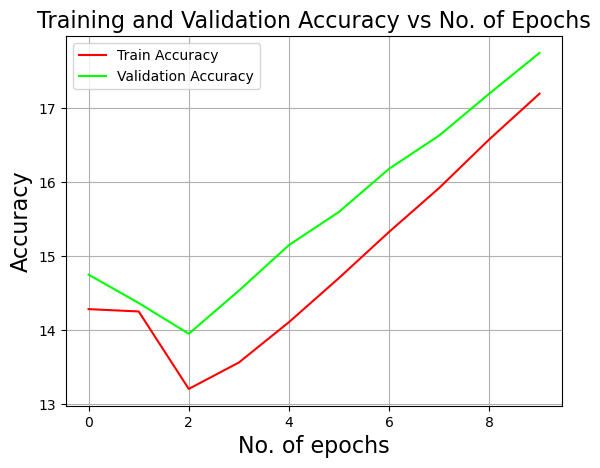

wandb: Agent Starting Run: yb67bngm with config:
wandb: 	activation: identity_function
wandb: 	batch_size: 128
wandb: 	beta: 0.5
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	epochs: 10
wandb: 	lambd: 0.5
wandb: 	learning_rate: 0.01
wandb: 	loss: mean_squared_error_function
wandb: 	momentum: 0.9
wandb: 	neurons: 64
wandb: 	num_hidden_layers: 4
wandb: 	optimizer: vanilla_gradient_descent
wandb: 	weight_init: random_initialization


lr_0.01_acti_identity_function_w_inrandom_initialization_opt_vanilla_gradient_descent_epoch_10_num_hid_4_loss_mean_squared_error_function_batchsize_128_neur_64_lam_0.5_momentum_0.9_beta_0.5_beta1_0.9_beta2_0.999
neuron configuration: [784, 64, 64, 64, 64, 10]


C:\Users\anant\AppData\Local\Temp\ipykernel_720\4208013813.py:6: RuntimeWarning: divide by zero encountered in log
  cost=-(1/m)*np.sum(y*np.log(ycap))
C:\Users\anant\AppData\Local\Temp\ipykernel_720\4208013813.py:6: RuntimeWarning: invalid value encountered in multiply
  cost=-(1/m)*np.sum(y*np.log(ycap))


 
 epoch:   9  Train error:       nan  Train accuracy:    10.01 Val error:      nan Val accuracy:     9.95


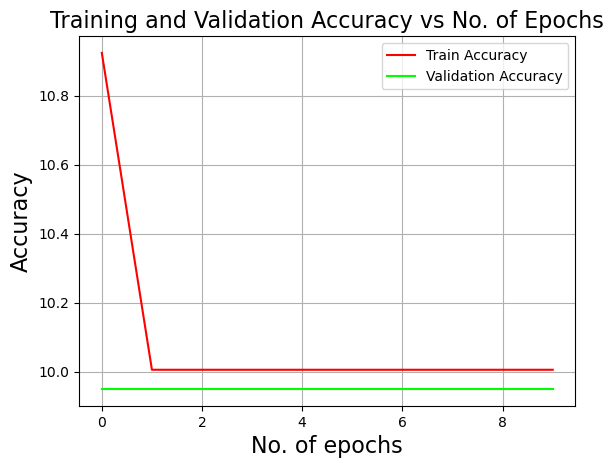

wandb: Agent Starting Run: 5ji3pz5f with config:
wandb: 	activation: tanh_function
wandb: 	batch_size: 256
wandb: 	beta: 0.5
wandb: 	beta1: 0.9
wandb: 	beta2: 0.99
wandb: 	epochs: 40
wandb: 	lambd: 0.5
wandb: 	learning_rate: 0.01
wandb: 	loss: mean_squared_error_function
wandb: 	momentum: 0.8
wandb: 	neurons: 32
wandb: 	num_hidden_layers: 4
wandb: 	optimizer: vanilla_gradient_descent
wandb: 	weight_init: random_initialization


lr_0.01_acti_tanh_function_w_inrandom_initialization_opt_vanilla_gradient_descent_epoch_40_num_hid_4_loss_mean_squared_error_function_batchsize_256_neur_32_lam_0.5_momentum_0.8_beta_0.5_beta1_0.9_beta2_0.99
neuron configuration: [784, 32, 32, 32, 32, 10]
 
 epoch:  39  Train error:      4.64  Train accuracy:    11.12 Val error:     4.97 Val accuracy:    10.83


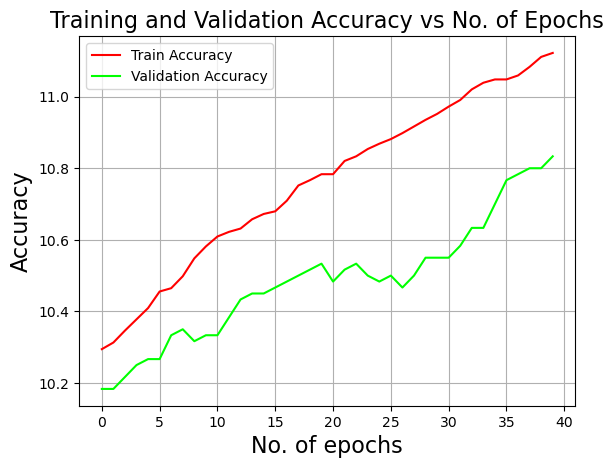

wandb: Agent Starting Run: q1ijs35j with config:
wandb: 	activation: relu_function
wandb: 	batch_size: 64
wandb: 	beta: 0.5
wandb: 	beta1: 0.9
wandb: 	beta2: 0.99
wandb: 	epochs: 40
wandb: 	lambd: 0.5
wandb: 	learning_rate: 0.01
wandb: 	loss: mean_squared_error_function
wandb: 	momentum: 0.5
wandb: 	neurons: 64
wandb: 	num_hidden_layers: 5
wandb: 	optimizer: vanilla_gradient_descent
wandb: 	weight_init: xavier_initialization


lr_0.01_acti_relu_function_w_inxavier_initialization_opt_vanilla_gradient_descent_epoch_40_num_hid_5_loss_mean_squared_error_function_batchsize_64_neur_64_lam_0.5_momentum_0.5_beta_0.5_beta1_0.9_beta2_0.99
neuron configuration: [784, 64, 64, 64, 64, 64, 10]


Run q1ijs35j errored: ValueError('The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()')
wandb: ERROR Run q1ijs35j errored: ValueError('The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()')
wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: cj9u2jkn with config:
wandb: 	activation: relu_function
wandb: 	batch_size: 32
wandb: 	beta: 0.5
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	epochs: 20
wandb: 	lambd: 0.0005
wandb: 	learning_rate: 0.1
wandb: 	loss: mean_squared_error_function
wandb: 	momentum: 0.5
wandb: 	neurons: 128
wandb: 	num_hidden_layers: 5
wandb: 	optimizer: rms_prop
wandb: 	weight_init: xavier_initialization


lr_0.1_acti_relu_function_w_inxavier_initialization_opt_rms_prop_epoch_20_num_hid_5_loss_mean_squared_error_function_batchsize_32_neur_128_lam_0.0005_momentum_0.5_beta_0.5_beta1_0.9_beta2_0.999
neuron configuration: [784, 128, 128, 128, 128, 128, 10]


Run cj9u2jkn errored: ValueError('The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()')
wandb: ERROR Run cj9u2jkn errored: ValueError('The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()')
wandb: Agent Starting Run: x4j00tbc with config:
wandb: 	activation: tanh_function
wandb: 	batch_size: 4
wandb: 	beta: 0.5
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	epochs: 20
wandb: 	lambd: 0.0005
wandb: 	learning_rate: 0.0001
wandb: 	loss: cross_entropy_function
wandb: 	momentum: 0.9
wandb: 	neurons: 64
wandb: 	num_hidden_layers: 3
wandb: 	optimizer: vanilla_gradient_descent
wandb: 	weight_init: xavier_initialization


lr_0.0001_acti_tanh_function_w_inxavier_initialization_opt_vanilla_gradient_descent_epoch_20_num_hid_3_loss_cross_entropy_function_batchsize_4_neur_64_lam_0.0005_momentum_0.9_beta_0.5_beta1_0.9_beta2_0.999
neuron configuration: [784, 64, 64, 64, 10]
 
 epoch:  19  Train error:      6.07  Train accuracy:    13.20 Val error:     6.07 Val accuracy:    12.72


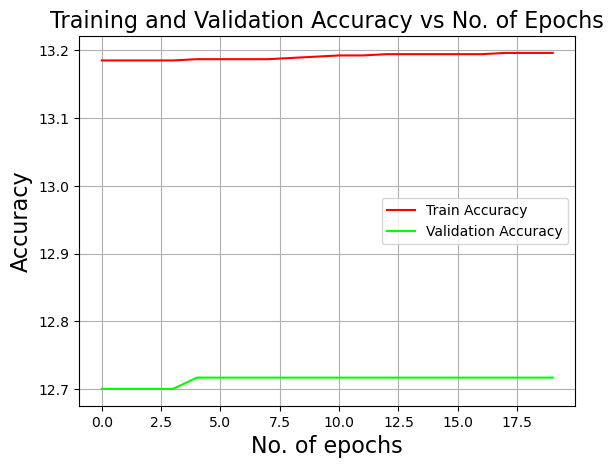

wandb: Agent Starting Run: 4aiqbri0 with config:
wandb: 	activation: sigmoid_function
wandb: 	batch_size: 32
wandb: 	beta: 0.5
wandb: 	beta1: 0.9
wandb: 	beta2: 0.99
wandb: 	epochs: 5
wandb: 	lambd: 0.5
wandb: 	learning_rate: 0.01
wandb: 	loss: cross_entropy_function
wandb: 	momentum: 0.9
wandb: 	neurons: 64
wandb: 	num_hidden_layers: 3
wandb: 	optimizer: nestorov_accelarated_gradient_descent
wandb: 	weight_init: xavier_initialization


lr_0.01_acti_sigmoid_function_w_inxavier_initialization_opt_nestorov_accelarated_gradient_descent_epoch_5_num_hid_3_loss_cross_entropy_function_batchsize_32_neur_64_lam_0.5_momentum_0.9_beta_0.5_beta1_0.9_beta2_0.99
neuron configuration: [784, 64, 64, 64, 10]


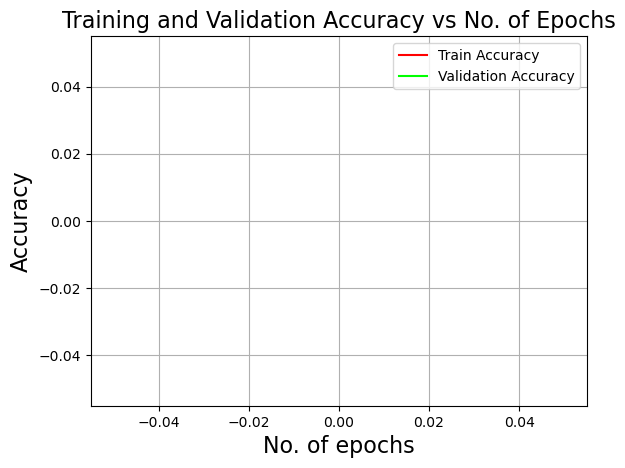

wandb: Agent Starting Run: ryuxnb6r with config:
wandb: 	activation: tanh_function
wandb: 	batch_size: 256
wandb: 	beta: 0.9
wandb: 	beta1: 0.9
wandb: 	beta2: 0.99
wandb: 	epochs: 20
wandb: 	lambd: 0.0005
wandb: 	learning_rate: 0.1
wandb: 	loss: mean_squared_error_function
wandb: 	momentum: 0.8
wandb: 	neurons: 64
wandb: 	num_hidden_layers: 5
wandb: 	optimizer: stochastic_gradient_descent
wandb: 	weight_init: random_initialization


lr_0.1_acti_tanh_function_w_inrandom_initialization_opt_stochastic_gradient_descent_epoch_20_num_hid_5_loss_mean_squared_error_function_batchsize_256_neur_64_lam_0.0005_momentum_0.8_beta_0.9_beta1_0.9_beta2_0.99
neuron configuration: [784, 64, 64, 64, 64, 64, 10]
 
 epoch:  19  Train error:  16011679767011629532708864.00  Train accuracy:    21.10 Val error: 144105117903104670089347072.00 Val accuracy:    20.52


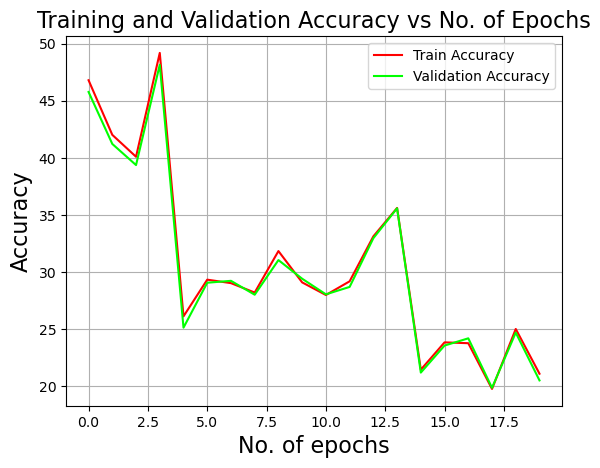

wandb: Agent Starting Run: o1doy42q with config:
wandb: 	activation: relu_function
wandb: 	batch_size: 128
wandb: 	beta: 0.5
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	epochs: 10
wandb: 	lambd: 0.0005
wandb: 	learning_rate: 0.0001
wandb: 	loss: cross_entropy_function
wandb: 	momentum: 0.9
wandb: 	neurons: 64
wandb: 	num_hidden_layers: 4
wandb: 	optimizer: adam
wandb: 	weight_init: xavier_initialization


lr_0.0001_acti_relu_function_w_inxavier_initialization_opt_adam_epoch_10_num_hid_4_loss_cross_entropy_function_batchsize_128_neur_64_lam_0.0005_momentum_0.9_beta_0.5_beta1_0.9_beta2_0.999
neuron configuration: [784, 64, 64, 64, 64, 10]


Run o1doy42q errored: ValueError('The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()')
wandb: ERROR Run o1doy42q errored: ValueError('The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()')
wandb: Agent Starting Run: h32ceyg8 with config:
wandb: 	activation: sigmoid_function
wandb: 	batch_size: 256
wandb: 	beta: 0.9
wandb: 	beta1: 0.9
wandb: 	beta2: 0.99
wandb: 	epochs: 5
wandb: 	lambd: 0.5
wandb: 	learning_rate: 0.0001
wandb: 	loss: cross_entropy_function
wandb: 	momentum: 0.9
wandb: 	neurons: 128
wandb: 	num_hidden_layers: 3
wandb: 	optimizer: stochastic_gradient_descent
wandb: 	weight_init: xavier_initialization


lr_0.0001_acti_sigmoid_function_w_inxavier_initialization_opt_stochastic_gradient_descent_epoch_5_num_hid_3_loss_cross_entropy_function_batchsize_256_neur_128_lam_0.5_momentum_0.9_beta_0.9_beta1_0.9_beta2_0.99
neuron configuration: [784, 128, 128, 128, 10]
 
 epoch:   4  Train error:      2.30  Train accuracy:     9.96 Val error:     2.30 Val accuracy:    10.32


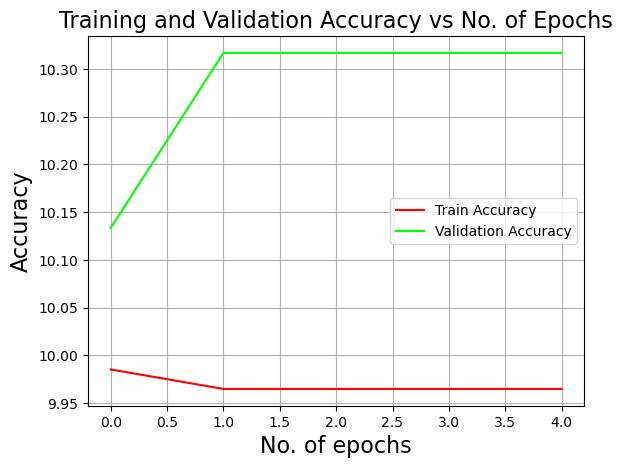

wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 6hzeytjs with config:
wandb: 	activation: sigmoid_function
wandb: 	batch_size: 128
wandb: 	beta: 0.5
wandb: 	beta1: 0.9
wandb: 	beta2: 0.99
wandb: 	epochs: 10
wandb: 	lambd: 0
wandb: 	learning_rate: 0.001
wandb: 	loss: cross_entropy_function
wandb: 	momentum: 0.9
wandb: 	neurons: 128
wandb: 	num_hidden_layers: 5
wandb: 	optimizer: stochastic_gradient_descent
wandb: 	weight_init: random_initialization


lr_0.001_acti_sigmoid_function_w_inrandom_initialization_opt_stochastic_gradient_descent_epoch_10_num_hid_5_loss_cross_entropy_function_batchsize_128_neur_128_lam_0_momentum_0.9_beta_0.5_beta1_0.9_beta2_0.99
neuron configuration: [784, 128, 128, 128, 128, 128, 10]


C:\Users\anant\AppData\Local\Temp\ipykernel_720\3582243818.py:4: RuntimeWarning: overflow encountered in exp
  h=1/(1+np.exp(-z.astype("float")))


 
 epoch:   9  Train error:      0.94  Train accuracy:    62.53 Val error:     0.94 Val accuracy:    61.85


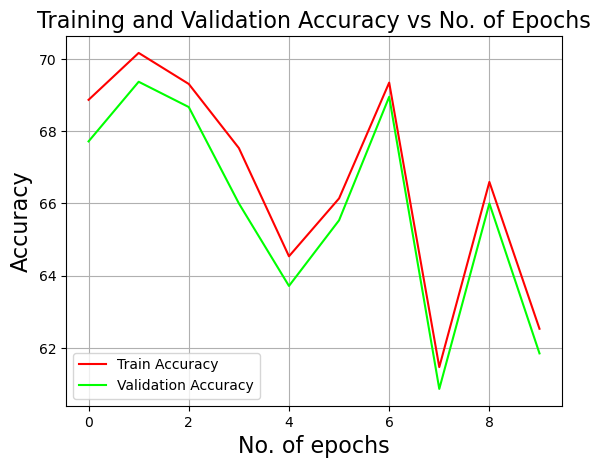

wandb: Agent Starting Run: 8f4wow4l with config:
wandb: 	activation: sigmoid_function
wandb: 	batch_size: 4
wandb: 	beta: 0.5
wandb: 	beta1: 0.9
wandb: 	beta2: 0.99
wandb: 	epochs: 20
wandb: 	lambd: 0
wandb: 	learning_rate: 0.0001
wandb: 	loss: cross_entropy_function
wandb: 	momentum: 0.9
wandb: 	neurons: 128
wandb: 	num_hidden_layers: 3
wandb: 	optimizer: nadam
wandb: 	weight_init: xavier_initialization


lr_0.0001_acti_sigmoid_function_w_inxavier_initialization_opt_nadam_epoch_20_num_hid_3_loss_cross_entropy_function_batchsize_4_neur_128_lam_0_momentum_0.9_beta_0.5_beta1_0.9_beta2_0.99
neuron configuration: [784, 128, 128, 128, 10]
 
 epoch:  19  Train error:      0.92  Train accuracy:    64.43 Val error:     0.92 Val accuracy:    63.98


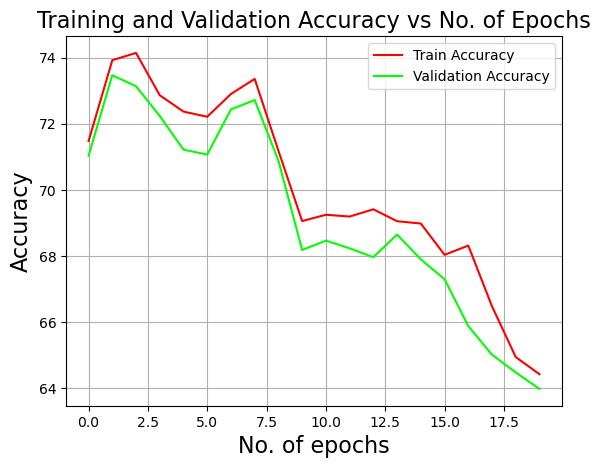

wandb: Agent Starting Run: rhd7s11k with config:
wandb: 	activation: tanh_function
wandb: 	batch_size: 32
wandb: 	beta: 0.9
wandb: 	beta1: 0.9
wandb: 	beta2: 0.99
wandb: 	epochs: 10
wandb: 	lambd: 0.0005
wandb: 	learning_rate: 0.01
wandb: 	loss: cross_entropy_function
wandb: 	momentum: 0.5
wandb: 	neurons: 128
wandb: 	num_hidden_layers: 3
wandb: 	optimizer: adam
wandb: 	weight_init: xavier_initialization


lr_0.01_acti_tanh_function_w_inxavier_initialization_opt_adam_epoch_10_num_hid_3_loss_cross_entropy_function_batchsize_32_neur_128_lam_0.0005_momentum_0.5_beta_0.9_beta1_0.9_beta2_0.99
neuron configuration: [784, 128, 128, 128, 10]
 
 epoch:   9  Train error:      0.63  Train accuracy:    75.99 Val error:     0.64 Val accuracy:    75.53


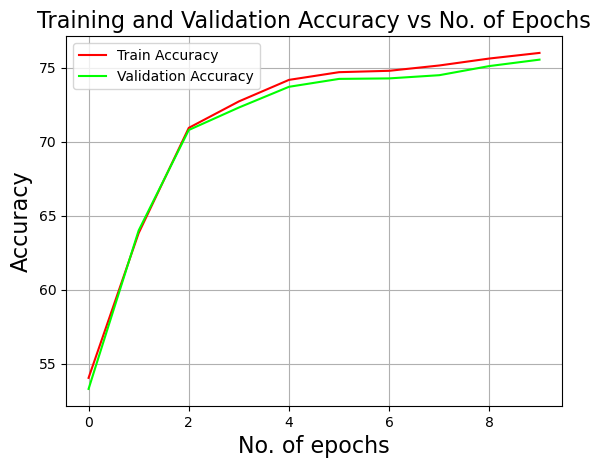

wandb: Agent Starting Run: b3jjlp32 with config:
wandb: 	activation: sigmoid_function
wandb: 	batch_size: 128
wandb: 	beta: 0.9
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	epochs: 5
wandb: 	lambd: 0.5
wandb: 	learning_rate: 0.001
wandb: 	loss: cross_entropy_function
wandb: 	momentum: 0.9
wandb: 	neurons: 32
wandb: 	num_hidden_layers: 4
wandb: 	optimizer: vanilla_gradient_descent
wandb: 	weight_init: xavier_initialization


lr_0.001_acti_sigmoid_function_w_inxavier_initialization_opt_vanilla_gradient_descent_epoch_5_num_hid_4_loss_cross_entropy_function_batchsize_128_neur_32_lam_0.5_momentum_0.9_beta_0.9_beta1_0.9_beta2_0.999
neuron configuration: [784, 32, 32, 32, 32, 10]
 
 epoch:   4  Train error:      4.37  Train accuracy:     9.98 Val error:     6.30 Val accuracy:    10.18


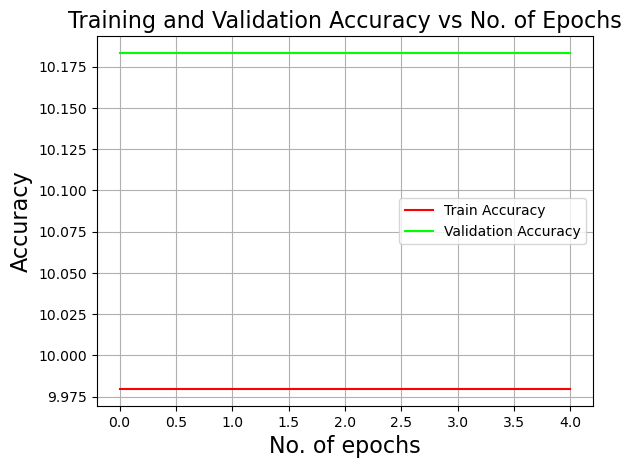

wandb: Agent Starting Run: qbe6bdb4 with config:
wandb: 	activation: identity_function
wandb: 	batch_size: 32
wandb: 	beta: 0.5
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	epochs: 5
wandb: 	lambd: 0.0005
wandb: 	learning_rate: 0.01
wandb: 	loss: mean_squared_error_function
wandb: 	momentum: 0.9
wandb: 	neurons: 128
wandb: 	num_hidden_layers: 5
wandb: 	optimizer: stochastic_gradient_descent
wandb: 	weight_init: random_initialization


lr_0.01_acti_identity_function_w_inrandom_initialization_opt_stochastic_gradient_descent_epoch_5_num_hid_5_loss_mean_squared_error_function_batchsize_32_neur_128_lam_0.0005_momentum_0.9_beta_0.5_beta1_0.9_beta2_0.999
neuron configuration: [784, 128, 128, 128, 128, 128, 10]
 
 epoch:   4  Train error:       nan  Train accuracy:    10.01 Val error:      nan Val accuracy:     9.95


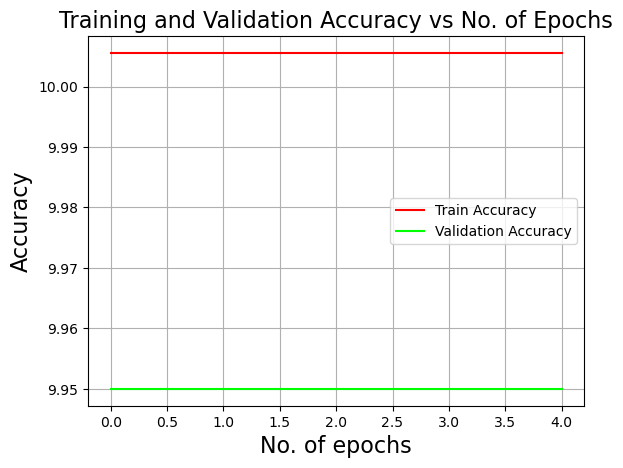

wandb: Agent Starting Run: b8uw29je with config:
wandb: 	activation: sigmoid_function
wandb: 	batch_size: 16
wandb: 	beta: 0.9
wandb: 	beta1: 0.9
wandb: 	beta2: 0.99
wandb: 	epochs: 10
wandb: 	lambd: 0
wandb: 	learning_rate: 0.01
wandb: 	loss: cross_entropy_function
wandb: 	momentum: 0.5
wandb: 	neurons: 64
wandb: 	num_hidden_layers: 5
wandb: 	optimizer: nestorov_accelarated_gradient_descent
wandb: 	weight_init: xavier_initialization


lr_0.01_acti_sigmoid_function_w_inxavier_initialization_opt_nestorov_accelarated_gradient_descent_epoch_10_num_hid_5_loss_cross_entropy_function_batchsize_16_neur_64_lam_0_momentum_0.5_beta_0.9_beta1_0.9_beta2_0.99
neuron configuration: [784, 64, 64, 64, 64, 64, 10]


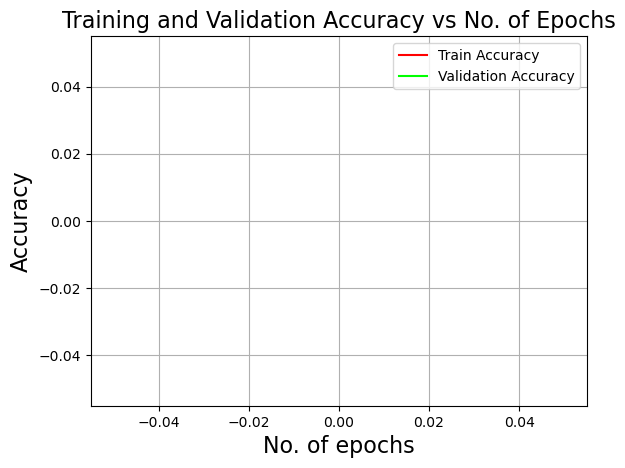

wandb: Agent Starting Run: da0fjxr6 with config:
wandb: 	activation: tanh_function
wandb: 	batch_size: 32
wandb: 	beta: 0.5
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	epochs: 20
wandb: 	lambd: 0
wandb: 	learning_rate: 0.01
wandb: 	loss: cross_entropy_function
wandb: 	momentum: 0.8
wandb: 	neurons: 32
wandb: 	num_hidden_layers: 4
wandb: 	optimizer: nestorov_accelarated_gradient_descent
wandb: 	weight_init: random_initialization


lr_0.01_acti_tanh_function_w_inrandom_initialization_opt_nestorov_accelarated_gradient_descent_epoch_20_num_hid_4_loss_cross_entropy_function_batchsize_32_neur_32_lam_0_momentum_0.8_beta_0.5_beta1_0.9_beta2_0.999
neuron configuration: [784, 32, 32, 32, 32, 10]


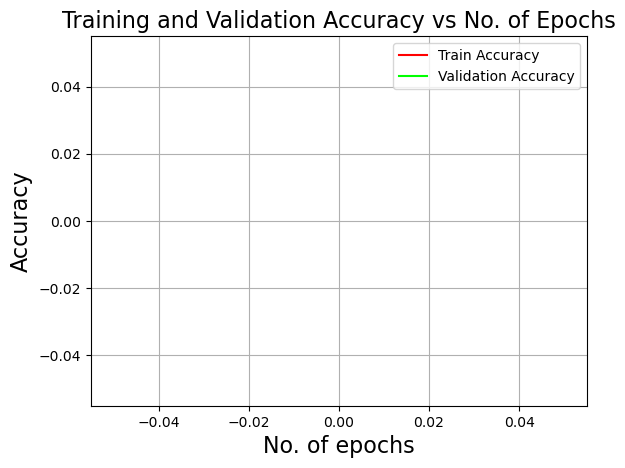

wandb: Agent Starting Run: deb2xtjj with config:
wandb: 	activation: identity_function
wandb: 	batch_size: 256
wandb: 	beta: 0.5
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	epochs: 40
wandb: 	lambd: 0.0005
wandb: 	learning_rate: 0.0001
wandb: 	loss: mean_squared_error_function
wandb: 	momentum: 0.5
wandb: 	neurons: 128
wandb: 	num_hidden_layers: 5
wandb: 	optimizer: nadam
wandb: 	weight_init: random_initialization


lr_0.0001_acti_identity_function_w_inrandom_initialization_opt_nadam_epoch_40_num_hid_5_loss_mean_squared_error_function_batchsize_256_neur_128_lam_0.0005_momentum_0.5_beta_0.5_beta1_0.9_beta2_0.999
neuron configuration: [784, 128, 128, 128, 128, 128, 10]
 
 epoch:  39  Train error:       nan  Train accuracy:    10.01 Val error:      nan Val accuracy:     9.95


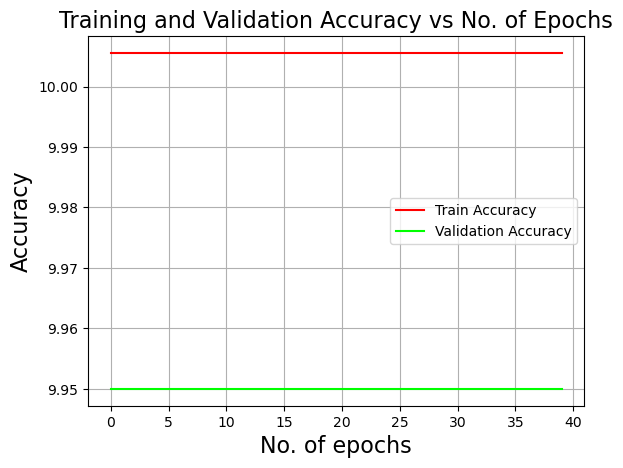

wandb: Agent Starting Run: cq8ixjan with config:
wandb: 	activation: identity_function
wandb: 	batch_size: 32
wandb: 	beta: 0.5
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	epochs: 5
wandb: 	lambd: 0.5
wandb: 	learning_rate: 0.01
wandb: 	loss: mean_squared_error_function
wandb: 	momentum: 0.9
wandb: 	neurons: 32
wandb: 	num_hidden_layers: 3
wandb: 	optimizer: adam
wandb: 	weight_init: xavier_initialization


lr_0.01_acti_identity_function_w_inxavier_initialization_opt_adam_epoch_5_num_hid_3_loss_mean_squared_error_function_batchsize_32_neur_32_lam_0.5_momentum_0.9_beta_0.5_beta1_0.9_beta2_0.999
neuron configuration: [784, 32, 32, 32, 10]
 
 epoch:   4  Train error:       nan  Train accuracy:    10.01 Val error:      nan Val accuracy:     9.95


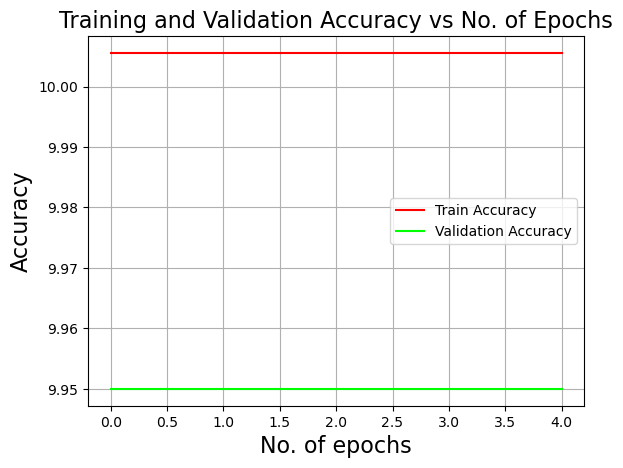

wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: d9ijucty with config:
wandb: 	activation: relu_function
wandb: 	batch_size: 64
wandb: 	beta: 0.5
wandb: 	beta1: 0.9
wandb: 	beta2: 0.99
wandb: 	epochs: 10
wandb: 	lambd: 0.0005
wandb: 	learning_rate: 0.0001
wandb: 	loss: cross_entropy_function
wandb: 	momentum: 0.9
wandb: 	neurons: 64
wandb: 	num_hidden_layers: 5
wandb: 	optimizer: nestorov_accelarated_gradient_descent
wandb: 	weight_init: xavier_initialization


lr_0.0001_acti_relu_function_w_inxavier_initialization_opt_nestorov_accelarated_gradient_descent_epoch_10_num_hid_5_loss_cross_entropy_function_batchsize_64_neur_64_lam_0.0005_momentum_0.9_beta_0.5_beta1_0.9_beta2_0.99
neuron configuration: [784, 64, 64, 64, 64, 64, 10]


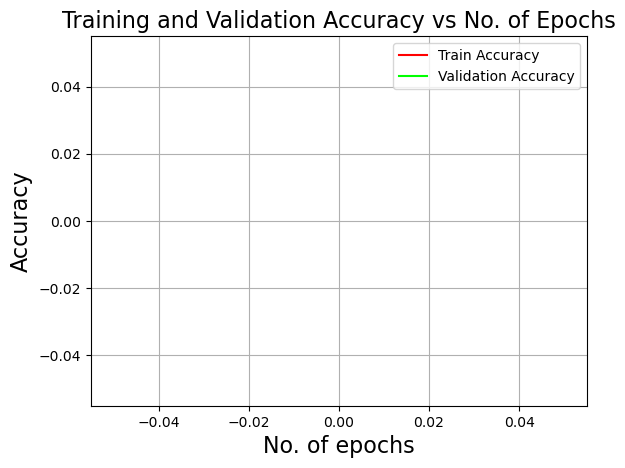

wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: qv1mntev with config:
wandb: 	activation: identity_function
wandb: 	batch_size: 4
wandb: 	beta: 0.5
wandb: 	beta1: 0.9
wandb: 	beta2: 0.99
wandb: 	epochs: 40
wandb: 	lambd: 0
wandb: 	learning_rate: 0.01
wandb: 	loss: mean_squared_error_function
wandb: 	momentum: 0.8
wandb: 	neurons: 32
wandb: 	num_hidden_layers: 3
wandb: 	optimizer: vanilla_gradient_descent
wandb: 	weight_init: xavier_initialization


lr_0.01_acti_identity_function_w_inxavier_initialization_opt_vanilla_gradient_descent_epoch_40_num_hid_3_loss_mean_squared_error_function_batchsize_4_neur_32_lam_0_momentum_0.8_beta_0.5_beta1_0.9_beta2_0.99
neuron configuration: [784, 32, 32, 32, 10]
 
 epoch:  39  Train error:       nan  Train accuracy:    10.01 Val error:      nan Val accuracy:     9.95


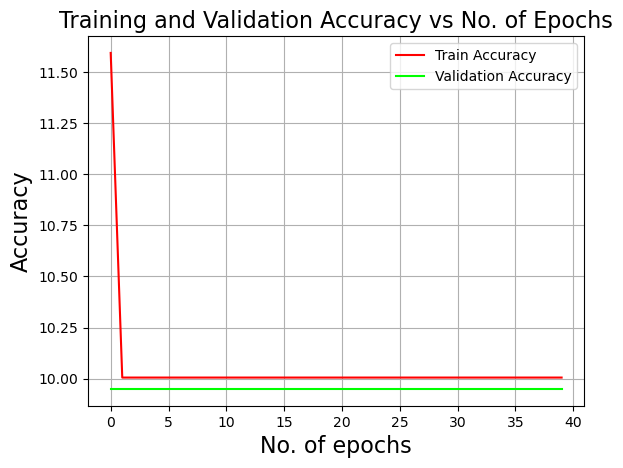

wandb: Agent Starting Run: e9vjfgcv with config:
wandb: 	activation: identity_function
wandb: 	batch_size: 16
wandb: 	beta: 0.5
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	epochs: 10
wandb: 	lambd: 0.5
wandb: 	learning_rate: 0.01
wandb: 	loss: cross_entropy_function
wandb: 	momentum: 0.5
wandb: 	neurons: 32
wandb: 	num_hidden_layers: 5
wandb: 	optimizer: nadam
wandb: 	weight_init: xavier_initialization


lr_0.01_acti_identity_function_w_inxavier_initialization_opt_nadam_epoch_10_num_hid_5_loss_cross_entropy_function_batchsize_16_neur_32_lam_0.5_momentum_0.5_beta_0.5_beta1_0.9_beta2_0.999
neuron configuration: [784, 32, 32, 32, 32, 32, 10]
 
 epoch:   9  Train error:       nan  Train accuracy:    10.01 Val error:      nan Val accuracy:     9.95


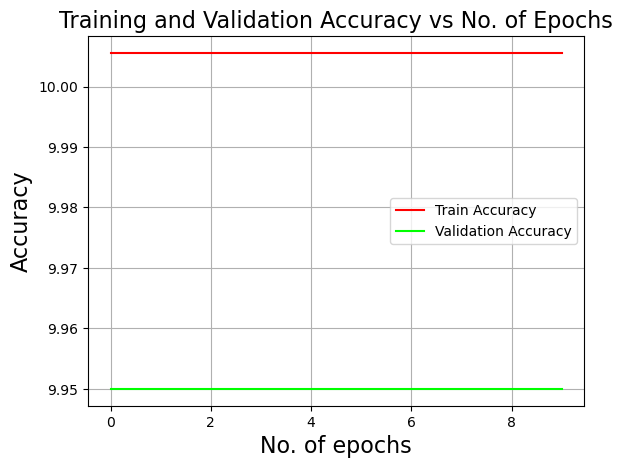

wandb: Agent Starting Run: ix0re10t with config:
wandb: 	activation: identity_function
wandb: 	batch_size: 256
wandb: 	beta: 0.9
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	epochs: 40
wandb: 	lambd: 0.0005
wandb: 	learning_rate: 0.1
wandb: 	loss: cross_entropy_function
wandb: 	momentum: 0.5
wandb: 	neurons: 128
wandb: 	num_hidden_layers: 5
wandb: 	optimizer: adam
wandb: 	weight_init: xavier_initialization


lr_0.1_acti_identity_function_w_inxavier_initialization_opt_adam_epoch_40_num_hid_5_loss_cross_entropy_function_batchsize_256_neur_128_lam_0.0005_momentum_0.5_beta_0.9_beta1_0.9_beta2_0.999
neuron configuration: [784, 128, 128, 128, 128, 128, 10]
 
 epoch:  39  Train error:       nan  Train accuracy:    10.01 Val error:      nan Val accuracy:     9.95


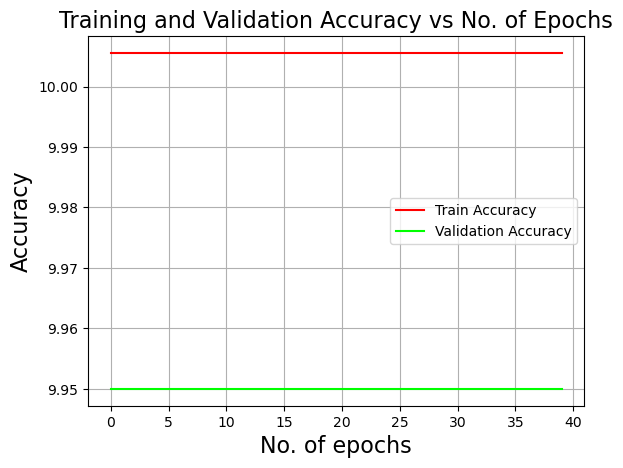

wandb: Agent Starting Run: c2472kma with config:
wandb: 	activation: sigmoid_function
wandb: 	batch_size: 256
wandb: 	beta: 0.9
wandb: 	beta1: 0.9
wandb: 	beta2: 0.99
wandb: 	epochs: 40
wandb: 	lambd: 0
wandb: 	learning_rate: 0.001
wandb: 	loss: cross_entropy_function
wandb: 	momentum: 0.9
wandb: 	neurons: 128
wandb: 	num_hidden_layers: 4
wandb: 	optimizer: momentum_gradient_descent
wandb: 	weight_init: xavier_initialization


lr_0.001_acti_sigmoid_function_w_inxavier_initialization_opt_momentum_gradient_descent_epoch_40_num_hid_4_loss_cross_entropy_function_batchsize_256_neur_128_lam_0_momentum_0.9_beta_0.9_beta1_0.9_beta2_0.99
neuron configuration: [784, 128, 128, 128, 128, 10]
 
 epoch:  39  Train error:      1.29  Train accuracy:    57.08 Val error:     1.30 Val accuracy:    56.53


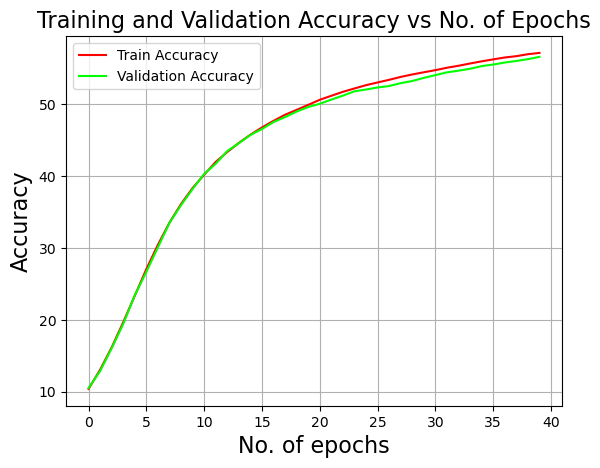

wandb: Agent Starting Run: ggtpzcld with config:
wandb: 	activation: tanh_function
wandb: 	batch_size: 4
wandb: 	beta: 0.5
wandb: 	beta1: 0.9
wandb: 	beta2: 0.99
wandb: 	epochs: 10
wandb: 	lambd: 0.0005
wandb: 	learning_rate: 0.1
wandb: 	loss: mean_squared_error_function
wandb: 	momentum: 0.5
wandb: 	neurons: 128
wandb: 	num_hidden_layers: 3
wandb: 	optimizer: nestorov_accelarated_gradient_descent
wandb: 	weight_init: xavier_initialization


lr_0.1_acti_tanh_function_w_inxavier_initialization_opt_nestorov_accelarated_gradient_descent_epoch_10_num_hid_3_loss_mean_squared_error_function_batchsize_4_neur_128_lam_0.0005_momentum_0.5_beta_0.5_beta1_0.9_beta2_0.99
neuron configuration: [784, 128, 128, 128, 10]


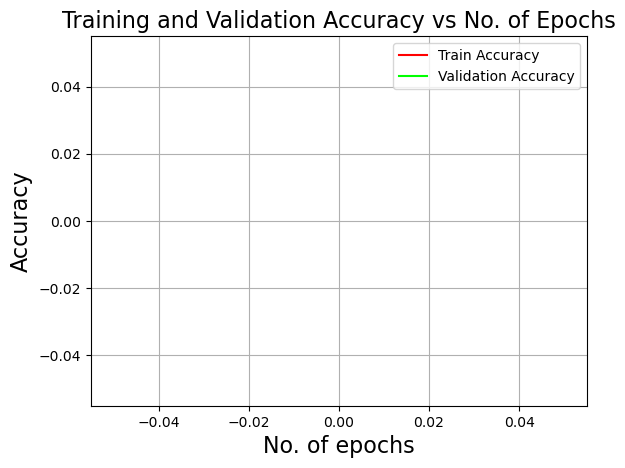

wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: i9ffhwzv with config:
wandb: 	activation: sigmoid_function
wandb: 	batch_size: 128
wandb: 	beta: 0.5
wandb: 	beta1: 0.9
wandb: 	beta2: 0.99
wandb: 	epochs: 40
wandb: 	lambd: 0
wandb: 	learning_rate: 0.01
wandb: 	loss: mean_squared_error_function
wandb: 	momentum: 0.8
wandb: 	neurons: 128
wandb: 	num_hidden_layers: 4
wandb: 	optimizer: nadam
wandb: 	weight_init: random_initialization


lr_0.01_acti_sigmoid_function_w_inrandom_initialization_opt_nadam_epoch_40_num_hid_4_loss_mean_squared_error_function_batchsize_128_neur_128_lam_0_momentum_0.8_beta_0.5_beta1_0.9_beta2_0.99
neuron configuration: [784, 128, 128, 128, 128, 10]
 
 epoch:  39  Train error:      0.56  Train accuracy:    79.85 Val error:     0.58 Val accuracy:    79.47


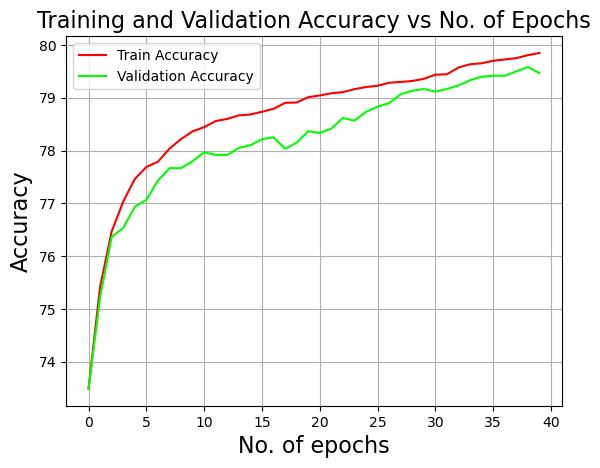

wandb: Agent Starting Run: moxrk2x1 with config:
wandb: 	activation: tanh_function
wandb: 	batch_size: 128
wandb: 	beta: 0.9
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	epochs: 5
wandb: 	lambd: 0
wandb: 	learning_rate: 0.001
wandb: 	loss: mean_squared_error_function
wandb: 	momentum: 0.5
wandb: 	neurons: 32
wandb: 	num_hidden_layers: 4
wandb: 	optimizer: vanilla_gradient_descent
wandb: 	weight_init: random_initialization


lr_0.001_acti_tanh_function_w_inrandom_initialization_opt_vanilla_gradient_descent_epoch_5_num_hid_4_loss_mean_squared_error_function_batchsize_128_neur_32_lam_0_momentum_0.5_beta_0.9_beta1_0.9_beta2_0.999
neuron configuration: [784, 32, 32, 32, 32, 10]
 
 epoch:   4  Train error:      4.78  Train accuracy:     9.45 Val error:     4.74 Val accuracy:     9.27


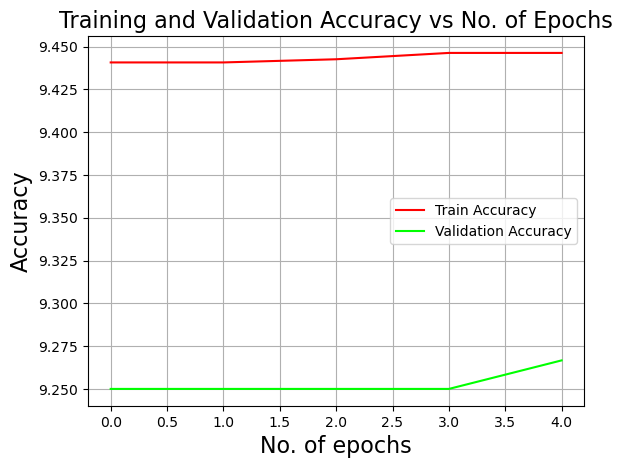

wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 68uem28c with config:
wandb: 	activation: identity_function
wandb: 	batch_size: 16
wandb: 	beta: 0.9
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	epochs: 10
wandb: 	lambd: 0
wandb: 	learning_rate: 0.001
wandb: 	loss: cross_entropy_function
wandb: 	momentum: 0.5
wandb: 	neurons: 128
wandb: 	num_hidden_layers: 3
wandb: 	optimizer: adam
wandb: 	weight_init: random_initialization


lr_0.001_acti_identity_function_w_inrandom_initialization_opt_adam_epoch_10_num_hid_3_loss_cross_entropy_function_batchsize_16_neur_128_lam_0_momentum_0.5_beta_0.9_beta1_0.9_beta2_0.999
neuron configuration: [784, 128, 128, 128, 10]
 
 epoch:   9  Train error:       nan  Train accuracy:    10.01 Val error:      nan Val accuracy:     9.95


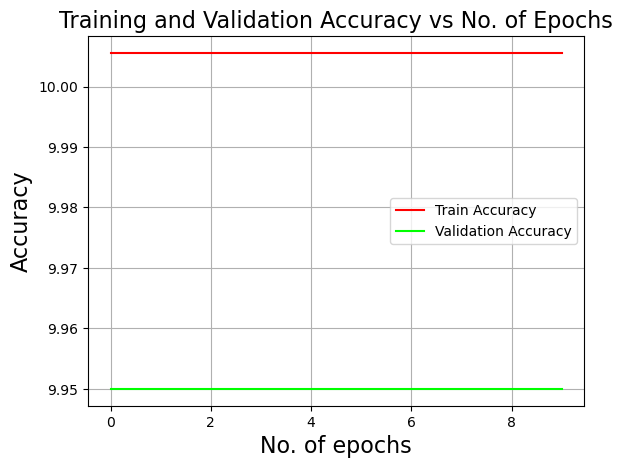

wandb: Agent Starting Run: dv96h7vq with config:
wandb: 	activation: sigmoid_function
wandb: 	batch_size: 64
wandb: 	beta: 0.5
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	epochs: 10
wandb: 	lambd: 0.0005
wandb: 	learning_rate: 0.001
wandb: 	loss: cross_entropy_function
wandb: 	momentum: 0.9
wandb: 	neurons: 64
wandb: 	num_hidden_layers: 5
wandb: 	optimizer: nadam
wandb: 	weight_init: random_initialization


lr_0.001_acti_sigmoid_function_w_inrandom_initialization_opt_nadam_epoch_10_num_hid_5_loss_cross_entropy_function_batchsize_64_neur_64_lam_0.0005_momentum_0.9_beta_0.5_beta1_0.9_beta2_0.999
neuron configuration: [784, 64, 64, 64, 64, 64, 10]
 
 epoch:   9  Train error:      2.26  Train accuracy:    30.47 Val error:     2.26 Val accuracy:    31.40


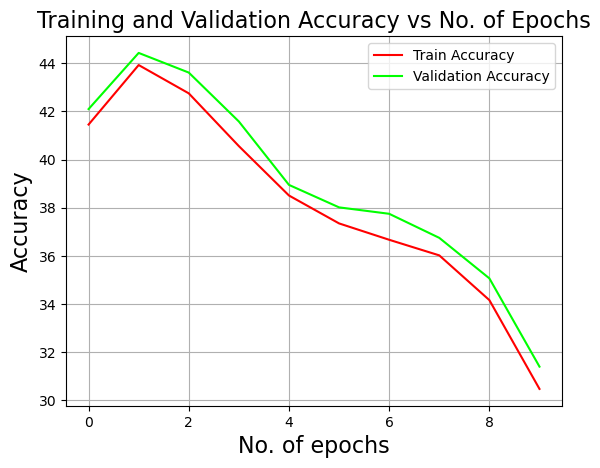

wandb: Agent Starting Run: 1rm567g3 with config:
wandb: 	activation: relu_function
wandb: 	batch_size: 256
wandb: 	beta: 0.9
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	epochs: 5
wandb: 	lambd: 0
wandb: 	learning_rate: 0.01
wandb: 	loss: cross_entropy_function
wandb: 	momentum: 0.5
wandb: 	neurons: 32
wandb: 	num_hidden_layers: 5
wandb: 	optimizer: nadam
wandb: 	weight_init: random_initialization


lr_0.01_acti_relu_function_w_inrandom_initialization_opt_nadam_epoch_5_num_hid_5_loss_cross_entropy_function_batchsize_256_neur_32_lam_0_momentum_0.5_beta_0.9_beta1_0.9_beta2_0.999
neuron configuration: [784, 32, 32, 32, 32, 32, 10]


Run 1rm567g3 errored: ValueError('The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()')
wandb: ERROR Run 1rm567g3 errored: ValueError('The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()')
wandb: Agent Starting Run: mggg3k49 with config:
wandb: 	activation: identity_function
wandb: 	batch_size: 256
wandb: 	beta: 0.5
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	epochs: 20
wandb: 	lambd: 0
wandb: 	learning_rate: 0.001
wandb: 	loss: cross_entropy_function
wandb: 	momentum: 0.8
wandb: 	neurons: 32
wandb: 	num_hidden_layers: 5
wandb: 	optimizer: nestorov_accelarated_gradient_descent
wandb: 	weight_init: xavier_initialization


lr_0.001_acti_identity_function_w_inxavier_initialization_opt_nestorov_accelarated_gradient_descent_epoch_20_num_hid_5_loss_cross_entropy_function_batchsize_256_neur_32_lam_0_momentum_0.8_beta_0.5_beta1_0.9_beta2_0.999
neuron configuration: [784, 32, 32, 32, 32, 32, 10]


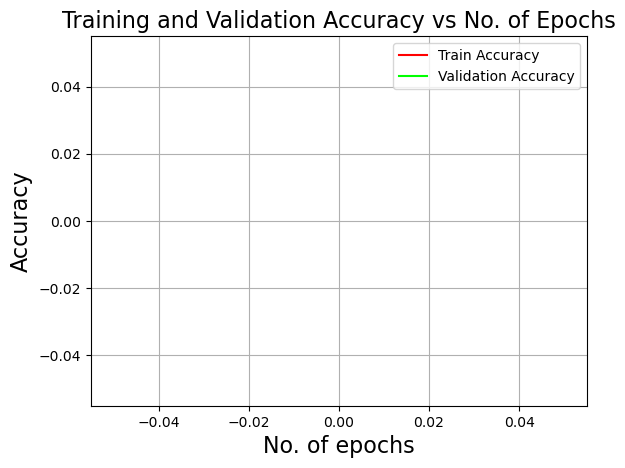

wandb: Agent Starting Run: 5imqvbbp with config:
wandb: 	activation: relu_function
wandb: 	batch_size: 64
wandb: 	beta: 0.5
wandb: 	beta1: 0.9
wandb: 	beta2: 0.99
wandb: 	epochs: 10
wandb: 	lambd: 0
wandb: 	learning_rate: 0.01
wandb: 	loss: mean_squared_error_function
wandb: 	momentum: 0.9
wandb: 	neurons: 128
wandb: 	num_hidden_layers: 4
wandb: 	optimizer: vanilla_gradient_descent
wandb: 	weight_init: xavier_initialization


lr_0.01_acti_relu_function_w_inxavier_initialization_opt_vanilla_gradient_descent_epoch_10_num_hid_4_loss_mean_squared_error_function_batchsize_64_neur_128_lam_0_momentum_0.9_beta_0.5_beta1_0.9_beta2_0.99
neuron configuration: [784, 128, 128, 128, 128, 10]


Run 5imqvbbp errored: ValueError('The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()')
wandb: ERROR Run 5imqvbbp errored: ValueError('The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()')
wandb: Agent Starting Run: 4gj96th1 with config:
wandb: 	activation: relu_function
wandb: 	batch_size: 16
wandb: 	beta: 0.9
wandb: 	beta1: 0.9
wandb: 	beta2: 0.99
wandb: 	epochs: 10
wandb: 	lambd: 0.0005
wandb: 	learning_rate: 0.1
wandb: 	loss: cross_entropy_function
wandb: 	momentum: 0.8
wandb: 	neurons: 64
wandb: 	num_hidden_layers: 3
wandb: 	optimizer: stochastic_gradient_descent
wandb: 	weight_init: random_initialization


lr_0.1_acti_relu_function_w_inrandom_initialization_opt_stochastic_gradient_descent_epoch_10_num_hid_3_loss_cross_entropy_function_batchsize_16_neur_64_lam_0.0005_momentum_0.8_beta_0.9_beta1_0.9_beta2_0.99
neuron configuration: [784, 64, 64, 64, 10]


Run 4gj96th1 errored: ValueError('The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()')
wandb: ERROR Run 4gj96th1 errored: ValueError('The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()')
wandb: Agent Starting Run: mwhl4jeh with config:
wandb: 	activation: sigmoid_function
wandb: 	batch_size: 128
wandb: 	beta: 0.9
wandb: 	beta1: 0.9
wandb: 	beta2: 0.99
wandb: 	epochs: 20
wandb: 	lambd: 0.5
wandb: 	learning_rate: 0.001
wandb: 	loss: mean_squared_error_function
wandb: 	momentum: 0.5
wandb: 	neurons: 64
wandb: 	num_hidden_layers: 5
wandb: 	optimizer: vanilla_gradient_descent
wandb: 	weight_init: xavier_initialization


lr_0.001_acti_sigmoid_function_w_inxavier_initialization_opt_vanilla_gradient_descent_epoch_20_num_hid_5_loss_mean_squared_error_function_batchsize_128_neur_64_lam_0.5_momentum_0.5_beta_0.9_beta1_0.9_beta2_0.99
neuron configuration: [784, 64, 64, 64, 64, 64, 10]
 
 epoch:  19  Train error:      3.69  Train accuracy:     9.85 Val error:     7.65 Val accuracy:     9.77


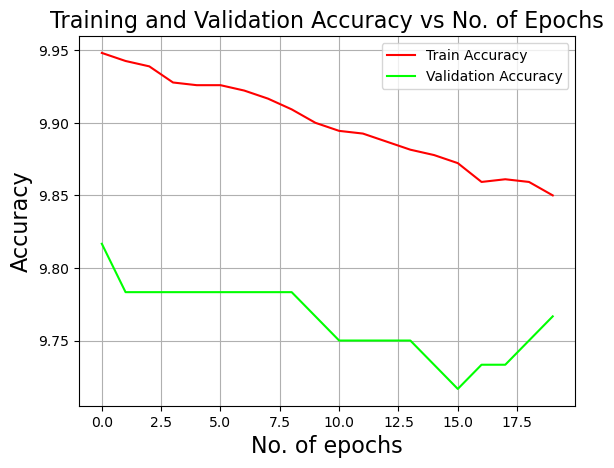

wandb: Agent Starting Run: 5vfvburh with config:
wandb: 	activation: relu_function
wandb: 	batch_size: 32
wandb: 	beta: 0.9
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	epochs: 20
wandb: 	lambd: 0.0005
wandb: 	learning_rate: 0.001
wandb: 	loss: mean_squared_error_function
wandb: 	momentum: 0.8
wandb: 	neurons: 128
wandb: 	num_hidden_layers: 3
wandb: 	optimizer: adam
wandb: 	weight_init: xavier_initialization


lr_0.001_acti_relu_function_w_inxavier_initialization_opt_adam_epoch_20_num_hid_3_loss_mean_squared_error_function_batchsize_32_neur_128_lam_0.0005_momentum_0.8_beta_0.9_beta1_0.9_beta2_0.999
neuron configuration: [784, 128, 128, 128, 10]


Run 5vfvburh errored: ValueError('The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()')
wandb: ERROR Run 5vfvburh errored: ValueError('The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()')
wandb: Agent Starting Run: kat0o0m1 with config:
wandb: 	activation: sigmoid_function
wandb: 	batch_size: 32
wandb: 	beta: 0.5
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	epochs: 20
wandb: 	lambd: 0.0005
wandb: 	learning_rate: 0.1
wandb: 	loss: cross_entropy_function
wandb: 	momentum: 0.9
wandb: 	neurons: 64
wandb: 	num_hidden_layers: 3
wandb: 	optimizer: rms_prop
wandb: 	weight_init: xavier_initialization


lr_0.1_acti_sigmoid_function_w_inxavier_initialization_opt_rms_prop_epoch_20_num_hid_3_loss_cross_entropy_function_batchsize_32_neur_64_lam_0.0005_momentum_0.9_beta_0.5_beta1_0.9_beta2_0.999
neuron configuration: [784, 64, 64, 64, 10]
 
 epoch:  19  Train error:      2.88  Train accuracy:    10.01 Val error:     2.87 Val accuracy:     9.95


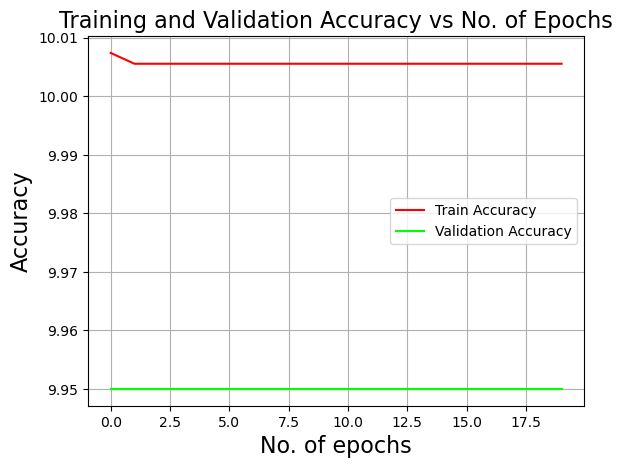

wandb: Agent Starting Run: il9c79lk with config:
wandb: 	activation: sigmoid_function
wandb: 	batch_size: 256
wandb: 	beta: 0.5
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	epochs: 10
wandb: 	lambd: 0.5
wandb: 	learning_rate: 0.1
wandb: 	loss: cross_entropy_function
wandb: 	momentum: 0.9
wandb: 	neurons: 64
wandb: 	num_hidden_layers: 4
wandb: 	optimizer: rms_prop
wandb: 	weight_init: random_initialization


lr_0.1_acti_sigmoid_function_w_inrandom_initialization_opt_rms_prop_epoch_10_num_hid_4_loss_cross_entropy_function_batchsize_256_neur_64_lam_0.5_momentum_0.9_beta_0.5_beta1_0.9_beta2_0.999
neuron configuration: [784, 64, 64, 64, 64, 10]
 
 epoch:   9  Train error:      4.00  Train accuracy:    10.02 Val error:     4.17 Val accuracy:     9.83


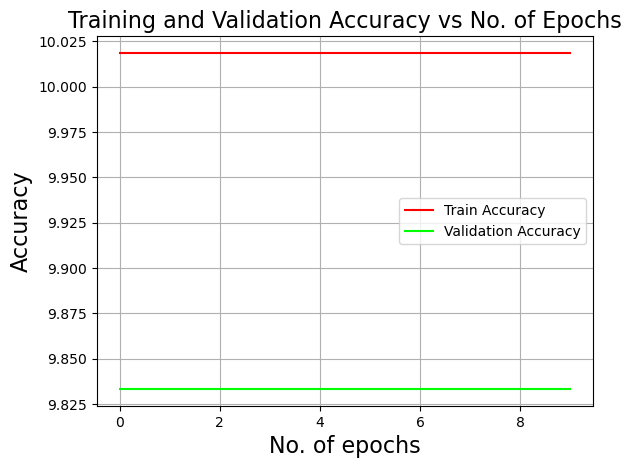

wandb: Agent Starting Run: urgboi5w with config:
wandb: 	activation: tanh_function
wandb: 	batch_size: 64
wandb: 	beta: 0.9
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	epochs: 10
wandb: 	lambd: 0
wandb: 	learning_rate: 0.0001
wandb: 	loss: cross_entropy_function
wandb: 	momentum: 0.5
wandb: 	neurons: 32
wandb: 	num_hidden_layers: 5
wandb: 	optimizer: adam
wandb: 	weight_init: xavier_initialization


lr_0.0001_acti_tanh_function_w_inxavier_initialization_opt_adam_epoch_10_num_hid_5_loss_cross_entropy_function_batchsize_64_neur_32_lam_0_momentum_0.5_beta_0.9_beta1_0.9_beta2_0.999
neuron configuration: [784, 32, 32, 32, 32, 32, 10]
 
 epoch:   9  Train error:      1.92  Train accuracy:    33.77 Val error:     1.94 Val accuracy:    32.33


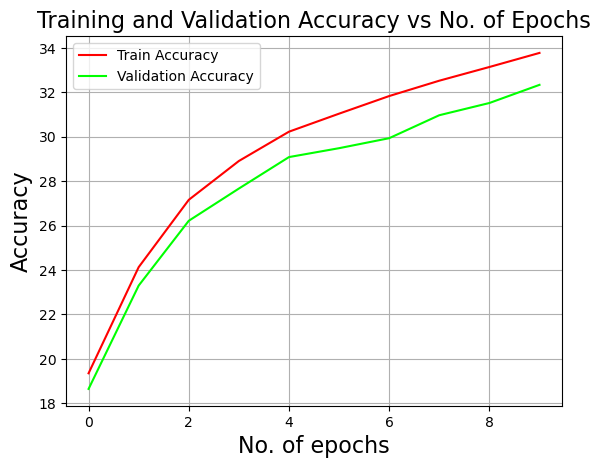

wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 2n69eiuu with config:
wandb: 	activation: tanh_function
wandb: 	batch_size: 128
wandb: 	beta: 0.5
wandb: 	beta1: 0.9
wandb: 	beta2: 0.99
wandb: 	epochs: 5
wandb: 	lambd: 0.0005
wandb: 	learning_rate: 0.1
wandb: 	loss: mean_squared_error_function
wandb: 	momentum: 0.8
wandb: 	neurons: 128
wandb: 	num_hidden_layers: 5
wandb: 	optimizer: nestorov_accelarated_gradient_descent
wandb: 	weight_init: random_initialization


lr_0.1_acti_tanh_function_w_inrandom_initialization_opt_nestorov_accelarated_gradient_descent_epoch_5_num_hid_5_loss_mean_squared_error_function_batchsize_128_neur_128_lam_0.0005_momentum_0.8_beta_0.5_beta1_0.9_beta2_0.99
neuron configuration: [784, 128, 128, 128, 128, 128, 10]


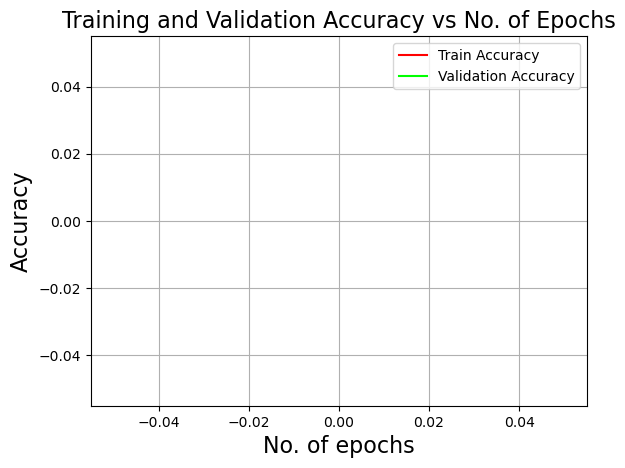

wandb: Agent Starting Run: yfy884c4 with config:
wandb: 	activation: sigmoid_function
wandb: 	batch_size: 256
wandb: 	beta: 0.9
wandb: 	beta1: 0.9
wandb: 	beta2: 0.99
wandb: 	epochs: 5
wandb: 	lambd: 0.0005
wandb: 	learning_rate: 0.0001
wandb: 	loss: cross_entropy_function
wandb: 	momentum: 0.9
wandb: 	neurons: 64
wandb: 	num_hidden_layers: 4
wandb: 	optimizer: adam
wandb: 	weight_init: xavier_initialization


lr_0.0001_acti_sigmoid_function_w_inxavier_initialization_opt_adam_epoch_5_num_hid_4_loss_cross_entropy_function_batchsize_256_neur_64_lam_0.0005_momentum_0.9_beta_0.9_beta1_0.9_beta2_0.99
neuron configuration: [784, 64, 64, 64, 64, 10]
 
 epoch:   4  Train error:      2.16  Train accuracy:    20.50 Val error:     2.16 Val accuracy:    19.72


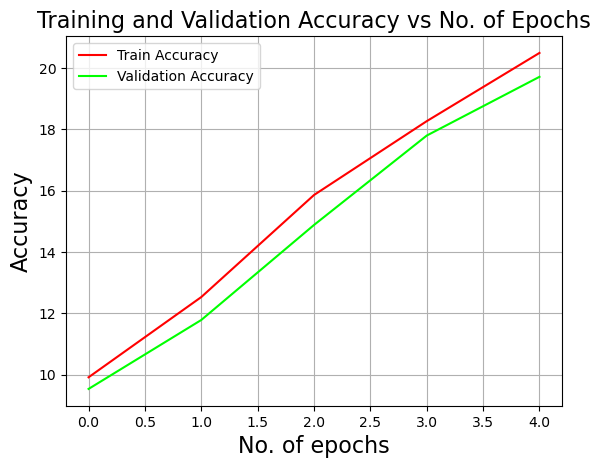

wandb: Agent Starting Run: 8j6bwl97 with config:
wandb: 	activation: identity_function
wandb: 	batch_size: 32
wandb: 	beta: 0.5
wandb: 	beta1: 0.9
wandb: 	beta2: 0.99
wandb: 	epochs: 40
wandb: 	lambd: 0.0005
wandb: 	learning_rate: 0.001
wandb: 	loss: mean_squared_error_function
wandb: 	momentum: 0.9
wandb: 	neurons: 32
wandb: 	num_hidden_layers: 5
wandb: 	optimizer: rms_prop
wandb: 	weight_init: random_initialization


lr_0.001_acti_identity_function_w_inrandom_initialization_opt_rms_prop_epoch_40_num_hid_5_loss_mean_squared_error_function_batchsize_32_neur_32_lam_0.0005_momentum_0.9_beta_0.5_beta1_0.9_beta2_0.99
neuron configuration: [784, 32, 32, 32, 32, 32, 10]
 
 epoch:  39  Train error:       nan  Train accuracy:    10.01 Val error:      nan Val accuracy:     9.95


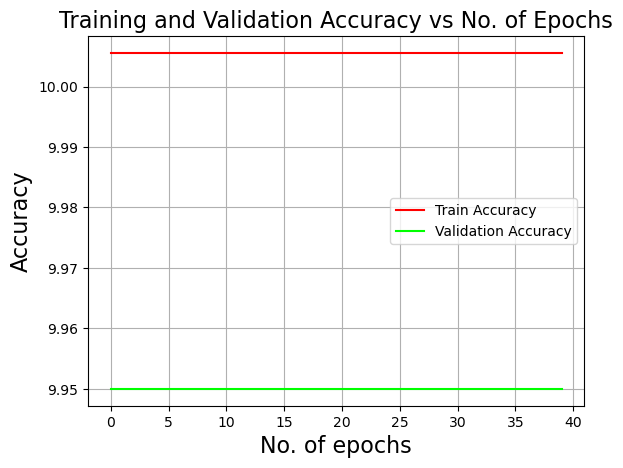

wandb: Agent Starting Run: chaw3tp2 with config:
wandb: 	activation: sigmoid_function
wandb: 	batch_size: 256
wandb: 	beta: 0.5
wandb: 	beta1: 0.9
wandb: 	beta2: 0.99
wandb: 	epochs: 10
wandb: 	lambd: 0
wandb: 	learning_rate: 0.1
wandb: 	loss: mean_squared_error_function
wandb: 	momentum: 0.9
wandb: 	neurons: 128
wandb: 	num_hidden_layers: 5
wandb: 	optimizer: nadam
wandb: 	weight_init: random_initialization


lr_0.1_acti_sigmoid_function_w_inrandom_initialization_opt_nadam_epoch_10_num_hid_5_loss_mean_squared_error_function_batchsize_256_neur_128_lam_0_momentum_0.9_beta_0.5_beta1_0.9_beta2_0.99
neuron configuration: [784, 128, 128, 128, 128, 128, 10]
 
 epoch:   9  Train error:      0.69  Train accuracy:    75.21 Val error:     0.71 Val accuracy:    73.73


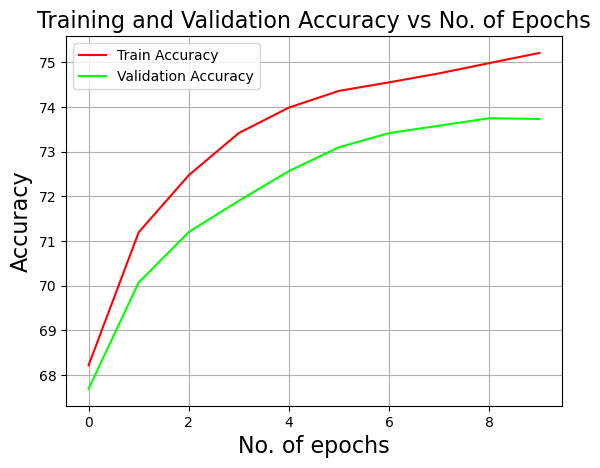

wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 199iklmd with config:
wandb: 	activation: tanh_function
wandb: 	batch_size: 16
wandb: 	beta: 0.9
wandb: 	beta1: 0.9
wandb: 	beta2: 0.99
wandb: 	epochs: 40
wandb: 	lambd: 0.5
wandb: 	learning_rate: 0.0001
wandb: 	loss: cross_entropy_function
wandb: 	momentum: 0.9
wandb: 	neurons: 64
wandb: 	num_hidden_layers: 5
wandb: 	optimizer: vanilla_gradient_descent
wandb: 	weight_init: random_initialization


lr_0.0001_acti_tanh_function_w_inrandom_initialization_opt_vanilla_gradient_descent_epoch_40_num_hid_5_loss_cross_entropy_function_batchsize_16_neur_64_lam_0.5_momentum_0.9_beta_0.9_beta1_0.9_beta2_0.99
neuron configuration: [784, 64, 64, 64, 64, 64, 10]
 
 epoch:  39  Train error:      6.53  Train accuracy:    11.06 Val error:     7.34 Val accuracy:    11.13


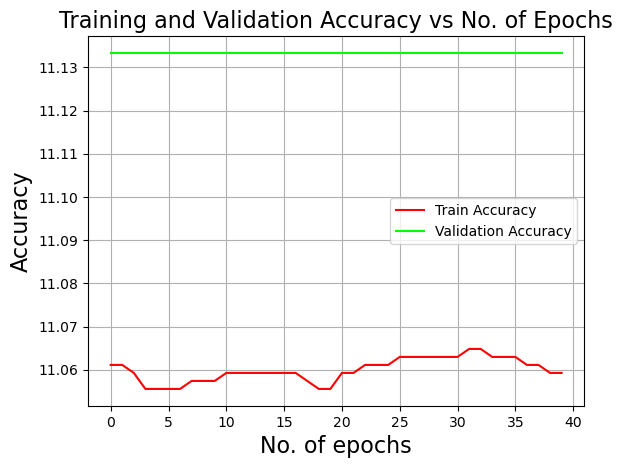

wandb: Agent Starting Run: z15vcn6j with config:
wandb: 	activation: relu_function
wandb: 	batch_size: 64
wandb: 	beta: 0.5
wandb: 	beta1: 0.9
wandb: 	beta2: 0.99
wandb: 	epochs: 5
wandb: 	lambd: 0.5
wandb: 	learning_rate: 0.001
wandb: 	loss: mean_squared_error_function
wandb: 	momentum: 0.5
wandb: 	neurons: 32
wandb: 	num_hidden_layers: 4
wandb: 	optimizer: stochastic_gradient_descent
wandb: 	weight_init: random_initialization


lr_0.001_acti_relu_function_w_inrandom_initialization_opt_stochastic_gradient_descent_epoch_5_num_hid_4_loss_mean_squared_error_function_batchsize_64_neur_32_lam_0.5_momentum_0.5_beta_0.5_beta1_0.9_beta2_0.99
neuron configuration: [784, 32, 32, 32, 32, 10]


Run z15vcn6j errored: ValueError('The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()')
wandb: ERROR Run z15vcn6j errored: ValueError('The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()')
wandb: Agent Starting Run: q4bv93q5 with config:
wandb: 	activation: sigmoid_function
wandb: 	batch_size: 256
wandb: 	beta: 0.9
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	epochs: 5
wandb: 	lambd: 0
wandb: 	learning_rate: 0.0001
wandb: 	loss: cross_entropy_function
wandb: 	momentum: 0.9
wandb: 	neurons: 32
wandb: 	num_hidden_layers: 4
wandb: 	optimizer: momentum_gradient_descent
wandb: 	weight_init: random_initialization


lr_0.0001_acti_sigmoid_function_w_inrandom_initialization_opt_momentum_gradient_descent_epoch_5_num_hid_4_loss_cross_entropy_function_batchsize_256_neur_32_lam_0_momentum_0.9_beta_0.9_beta1_0.9_beta2_0.999
neuron configuration: [784, 32, 32, 32, 32, 10]
 
 epoch:   4  Train error:      2.59  Train accuracy:    10.45 Val error:     2.59 Val accuracy:    10.27


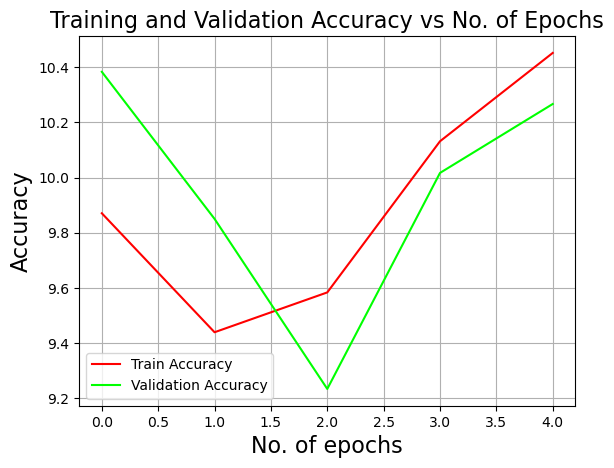

wandb: Agent Starting Run: q0hegu1n with config:
wandb: 	activation: relu_function
wandb: 	batch_size: 32
wandb: 	beta: 0.5
wandb: 	beta1: 0.9
wandb: 	beta2: 0.99
wandb: 	epochs: 20
wandb: 	lambd: 0.5
wandb: 	learning_rate: 0.01
wandb: 	loss: mean_squared_error_function
wandb: 	momentum: 0.5
wandb: 	neurons: 64
wandb: 	num_hidden_layers: 3
wandb: 	optimizer: vanilla_gradient_descent
wandb: 	weight_init: xavier_initialization


lr_0.01_acti_relu_function_w_inxavier_initialization_opt_vanilla_gradient_descent_epoch_20_num_hid_3_loss_mean_squared_error_function_batchsize_32_neur_64_lam_0.5_momentum_0.5_beta_0.5_beta1_0.9_beta2_0.99
neuron configuration: [784, 64, 64, 64, 10]


Run q0hegu1n errored: ValueError('The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()')
wandb: ERROR Run q0hegu1n errored: ValueError('The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()')
wandb: Agent Starting Run: i5fln9hd with config:
wandb: 	activation: identity_function
wandb: 	batch_size: 32
wandb: 	beta: 0.9
wandb: 	beta1: 0.9
wandb: 	beta2: 0.99
wandb: 	epochs: 20
wandb: 	lambd: 0
wandb: 	learning_rate: 0.0001
wandb: 	loss: cross_entropy_function
wandb: 	momentum: 0.9
wandb: 	neurons: 128
wandb: 	num_hidden_layers: 3
wandb: 	optimizer: momentum_gradient_descent
wandb: 	weight_init: xavier_initialization


lr_0.0001_acti_identity_function_w_inxavier_initialization_opt_momentum_gradient_descent_epoch_20_num_hid_3_loss_cross_entropy_function_batchsize_32_neur_128_lam_0_momentum_0.9_beta_0.9_beta1_0.9_beta2_0.99
neuron configuration: [784, 128, 128, 128, 10]
 
 epoch:  19  Train error:       nan  Train accuracy:    10.01 Val error:      nan Val accuracy:     9.95


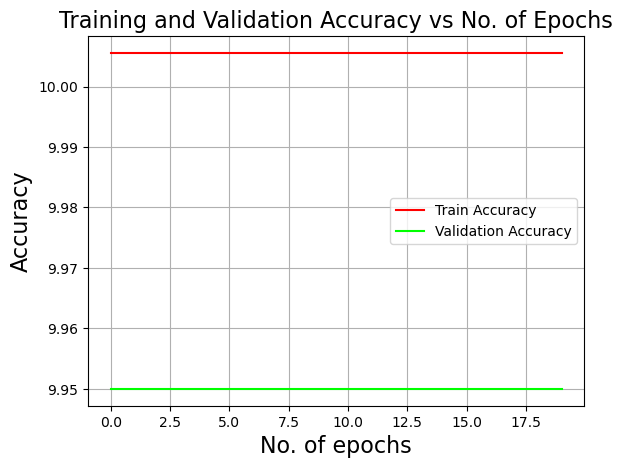

wandb: Agent Starting Run: wamix7ez with config:
wandb: 	activation: relu_function
wandb: 	batch_size: 32
wandb: 	beta: 0.9
wandb: 	beta1: 0.9
wandb: 	beta2: 0.99
wandb: 	epochs: 5
wandb: 	lambd: 0
wandb: 	learning_rate: 0.001
wandb: 	loss: mean_squared_error_function
wandb: 	momentum: 0.9
wandb: 	neurons: 32
wandb: 	num_hidden_layers: 5
wandb: 	optimizer: stochastic_gradient_descent
wandb: 	weight_init: xavier_initialization


lr_0.001_acti_relu_function_w_inxavier_initialization_opt_stochastic_gradient_descent_epoch_5_num_hid_5_loss_mean_squared_error_function_batchsize_32_neur_32_lam_0_momentum_0.9_beta_0.9_beta1_0.9_beta2_0.99
neuron configuration: [784, 32, 32, 32, 32, 32, 10]


Run wamix7ez errored: ValueError('The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()')
wandb: ERROR Run wamix7ez errored: ValueError('The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()')
wandb: Agent Starting Run: 40llx2k6 with config:
wandb: 	activation: identity_function
wandb: 	batch_size: 128
wandb: 	beta: 0.5
wandb: 	beta1: 0.9
wandb: 	beta2: 0.99
wandb: 	epochs: 40
wandb: 	lambd: 0.5
wandb: 	learning_rate: 0.0001
wandb: 	loss: mean_squared_error_function
wandb: 	momentum: 0.5
wandb: 	neurons: 64
wandb: 	num_hidden_layers: 3
wandb: 	optimizer: vanilla_gradient_descent
wandb: 	weight_init: xavier_initialization


lr_0.0001_acti_identity_function_w_inxavier_initialization_opt_vanilla_gradient_descent_epoch_40_num_hid_3_loss_mean_squared_error_function_batchsize_128_neur_64_lam_0.5_momentum_0.5_beta_0.5_beta1_0.9_beta2_0.99
neuron configuration: [784, 64, 64, 64, 10]
 
 epoch:  39  Train error:       nan  Train accuracy:    10.01 Val error:      nan Val accuracy:     9.95


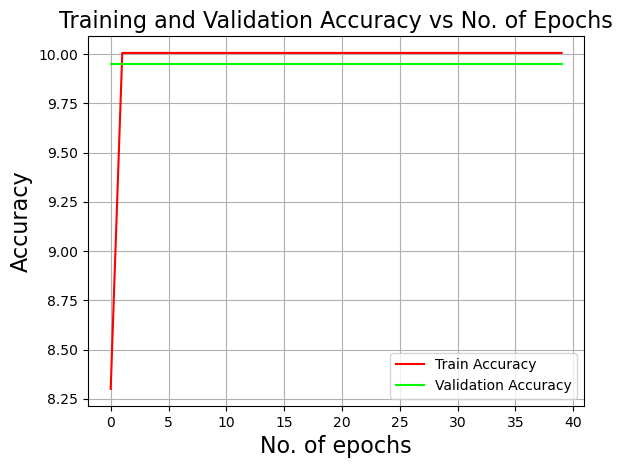

wandb: Agent Starting Run: yzu9dig3 with config:
wandb: 	activation: identity_function
wandb: 	batch_size: 4
wandb: 	beta: 0.9
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	epochs: 5
wandb: 	lambd: 0.5
wandb: 	learning_rate: 0.01
wandb: 	loss: mean_squared_error_function
wandb: 	momentum: 0.5
wandb: 	neurons: 32
wandb: 	num_hidden_layers: 5
wandb: 	optimizer: momentum_gradient_descent
wandb: 	weight_init: random_initialization


lr_0.01_acti_identity_function_w_inrandom_initialization_opt_momentum_gradient_descent_epoch_5_num_hid_5_loss_mean_squared_error_function_batchsize_4_neur_32_lam_0.5_momentum_0.5_beta_0.9_beta1_0.9_beta2_0.999
neuron configuration: [784, 32, 32, 32, 32, 32, 10]
 
 epoch:   4  Train error:       nan  Train accuracy:    10.01 Val error:      nan Val accuracy:     9.95


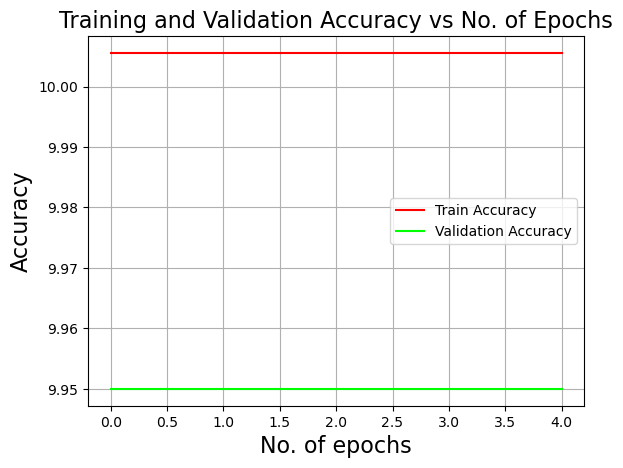

wandb: Agent Starting Run: khu7xugl with config:
wandb: 	activation: sigmoid_function
wandb: 	batch_size: 16
wandb: 	beta: 0.9
wandb: 	beta1: 0.9
wandb: 	beta2: 0.99
wandb: 	epochs: 40
wandb: 	lambd: 0.5
wandb: 	learning_rate: 0.1
wandb: 	loss: cross_entropy_function
wandb: 	momentum: 0.8
wandb: 	neurons: 128
wandb: 	num_hidden_layers: 4
wandb: 	optimizer: rms_prop
wandb: 	weight_init: random_initialization


lr_0.1_acti_sigmoid_function_w_inrandom_initialization_opt_rms_prop_epoch_40_num_hid_4_loss_cross_entropy_function_batchsize_16_neur_128_lam_0.5_momentum_0.8_beta_0.9_beta1_0.9_beta2_0.99
neuron configuration: [784, 128, 128, 128, 128, 10]
 
 epoch:  39  Train error:      4.83  Train accuracy:     9.98 Val error:     5.49 Val accuracy:    10.18


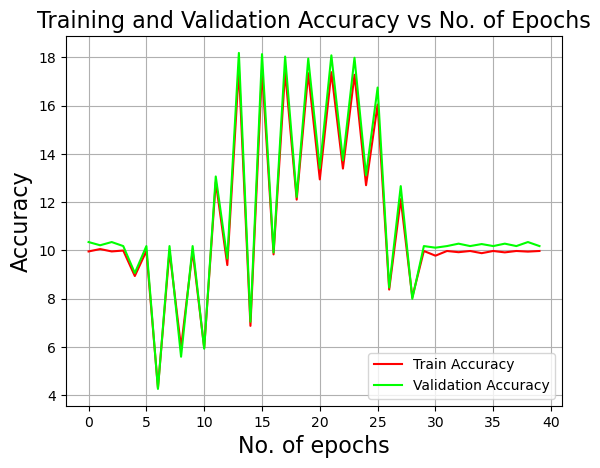

wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 1qv378z5 with config:
wandb: 	activation: identity_function
wandb: 	batch_size: 64
wandb: 	beta: 0.5
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	epochs: 10
wandb: 	lambd: 0
wandb: 	learning_rate: 0.0001
wandb: 	loss: mean_squared_error_function
wandb: 	momentum: 0.8
wandb: 	neurons: 128
wandb: 	num_hidden_layers: 3
wandb: 	optimizer: vanilla_gradient_descent
wandb: 	weight_init: random_initialization


lr_0.0001_acti_identity_function_w_inrandom_initialization_opt_vanilla_gradient_descent_epoch_10_num_hid_3_loss_mean_squared_error_function_batchsize_64_neur_128_lam_0_momentum_0.8_beta_0.5_beta1_0.9_beta2_0.999
neuron configuration: [784, 128, 128, 128, 10]
 
 epoch:   9  Train error:       nan  Train accuracy:    10.01 Val error:      nan Val accuracy:     9.95


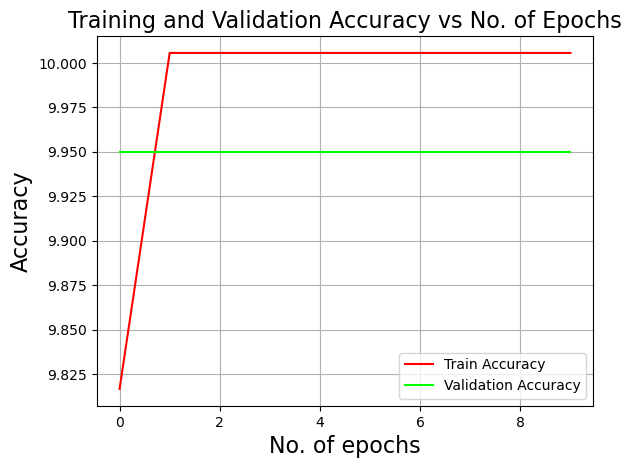

wandb: Agent Starting Run: kmn4b71n with config:
wandb: 	activation: relu_function
wandb: 	batch_size: 4
wandb: 	beta: 0.5
wandb: 	beta1: 0.9
wandb: 	beta2: 0.99
wandb: 	epochs: 20
wandb: 	lambd: 0
wandb: 	learning_rate: 0.001
wandb: 	loss: mean_squared_error_function
wandb: 	momentum: 0.8
wandb: 	neurons: 64
wandb: 	num_hidden_layers: 5
wandb: 	optimizer: adam
wandb: 	weight_init: random_initialization


lr_0.001_acti_relu_function_w_inrandom_initialization_opt_adam_epoch_20_num_hid_5_loss_mean_squared_error_function_batchsize_4_neur_64_lam_0_momentum_0.8_beta_0.5_beta1_0.9_beta2_0.99
neuron configuration: [784, 64, 64, 64, 64, 64, 10]


Run kmn4b71n errored: ValueError('The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()')
wandb: ERROR Run kmn4b71n errored: ValueError('The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()')
wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: yiszkkwz with config:
wandb: 	activation: identity_function
wandb: 	batch_size: 16
wandb: 	beta: 0.5
wandb: 	beta1: 0.9
wandb: 	beta2: 0.99
wandb: 	epochs: 40
wandb: 	lambd: 0
wandb: 	learning_rate: 0.1
wandb: 	loss: mean_squared_error_function
wandb: 	momentum: 0.5
wandb: 	neurons: 64
wandb: 	num_hidden_layers: 3
wandb: 	optimizer: nestorov_accelarated_gradient_descent
wandb: 	weight_init: random_initialization


lr_0.1_acti_identity_function_w_inrandom_initialization_opt_nestorov_accelarated_gradient_descent_epoch_40_num_hid_3_loss_mean_squared_error_function_batchsize_16_neur_64_lam_0_momentum_0.5_beta_0.5_beta1_0.9_beta2_0.99
neuron configuration: [784, 64, 64, 64, 10]


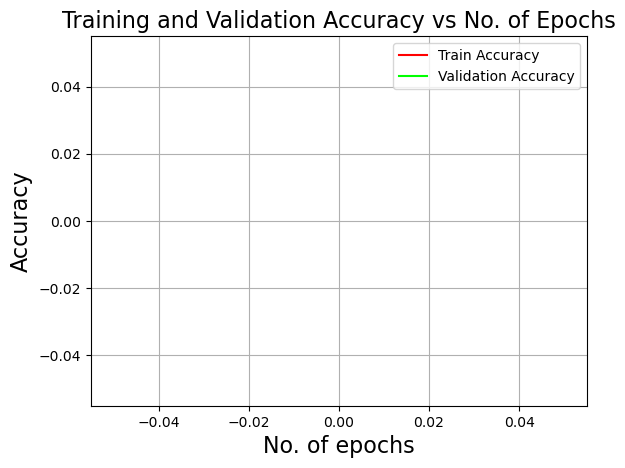

wandb: Agent Starting Run: gmwi8r3q with config:
wandb: 	activation: sigmoid_function
wandb: 	batch_size: 4
wandb: 	beta: 0.5
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	epochs: 10
wandb: 	lambd: 0.0005
wandb: 	learning_rate: 0.0001
wandb: 	loss: cross_entropy_function
wandb: 	momentum: 0.5
wandb: 	neurons: 32
wandb: 	num_hidden_layers: 5
wandb: 	optimizer: adam
wandb: 	weight_init: random_initialization


lr_0.0001_acti_sigmoid_function_w_inrandom_initialization_opt_adam_epoch_10_num_hid_5_loss_cross_entropy_function_batchsize_4_neur_32_lam_0.0005_momentum_0.5_beta_0.5_beta1_0.9_beta2_0.999
neuron configuration: [784, 32, 32, 32, 32, 32, 10]
 
 epoch:   9  Train error:      1.68  Train accuracy:    26.57 Val error:     1.69 Val accuracy:    25.42


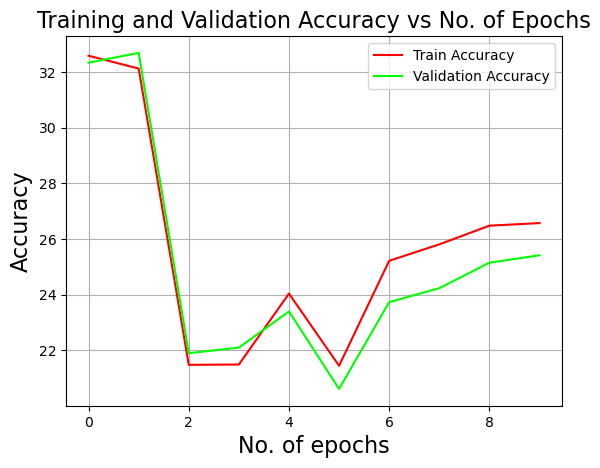

wandb: Agent Starting Run: ueqpl6ek with config:
wandb: 	activation: tanh_function
wandb: 	batch_size: 128
wandb: 	beta: 0.5
wandb: 	beta1: 0.9
wandb: 	beta2: 0.99
wandb: 	epochs: 5
wandb: 	lambd: 0.5
wandb: 	learning_rate: 0.01
wandb: 	loss: mean_squared_error_function
wandb: 	momentum: 0.5
wandb: 	neurons: 32
wandb: 	num_hidden_layers: 3
wandb: 	optimizer: nestorov_accelarated_gradient_descent
wandb: 	weight_init: xavier_initialization


lr_0.01_acti_tanh_function_w_inxavier_initialization_opt_nestorov_accelarated_gradient_descent_epoch_5_num_hid_3_loss_mean_squared_error_function_batchsize_128_neur_32_lam_0.5_momentum_0.5_beta_0.5_beta1_0.9_beta2_0.99
neuron configuration: [784, 32, 32, 32, 10]


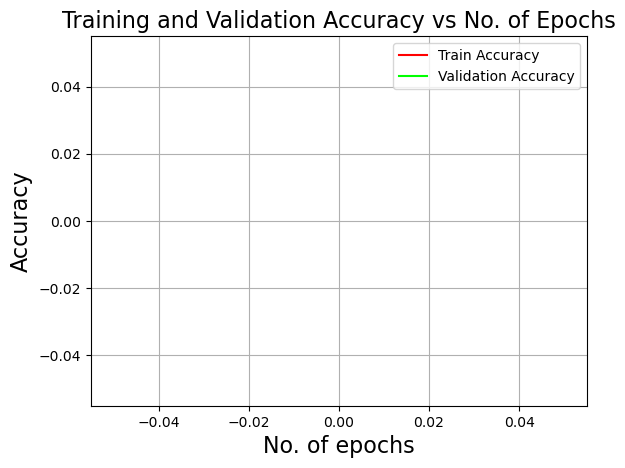

wandb: Agent Starting Run: s32mrlv9 with config:
wandb: 	activation: relu_function
wandb: 	batch_size: 16
wandb: 	beta: 0.5
wandb: 	beta1: 0.9
wandb: 	beta2: 0.99
wandb: 	epochs: 20
wandb: 	lambd: 0.0005
wandb: 	learning_rate: 0.1
wandb: 	loss: cross_entropy_function
wandb: 	momentum: 0.8
wandb: 	neurons: 128
wandb: 	num_hidden_layers: 5
wandb: 	optimizer: stochastic_gradient_descent
wandb: 	weight_init: xavier_initialization


lr_0.1_acti_relu_function_w_inxavier_initialization_opt_stochastic_gradient_descent_epoch_20_num_hid_5_loss_cross_entropy_function_batchsize_16_neur_128_lam_0.0005_momentum_0.8_beta_0.5_beta1_0.9_beta2_0.99
neuron configuration: [784, 128, 128, 128, 128, 128, 10]


Run s32mrlv9 errored: ValueError('The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()')
wandb: ERROR Run s32mrlv9 errored: ValueError('The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()')
wandb: Agent Starting Run: hk6dog2d with config:
wandb: 	activation: tanh_function
wandb: 	batch_size: 32
wandb: 	beta: 0.9
wandb: 	beta1: 0.9
wandb: 	beta2: 0.99
wandb: 	epochs: 40
wandb: 	lambd: 0.5
wandb: 	learning_rate: 0.1
wandb: 	loss: cross_entropy_function
wandb: 	momentum: 0.5
wandb: 	neurons: 32
wandb: 	num_hidden_layers: 4
wandb: 	optimizer: nestorov_accelarated_gradient_descent
wandb: 	weight_init: xavier_initialization


lr_0.1_acti_tanh_function_w_inxavier_initialization_opt_nestorov_accelarated_gradient_descent_epoch_40_num_hid_4_loss_cross_entropy_function_batchsize_32_neur_32_lam_0.5_momentum_0.5_beta_0.9_beta1_0.9_beta2_0.99
neuron configuration: [784, 32, 32, 32, 32, 10]


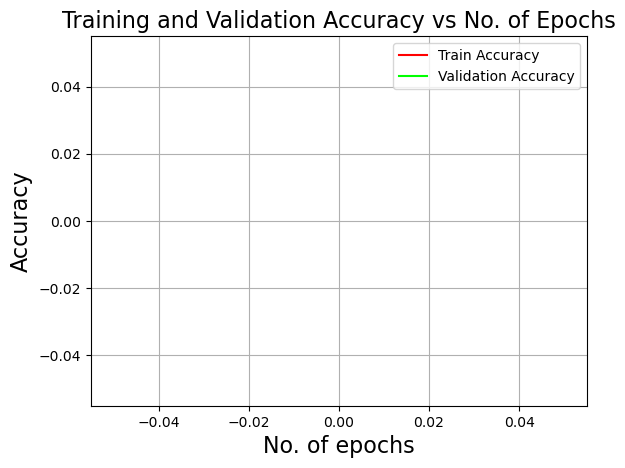

wandb: Agent Starting Run: trmeb2cg with config:
wandb: 	activation: identity_function
wandb: 	batch_size: 64
wandb: 	beta: 0.9
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	epochs: 20
wandb: 	lambd: 0.5
wandb: 	learning_rate: 0.001
wandb: 	loss: cross_entropy_function
wandb: 	momentum: 0.9
wandb: 	neurons: 64
wandb: 	num_hidden_layers: 3
wandb: 	optimizer: vanilla_gradient_descent
wandb: 	weight_init: random_initialization


lr_0.001_acti_identity_function_w_inrandom_initialization_opt_vanilla_gradient_descent_epoch_20_num_hid_3_loss_cross_entropy_function_batchsize_64_neur_64_lam_0.5_momentum_0.9_beta_0.9_beta1_0.9_beta2_0.999
neuron configuration: [784, 64, 64, 64, 10]
 
 epoch:  19  Train error:       nan  Train accuracy:    10.01 Val error:      nan Val accuracy:     9.95


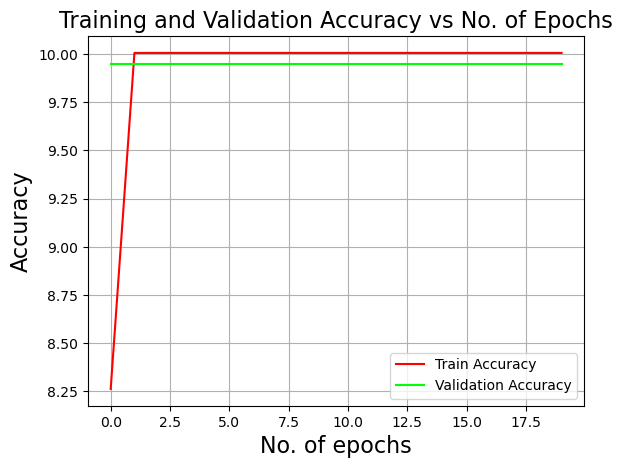

wandb: Agent Starting Run: iap1tk0r with config:
wandb: 	activation: tanh_function
wandb: 	batch_size: 16
wandb: 	beta: 0.9
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	epochs: 5
wandb: 	lambd: 0
wandb: 	learning_rate: 0.001
wandb: 	loss: mean_squared_error_function
wandb: 	momentum: 0.8
wandb: 	neurons: 128
wandb: 	num_hidden_layers: 3
wandb: 	optimizer: momentum_gradient_descent
wandb: 	weight_init: random_initialization


lr_0.001_acti_tanh_function_w_inrandom_initialization_opt_momentum_gradient_descent_epoch_5_num_hid_3_loss_mean_squared_error_function_batchsize_16_neur_128_lam_0_momentum_0.8_beta_0.9_beta1_0.9_beta2_0.999
neuron configuration: [784, 128, 128, 128, 10]
 
 epoch:   4  Train error:      1.09  Train accuracy:    65.64 Val error:     1.12 Val accuracy:    64.80


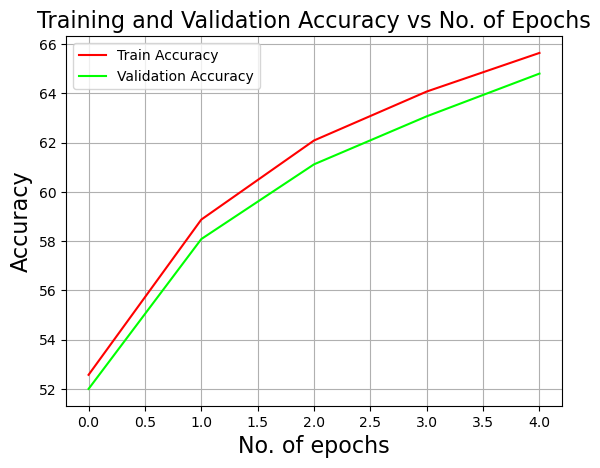

wandb: Agent Starting Run: mo0oopzm with config:
wandb: 	activation: tanh_function
wandb: 	batch_size: 4
wandb: 	beta: 0.5
wandb: 	beta1: 0.9
wandb: 	beta2: 0.99
wandb: 	epochs: 20
wandb: 	lambd: 0
wandb: 	learning_rate: 0.001
wandb: 	loss: cross_entropy_function
wandb: 	momentum: 0.8
wandb: 	neurons: 64
wandb: 	num_hidden_layers: 4
wandb: 	optimizer: nadam
wandb: 	weight_init: xavier_initialization


lr_0.001_acti_tanh_function_w_inxavier_initialization_opt_nadam_epoch_20_num_hid_4_loss_cross_entropy_function_batchsize_4_neur_64_lam_0_momentum_0.8_beta_0.5_beta1_0.9_beta2_0.99
neuron configuration: [784, 64, 64, 64, 64, 10]
 
 epoch:  19  Train error:      0.69  Train accuracy:    75.05 Val error:     0.71 Val accuracy:    74.48


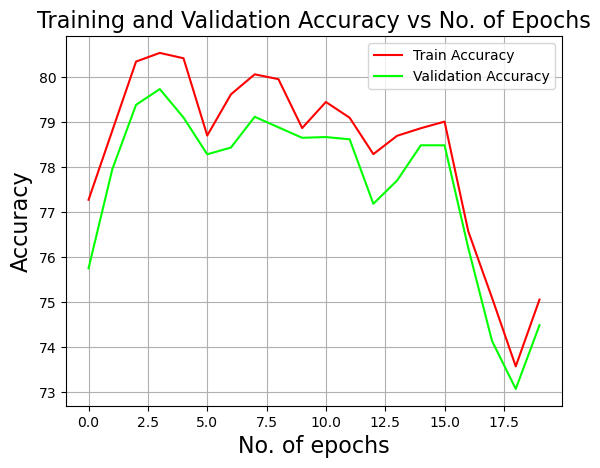

wandb: Agent Starting Run: 9ni5bt33 with config:
wandb: 	activation: tanh_function
wandb: 	batch_size: 16
wandb: 	beta: 0.5
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	epochs: 10
wandb: 	lambd: 0
wandb: 	learning_rate: 0.0001
wandb: 	loss: cross_entropy_function
wandb: 	momentum: 0.8
wandb: 	neurons: 32
wandb: 	num_hidden_layers: 3
wandb: 	optimizer: momentum_gradient_descent
wandb: 	weight_init: random_initialization


lr_0.0001_acti_tanh_function_w_inrandom_initialization_opt_momentum_gradient_descent_epoch_10_num_hid_3_loss_cross_entropy_function_batchsize_16_neur_32_lam_0_momentum_0.8_beta_0.5_beta1_0.9_beta2_0.999
neuron configuration: [784, 32, 32, 32, 10]
 
 epoch:   9  Train error:      1.71  Train accuracy:    41.43 Val error:     1.70 Val accuracy:    41.40


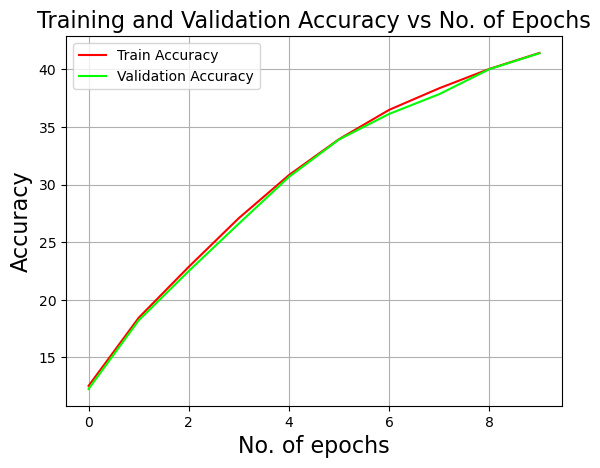

wandb: Agent Starting Run: 0n5hhmx7 with config:
wandb: 	activation: identity_function
wandb: 	batch_size: 16
wandb: 	beta: 0.9
wandb: 	beta1: 0.9
wandb: 	beta2: 0.99
wandb: 	epochs: 20
wandb: 	lambd: 0.5
wandb: 	learning_rate: 0.1
wandb: 	loss: cross_entropy_function
wandb: 	momentum: 0.8
wandb: 	neurons: 32
wandb: 	num_hidden_layers: 5
wandb: 	optimizer: stochastic_gradient_descent
wandb: 	weight_init: xavier_initialization


lr_0.1_acti_identity_function_w_inxavier_initialization_opt_stochastic_gradient_descent_epoch_20_num_hid_5_loss_cross_entropy_function_batchsize_16_neur_32_lam_0.5_momentum_0.8_beta_0.9_beta1_0.9_beta2_0.99
neuron configuration: [784, 32, 32, 32, 32, 32, 10]
 
 epoch:  19  Train error:       nan  Train accuracy:    10.01 Val error:      nan Val accuracy:     9.95


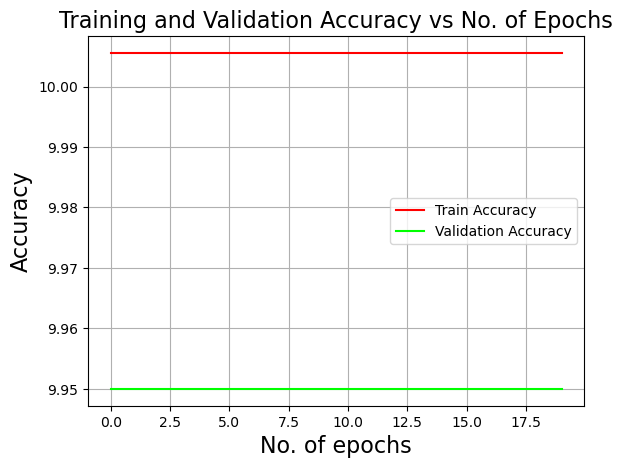

wandb: Agent Starting Run: lwgz7x3r with config:
wandb: 	activation: sigmoid_function
wandb: 	batch_size: 4
wandb: 	beta: 0.9
wandb: 	beta1: 0.9
wandb: 	beta2: 0.99
wandb: 	epochs: 20
wandb: 	lambd: 0.0005
wandb: 	learning_rate: 0.01
wandb: 	loss: cross_entropy_function
wandb: 	momentum: 0.9
wandb: 	neurons: 64
wandb: 	num_hidden_layers: 5
wandb: 	optimizer: vanilla_gradient_descent
wandb: 	weight_init: random_initialization


lr_0.01_acti_sigmoid_function_w_inrandom_initialization_opt_vanilla_gradient_descent_epoch_20_num_hid_5_loss_cross_entropy_function_batchsize_4_neur_64_lam_0.0005_momentum_0.9_beta_0.9_beta1_0.9_beta2_0.99
neuron configuration: [784, 64, 64, 64, 64, 64, 10]
 
 epoch:  19  Train error:      3.72  Train accuracy:    14.34 Val error:     3.70 Val accuracy:    13.30


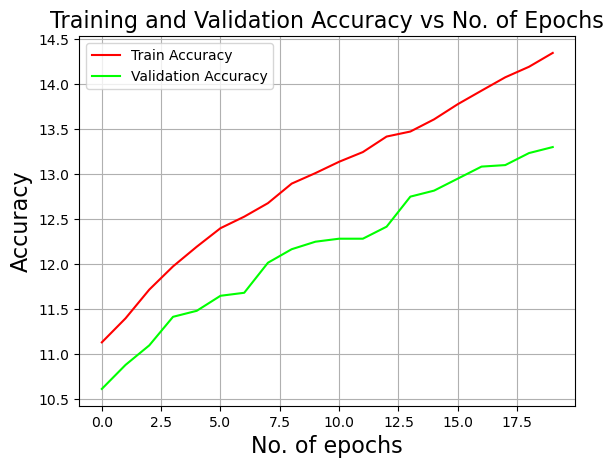

wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 2rmtyw0o with config:
wandb: 	activation: tanh_function
wandb: 	batch_size: 64
wandb: 	beta: 0.9
wandb: 	beta1: 0.9
wandb: 	beta2: 0.99
wandb: 	epochs: 10
wandb: 	lambd: 0
wandb: 	learning_rate: 0.0001
wandb: 	loss: mean_squared_error_function
wandb: 	momentum: 0.5
wandb: 	neurons: 128
wandb: 	num_hidden_layers: 5
wandb: 	optimizer: momentum_gradient_descent
wandb: 	weight_init: random_initialization


lr_0.0001_acti_tanh_function_w_inrandom_initialization_opt_momentum_gradient_descent_epoch_10_num_hid_5_loss_mean_squared_error_function_batchsize_64_neur_128_lam_0_momentum_0.5_beta_0.9_beta1_0.9_beta2_0.99
neuron configuration: [784, 128, 128, 128, 128, 128, 10]
 
 epoch:   9  Train error:      6.53  Train accuracy:    14.89 Val error:     6.50 Val accuracy:    15.13


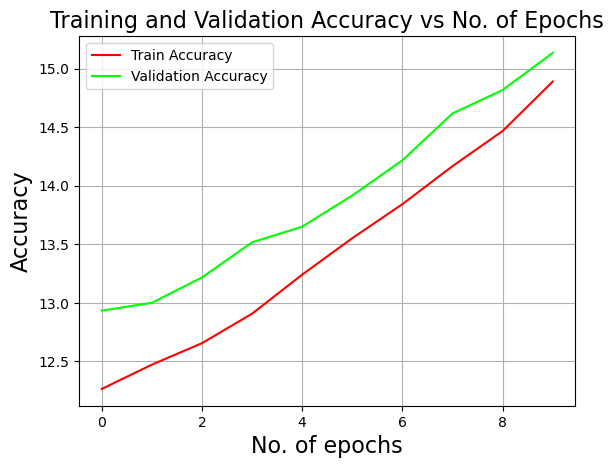

wandb: Agent Starting Run: 47tsfly1 with config:
wandb: 	activation: sigmoid_function
wandb: 	batch_size: 256
wandb: 	beta: 0.9
wandb: 	beta1: 0.9
wandb: 	beta2: 0.99
wandb: 	epochs: 20
wandb: 	lambd: 0.5
wandb: 	learning_rate: 0.001
wandb: 	loss: cross_entropy_function
wandb: 	momentum: 0.8
wandb: 	neurons: 128
wandb: 	num_hidden_layers: 4
wandb: 	optimizer: nadam
wandb: 	weight_init: xavier_initialization


lr_0.001_acti_sigmoid_function_w_inxavier_initialization_opt_nadam_epoch_20_num_hid_4_loss_cross_entropy_function_batchsize_256_neur_128_lam_0.5_momentum_0.8_beta_0.9_beta1_0.9_beta2_0.99
neuron configuration: [784, 128, 128, 128, 128, 10]
 
 epoch:  19  Train error:      2.30  Train accuracy:     9.96 Val error:     2.31 Val accuracy:    10.32


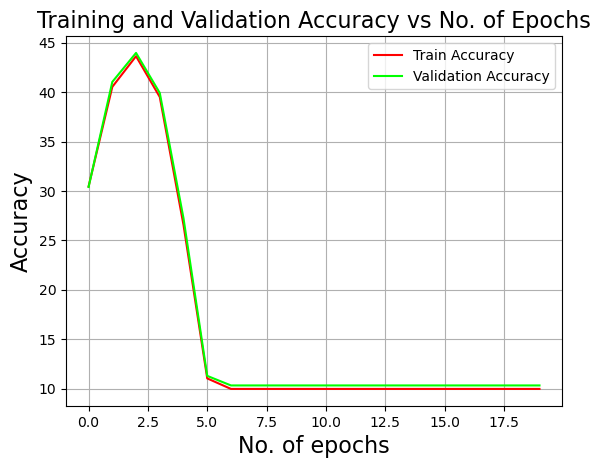

wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: bj8d1xy2 with config:
wandb: 	activation: relu_function
wandb: 	batch_size: 32
wandb: 	beta: 0.9
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	epochs: 5
wandb: 	lambd: 0.5
wandb: 	learning_rate: 0.1
wandb: 	loss: mean_squared_error_function
wandb: 	momentum: 0.9
wandb: 	neurons: 64
wandb: 	num_hidden_layers: 5
wandb: 	optimizer: nadam
wandb: 	weight_init: random_initialization


lr_0.1_acti_relu_function_w_inrandom_initialization_opt_nadam_epoch_5_num_hid_5_loss_mean_squared_error_function_batchsize_32_neur_64_lam_0.5_momentum_0.9_beta_0.9_beta1_0.9_beta2_0.999
neuron configuration: [784, 64, 64, 64, 64, 64, 10]


Run bj8d1xy2 errored: ValueError('The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()')
wandb: ERROR Run bj8d1xy2 errored: ValueError('The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()')
wandb: Agent Starting Run: gwm139bn with config:
wandb: 	activation: tanh_function
wandb: 	batch_size: 64
wandb: 	beta: 0.9
wandb: 	beta1: 0.9
wandb: 	beta2: 0.99
wandb: 	epochs: 5
wandb: 	lambd: 0.5
wandb: 	learning_rate: 0.1
wandb: 	loss: cross_entropy_function
wandb: 	momentum: 0.9
wandb: 	neurons: 64
wandb: 	num_hidden_layers: 4
wandb: 	optimizer: rms_prop
wandb: 	weight_init: xavier_initialization


lr_0.1_acti_tanh_function_w_inxavier_initialization_opt_rms_prop_epoch_5_num_hid_4_loss_cross_entropy_function_batchsize_64_neur_64_lam_0.5_momentum_0.9_beta_0.9_beta1_0.9_beta2_0.99
neuron configuration: [784, 64, 64, 64, 64, 10]
 
 epoch:   4  Train error:      7.43  Train accuracy:     9.63 Val error:     7.69 Val accuracy:     9.82


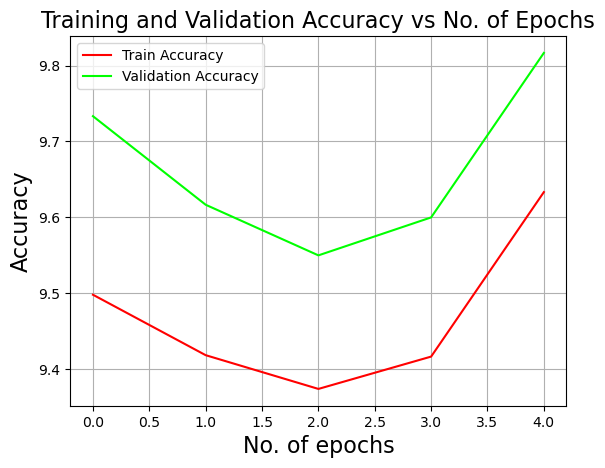

wandb: Agent Starting Run: 16qmnrj5 with config:
wandb: 	activation: identity_function
wandb: 	batch_size: 4
wandb: 	beta: 0.9
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	epochs: 20
wandb: 	lambd: 0.5
wandb: 	learning_rate: 0.01
wandb: 	loss: cross_entropy_function
wandb: 	momentum: 0.5
wandb: 	neurons: 128
wandb: 	num_hidden_layers: 5
wandb: 	optimizer: momentum_gradient_descent
wandb: 	weight_init: xavier_initialization


lr_0.01_acti_identity_function_w_inxavier_initialization_opt_momentum_gradient_descent_epoch_20_num_hid_5_loss_cross_entropy_function_batchsize_4_neur_128_lam_0.5_momentum_0.5_beta_0.9_beta1_0.9_beta2_0.999
neuron configuration: [784, 128, 128, 128, 128, 128, 10]
 
 epoch:  19  Train error:       nan  Train accuracy:    10.01 Val error:      nan Val accuracy:     9.95


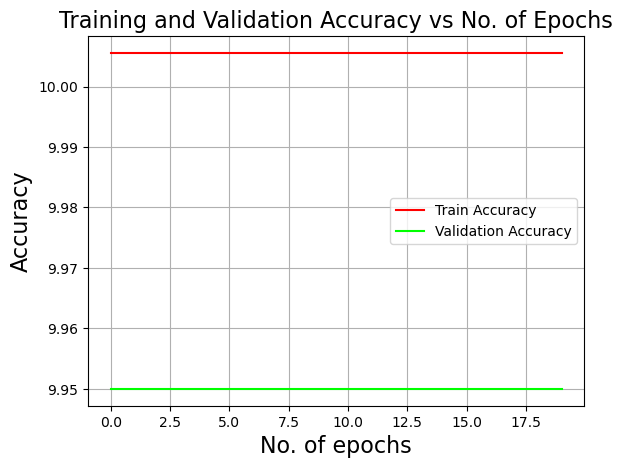

wandb: Agent Starting Run: ob2t16sy with config:
wandb: 	activation: sigmoid_function
wandb: 	batch_size: 16
wandb: 	beta: 0.5
wandb: 	beta1: 0.9
wandb: 	beta2: 0.99
wandb: 	epochs: 20
wandb: 	lambd: 0.5
wandb: 	learning_rate: 0.01
wandb: 	loss: mean_squared_error_function
wandb: 	momentum: 0.5
wandb: 	neurons: 128
wandb: 	num_hidden_layers: 3
wandb: 	optimizer: nadam
wandb: 	weight_init: xavier_initialization


lr_0.01_acti_sigmoid_function_w_inxavier_initialization_opt_nadam_epoch_20_num_hid_3_loss_mean_squared_error_function_batchsize_16_neur_128_lam_0.5_momentum_0.5_beta_0.5_beta1_0.9_beta2_0.99
neuron configuration: [784, 128, 128, 128, 10]
 
 epoch:  19  Train error:      2.30  Train accuracy:     9.96 Val error:     2.30 Val accuracy:    10.32


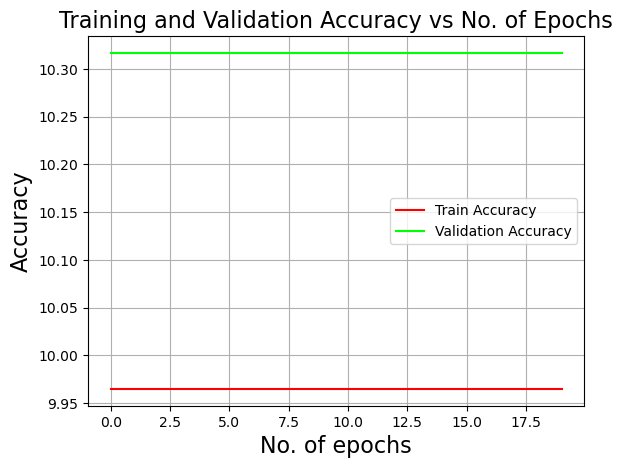

wandb: Agent Starting Run: ss0x1j1b with config:
wandb: 	activation: identity_function
wandb: 	batch_size: 64
wandb: 	beta: 0.5
wandb: 	beta1: 0.9
wandb: 	beta2: 0.99
wandb: 	epochs: 20
wandb: 	lambd: 0.5
wandb: 	learning_rate: 0.01
wandb: 	loss: cross_entropy_function
wandb: 	momentum: 0.8
wandb: 	neurons: 128
wandb: 	num_hidden_layers: 5
wandb: 	optimizer: rms_prop
wandb: 	weight_init: xavier_initialization


lr_0.01_acti_identity_function_w_inxavier_initialization_opt_rms_prop_epoch_20_num_hid_5_loss_cross_entropy_function_batchsize_64_neur_128_lam_0.5_momentum_0.8_beta_0.5_beta1_0.9_beta2_0.99
neuron configuration: [784, 128, 128, 128, 128, 128, 10]
 
 epoch:  19  Train error:       nan  Train accuracy:    10.01 Val error:      nan Val accuracy:     9.95


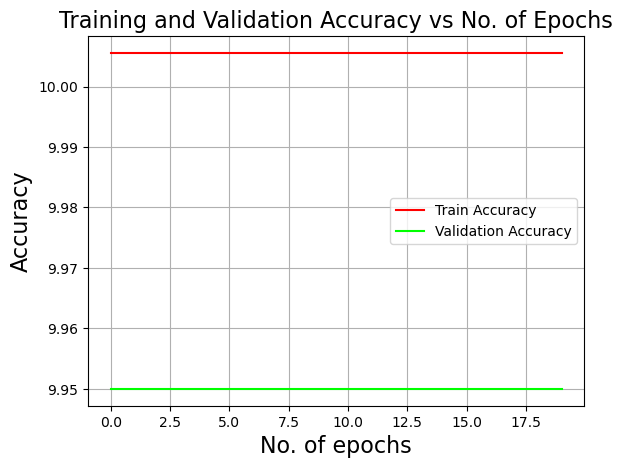

wandb: Agent Starting Run: tikdbjkx with config:
wandb: 	activation: identity_function
wandb: 	batch_size: 32
wandb: 	beta: 0.9
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	epochs: 40
wandb: 	lambd: 0
wandb: 	learning_rate: 0.0001
wandb: 	loss: cross_entropy_function
wandb: 	momentum: 0.5
wandb: 	neurons: 32
wandb: 	num_hidden_layers: 5
wandb: 	optimizer: vanilla_gradient_descent
wandb: 	weight_init: xavier_initialization


lr_0.0001_acti_identity_function_w_inxavier_initialization_opt_vanilla_gradient_descent_epoch_40_num_hid_5_loss_cross_entropy_function_batchsize_32_neur_32_lam_0_momentum_0.5_beta_0.9_beta1_0.9_beta2_0.999
neuron configuration: [784, 32, 32, 32, 32, 32, 10]
 
 epoch:  39  Train error:       nan  Train accuracy:    10.01 Val error:      nan Val accuracy:     9.95


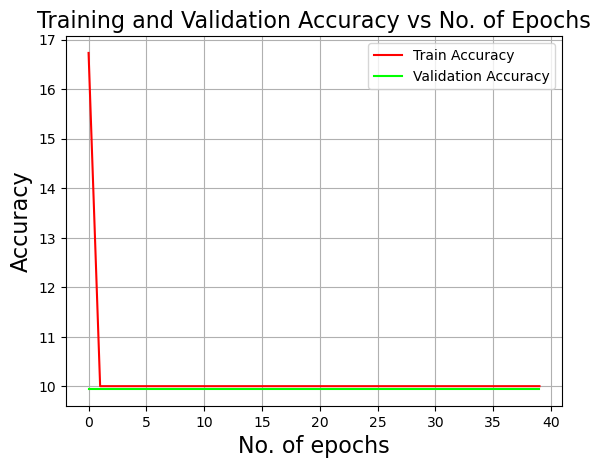

wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: lyftkxes with config:
wandb: 	activation: sigmoid_function
wandb: 	batch_size: 256
wandb: 	beta: 0.9
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	epochs: 5
wandb: 	lambd: 0.0005
wandb: 	learning_rate: 0.1
wandb: 	loss: cross_entropy_function
wandb: 	momentum: 0.8
wandb: 	neurons: 128
wandb: 	num_hidden_layers: 3
wandb: 	optimizer: vanilla_gradient_descent
wandb: 	weight_init: xavier_initialization


lr_0.1_acti_sigmoid_function_w_inxavier_initialization_opt_vanilla_gradient_descent_epoch_5_num_hid_3_loss_cross_entropy_function_batchsize_256_neur_128_lam_0.0005_momentum_0.8_beta_0.9_beta1_0.9_beta2_0.999
neuron configuration: [784, 128, 128, 128, 10]
 
 epoch:   4  Train error:      3.29  Train accuracy:     8.59 Val error:     3.13 Val accuracy:     8.95


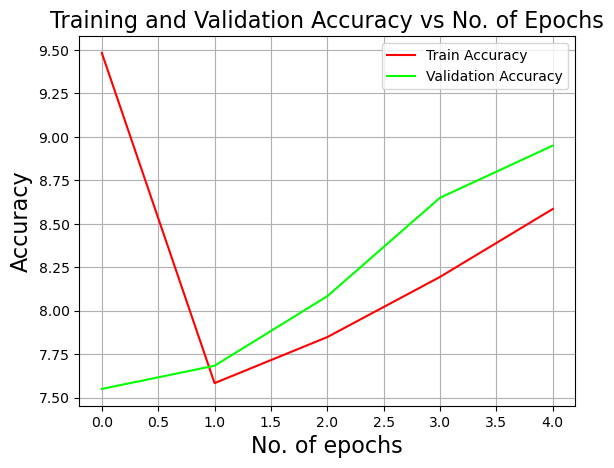

wandb: Agent Starting Run: rhxja0wz with config:
wandb: 	activation: sigmoid_function
wandb: 	batch_size: 4
wandb: 	beta: 0.5
wandb: 	beta1: 0.9
wandb: 	beta2: 0.99
wandb: 	epochs: 5
wandb: 	lambd: 0.5
wandb: 	learning_rate: 0.1
wandb: 	loss: mean_squared_error_function
wandb: 	momentum: 0.5
wandb: 	neurons: 64
wandb: 	num_hidden_layers: 3
wandb: 	optimizer: adam
wandb: 	weight_init: random_initialization


lr_0.1_acti_sigmoid_function_w_inrandom_initialization_opt_adam_epoch_5_num_hid_3_loss_mean_squared_error_function_batchsize_4_neur_64_lam_0.5_momentum_0.5_beta_0.5_beta1_0.9_beta2_0.99
neuron configuration: [784, 64, 64, 64, 10]
 
 epoch:   4  Train error:      2.32  Train accuracy:    10.01 Val error:     2.32 Val accuracy:     9.95


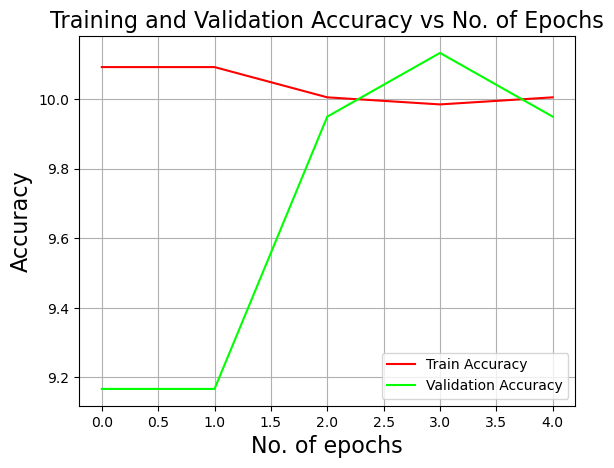

wandb: Agent Starting Run: pab4o9o3 with config:
wandb: 	activation: relu_function
wandb: 	batch_size: 128
wandb: 	beta: 0.9
wandb: 	beta1: 0.9
wandb: 	beta2: 0.99
wandb: 	epochs: 40
wandb: 	lambd: 0
wandb: 	learning_rate: 0.0001
wandb: 	loss: mean_squared_error_function
wandb: 	momentum: 0.5
wandb: 	neurons: 32
wandb: 	num_hidden_layers: 5
wandb: 	optimizer: rms_prop
wandb: 	weight_init: random_initialization


lr_0.0001_acti_relu_function_w_inrandom_initialization_opt_rms_prop_epoch_40_num_hid_5_loss_mean_squared_error_function_batchsize_128_neur_32_lam_0_momentum_0.5_beta_0.9_beta1_0.9_beta2_0.99
neuron configuration: [784, 32, 32, 32, 32, 32, 10]


Run pab4o9o3 errored: ValueError('The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()')
wandb: ERROR Run pab4o9o3 errored: ValueError('The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()')
wandb: Agent Starting Run: 3b8qafic with config:
wandb: 	activation: identity_function
wandb: 	batch_size: 4
wandb: 	beta: 0.5
wandb: 	beta1: 0.9
wandb: 	beta2: 0.99
wandb: 	epochs: 5
wandb: 	lambd: 0.5
wandb: 	learning_rate: 0.01
wandb: 	loss: cross_entropy_function
wandb: 	momentum: 0.5
wandb: 	neurons: 32
wandb: 	num_hidden_layers: 4
wandb: 	optimizer: momentum_gradient_descent
wandb: 	weight_init: random_initialization


lr_0.01_acti_identity_function_w_inrandom_initialization_opt_momentum_gradient_descent_epoch_5_num_hid_4_loss_cross_entropy_function_batchsize_4_neur_32_lam_0.5_momentum_0.5_beta_0.5_beta1_0.9_beta2_0.99
neuron configuration: [784, 32, 32, 32, 32, 10]
 
 epoch:   4  Train error:       nan  Train accuracy:    10.01 Val error:      nan Val accuracy:     9.95


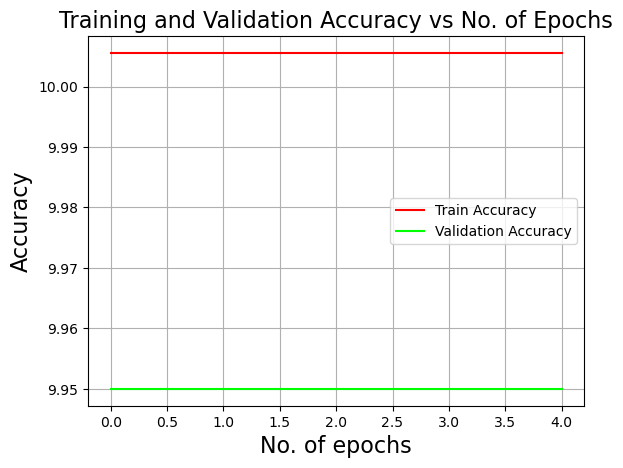

wandb: Agent Starting Run: rayposog with config:
wandb: 	activation: tanh_function
wandb: 	batch_size: 32
wandb: 	beta: 0.9
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	epochs: 20
wandb: 	lambd: 0.0005
wandb: 	learning_rate: 0.001
wandb: 	loss: cross_entropy_function
wandb: 	momentum: 0.8
wandb: 	neurons: 32
wandb: 	num_hidden_layers: 3
wandb: 	optimizer: rms_prop
wandb: 	weight_init: random_initialization


lr_0.001_acti_tanh_function_w_inrandom_initialization_opt_rms_prop_epoch_20_num_hid_3_loss_cross_entropy_function_batchsize_32_neur_32_lam_0.0005_momentum_0.8_beta_0.9_beta1_0.9_beta2_0.999
neuron configuration: [784, 32, 32, 32, 10]
 
 epoch:  19  Train error:      0.88  Train accuracy:    73.25 Val error:     0.90 Val accuracy:    72.93


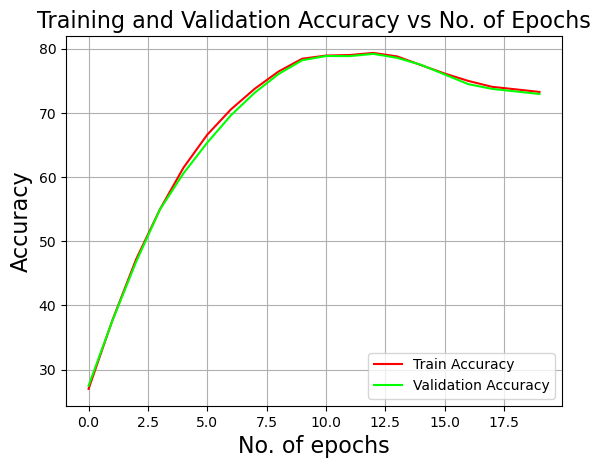

wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: me3dwj8s with config:
wandb: 	activation: relu_function
wandb: 	batch_size: 32
wandb: 	beta: 0.5
wandb: 	beta1: 0.9
wandb: 	beta2: 0.99
wandb: 	epochs: 40
wandb: 	lambd: 0.5
wandb: 	learning_rate: 0.01
wandb: 	loss: mean_squared_error_function
wandb: 	momentum: 0.5
wandb: 	neurons: 128
wandb: 	num_hidden_layers: 4
wandb: 	optimizer: nestorov_accelarated_gradient_descent
wandb: 	weight_init: random_initialization


lr_0.01_acti_relu_function_w_inrandom_initialization_opt_nestorov_accelarated_gradient_descent_epoch_40_num_hid_4_loss_mean_squared_error_function_batchsize_32_neur_128_lam_0.5_momentum_0.5_beta_0.5_beta1_0.9_beta2_0.99
neuron configuration: [784, 128, 128, 128, 128, 10]


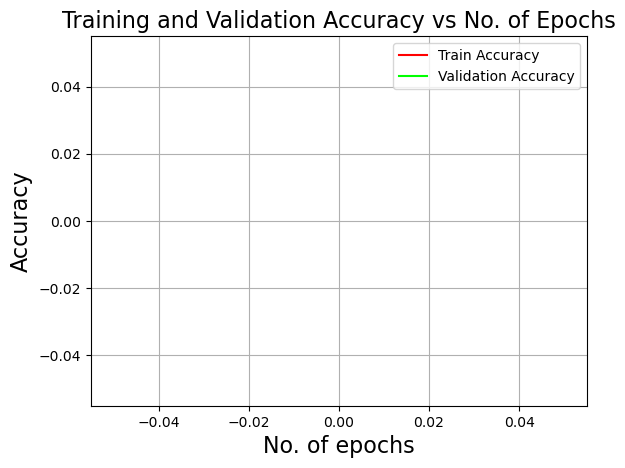

wandb: Agent Starting Run: 6sjhqnes with config:
wandb: 	activation: tanh_function
wandb: 	batch_size: 16
wandb: 	beta: 0.5
wandb: 	beta1: 0.9
wandb: 	beta2: 0.99
wandb: 	epochs: 40
wandb: 	lambd: 0
wandb: 	learning_rate: 0.001
wandb: 	loss: cross_entropy_function
wandb: 	momentum: 0.9
wandb: 	neurons: 64
wandb: 	num_hidden_layers: 3
wandb: 	optimizer: rms_prop
wandb: 	weight_init: random_initialization


lr_0.001_acti_tanh_function_w_inrandom_initialization_opt_rms_prop_epoch_40_num_hid_3_loss_cross_entropy_function_batchsize_16_neur_64_lam_0_momentum_0.9_beta_0.5_beta1_0.9_beta2_0.99
neuron configuration: [784, 64, 64, 64, 10]
 
 epoch:  39  Train error:      0.83  Train accuracy:    76.80 Val error:     0.87 Val accuracy:    75.83


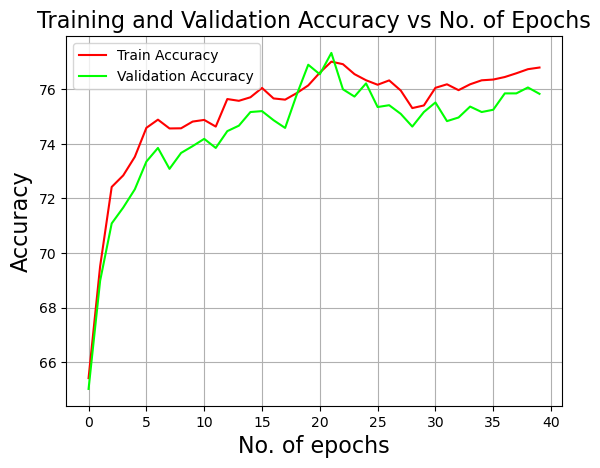

wandb: Agent Starting Run: rxuihkj1 with config:
wandb: 	activation: relu_function
wandb: 	batch_size: 128
wandb: 	beta: 0.9
wandb: 	beta1: 0.9
wandb: 	beta2: 0.99
wandb: 	epochs: 20
wandb: 	lambd: 0.5
wandb: 	learning_rate: 0.0001
wandb: 	loss: cross_entropy_function
wandb: 	momentum: 0.5
wandb: 	neurons: 32
wandb: 	num_hidden_layers: 4
wandb: 	optimizer: nadam
wandb: 	weight_init: random_initialization


lr_0.0001_acti_relu_function_w_inrandom_initialization_opt_nadam_epoch_20_num_hid_4_loss_cross_entropy_function_batchsize_128_neur_32_lam_0.5_momentum_0.5_beta_0.9_beta1_0.9_beta2_0.99
neuron configuration: [784, 32, 32, 32, 32, 10]


Run rxuihkj1 errored: ValueError('The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()')
wandb: ERROR Run rxuihkj1 errored: ValueError('The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()')
wandb: Agent Starting Run: ycz8nfn7 with config:
wandb: 	activation: sigmoid_function
wandb: 	batch_size: 256
wandb: 	beta: 0.5
wandb: 	beta1: 0.9
wandb: 	beta2: 0.99
wandb: 	epochs: 10
wandb: 	lambd: 0
wandb: 	learning_rate: 0.001
wandb: 	loss: mean_squared_error_function
wandb: 	momentum: 0.8
wandb: 	neurons: 64
wandb: 	num_hidden_layers: 4
wandb: 	optimizer: stochastic_gradient_descent
wandb: 	weight_init: xavier_initialization


lr_0.001_acti_sigmoid_function_w_inxavier_initialization_opt_stochastic_gradient_descent_epoch_10_num_hid_4_loss_mean_squared_error_function_batchsize_256_neur_64_lam_0_momentum_0.8_beta_0.5_beta1_0.9_beta2_0.99
neuron configuration: [784, 64, 64, 64, 64, 10]
 
 epoch:   9  Train error:      1.02  Train accuracy:    59.89 Val error:     1.01 Val accuracy:    59.42


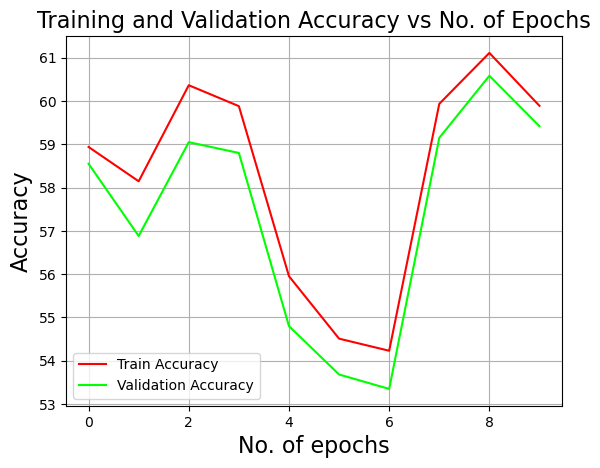

wandb: Agent Starting Run: uvwznxao with config:
wandb: 	activation: identity_function
wandb: 	batch_size: 32
wandb: 	beta: 0.5
wandb: 	beta1: 0.9
wandb: 	beta2: 0.99
wandb: 	epochs: 5
wandb: 	lambd: 0.0005
wandb: 	learning_rate: 0.01
wandb: 	loss: cross_entropy_function
wandb: 	momentum: 0.9
wandb: 	neurons: 64
wandb: 	num_hidden_layers: 5
wandb: 	optimizer: vanilla_gradient_descent
wandb: 	weight_init: random_initialization


lr_0.01_acti_identity_function_w_inrandom_initialization_opt_vanilla_gradient_descent_epoch_5_num_hid_5_loss_cross_entropy_function_batchsize_32_neur_64_lam_0.0005_momentum_0.9_beta_0.5_beta1_0.9_beta2_0.99
neuron configuration: [784, 64, 64, 64, 64, 64, 10]
 
 epoch:   4  Train error:       nan  Train accuracy:    10.01 Val error:      nan Val accuracy:     9.95


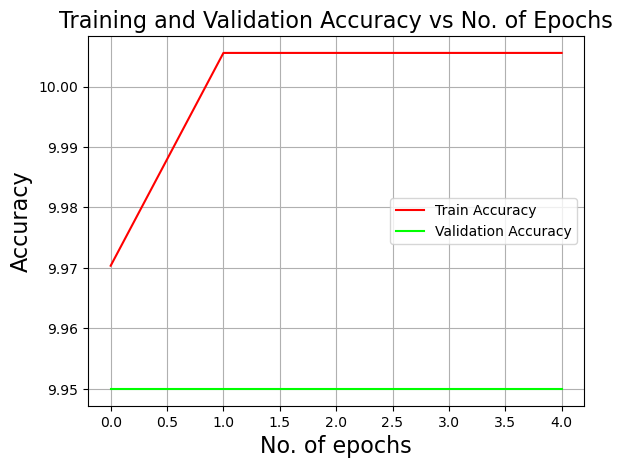

wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: f9qngh0k with config:
wandb: 	activation: sigmoid_function
wandb: 	batch_size: 32
wandb: 	beta: 0.9
wandb: 	beta1: 0.9
wandb: 	beta2: 0.99
wandb: 	epochs: 40
wandb: 	lambd: 0.0005
wandb: 	learning_rate: 0.01
wandb: 	loss: cross_entropy_function
wandb: 	momentum: 0.9
wandb: 	neurons: 32
wandb: 	num_hidden_layers: 5
wandb: 	optimizer: nestorov_accelarated_gradient_descent
wandb: 	weight_init: random_initialization


lr_0.01_acti_sigmoid_function_w_inrandom_initialization_opt_nestorov_accelarated_gradient_descent_epoch_40_num_hid_5_loss_cross_entropy_function_batchsize_32_neur_32_lam_0.0005_momentum_0.9_beta_0.9_beta1_0.9_beta2_0.99
neuron configuration: [784, 32, 32, 32, 32, 32, 10]


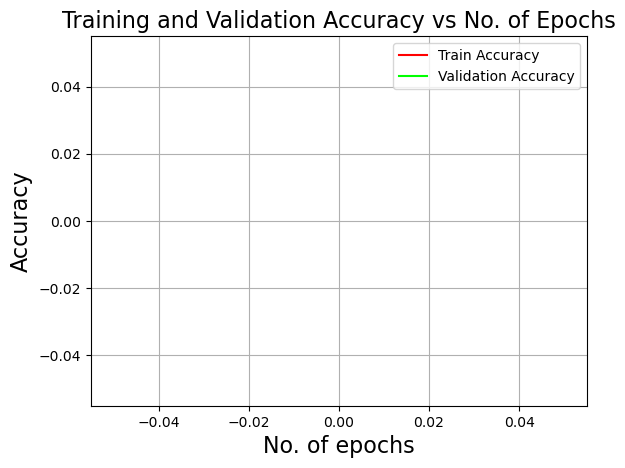

wandb: Agent Starting Run: o2d4crag with config:
wandb: 	activation: identity_function
wandb: 	batch_size: 256
wandb: 	beta: 0.5
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	epochs: 40
wandb: 	lambd: 0
wandb: 	learning_rate: 0.01
wandb: 	loss: cross_entropy_function
wandb: 	momentum: 0.8
wandb: 	neurons: 128
wandb: 	num_hidden_layers: 4
wandb: 	optimizer: rms_prop
wandb: 	weight_init: random_initialization


lr_0.01_acti_identity_function_w_inrandom_initialization_opt_rms_prop_epoch_40_num_hid_4_loss_cross_entropy_function_batchsize_256_neur_128_lam_0_momentum_0.8_beta_0.5_beta1_0.9_beta2_0.999
neuron configuration: [784, 128, 128, 128, 128, 10]
 
 epoch:  39  Train error:       nan  Train accuracy:    10.01 Val error:      nan Val accuracy:     9.95


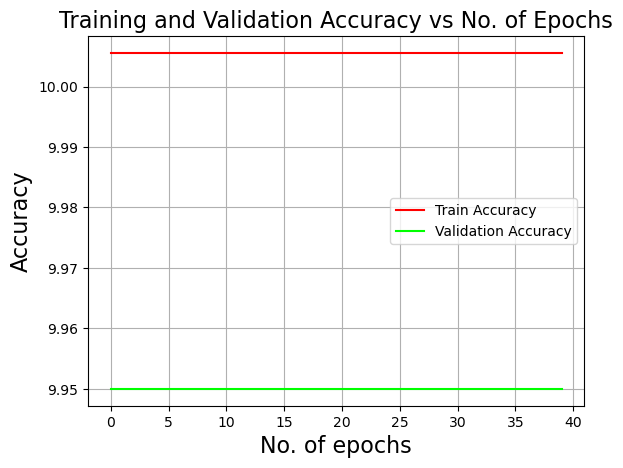

wandb: Agent Starting Run: dezluyc0 with config:
wandb: 	activation: sigmoid_function
wandb: 	batch_size: 256
wandb: 	beta: 0.5
wandb: 	beta1: 0.9
wandb: 	beta2: 0.99
wandb: 	epochs: 10
wandb: 	lambd: 0.5
wandb: 	learning_rate: 0.1
wandb: 	loss: mean_squared_error_function
wandb: 	momentum: 0.8
wandb: 	neurons: 128
wandb: 	num_hidden_layers: 5
wandb: 	optimizer: stochastic_gradient_descent
wandb: 	weight_init: xavier_initialization


lr_0.1_acti_sigmoid_function_w_inxavier_initialization_opt_stochastic_gradient_descent_epoch_10_num_hid_5_loss_mean_squared_error_function_batchsize_256_neur_128_lam_0.5_momentum_0.8_beta_0.5_beta1_0.9_beta2_0.99
neuron configuration: [784, 128, 128, 128, 128, 128, 10]
 
 epoch:   9  Train error:      2.32  Train accuracy:     9.99 Val error:     2.33 Val accuracy:    10.13


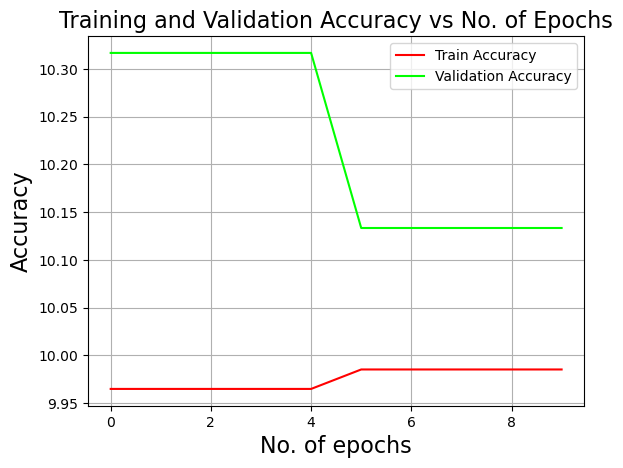

wandb: Agent Starting Run: 38io37mk with config:
wandb: 	activation: relu_function
wandb: 	batch_size: 16
wandb: 	beta: 0.9
wandb: 	beta1: 0.9
wandb: 	beta2: 0.99
wandb: 	epochs: 20
wandb: 	lambd: 0.5
wandb: 	learning_rate: 0.001
wandb: 	loss: cross_entropy_function
wandb: 	momentum: 0.8
wandb: 	neurons: 128
wandb: 	num_hidden_layers: 5
wandb: 	optimizer: nadam
wandb: 	weight_init: random_initialization


lr_0.001_acti_relu_function_w_inrandom_initialization_opt_nadam_epoch_20_num_hid_5_loss_cross_entropy_function_batchsize_16_neur_128_lam_0.5_momentum_0.8_beta_0.9_beta1_0.9_beta2_0.99
neuron configuration: [784, 128, 128, 128, 128, 128, 10]


Run 38io37mk errored: ValueError('The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()')
wandb: ERROR Run 38io37mk errored: ValueError('The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()')
wandb: Agent Starting Run: trnb6fg3 with config:
wandb: 	activation: tanh_function
wandb: 	batch_size: 128
wandb: 	beta: 0.9
wandb: 	beta1: 0.9
wandb: 	beta2: 0.99
wandb: 	epochs: 10
wandb: 	lambd: 0
wandb: 	learning_rate: 0.01
wandb: 	loss: cross_entropy_function
wandb: 	momentum: 0.5
wandb: 	neurons: 128
wandb: 	num_hidden_layers: 4
wandb: 	optimizer: stochastic_gradient_descent
wandb: 	weight_init: random_initialization


lr_0.01_acti_tanh_function_w_inrandom_initialization_opt_stochastic_gradient_descent_epoch_10_num_hid_4_loss_cross_entropy_function_batchsize_128_neur_128_lam_0_momentum_0.5_beta_0.9_beta1_0.9_beta2_0.99
neuron configuration: [784, 128, 128, 128, 128, 10]
 
 epoch:   9  Train error:      0.60  Train accuracy:    78.74 Val error:     0.62 Val accuracy:    77.80


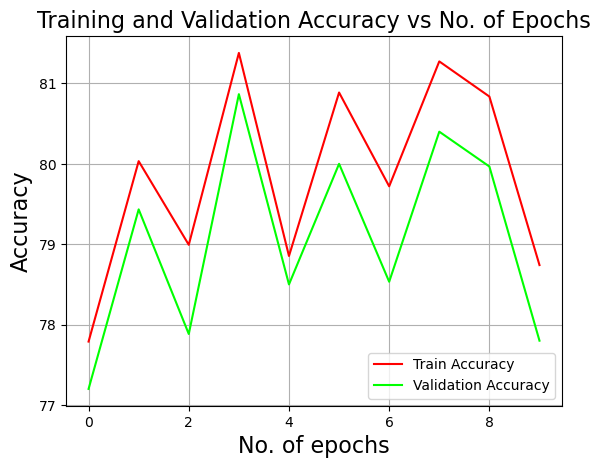

wandb: Agent Starting Run: t6rftvg2 with config:
wandb: 	activation: identity_function
wandb: 	batch_size: 16
wandb: 	beta: 0.9
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	epochs: 40
wandb: 	lambd: 0.5
wandb: 	learning_rate: 0.1
wandb: 	loss: mean_squared_error_function
wandb: 	momentum: 0.5
wandb: 	neurons: 128
wandb: 	num_hidden_layers: 4
wandb: 	optimizer: nadam
wandb: 	weight_init: xavier_initialization


lr_0.1_acti_identity_function_w_inxavier_initialization_opt_nadam_epoch_40_num_hid_4_loss_mean_squared_error_function_batchsize_16_neur_128_lam_0.5_momentum_0.5_beta_0.9_beta1_0.9_beta2_0.999
neuron configuration: [784, 128, 128, 128, 128, 10]


wandb: ERROR Error while calling W&B API: could not find agent gak3g906 during agentHeartbeat (<Response [404]>)
Exception in thread Thread-10:
Traceback (most recent call last):
  File "C:\Users\anant\anaconda3\lib\site-packages\wandb\sdk\lib\retry.py", line 131, in __call__
    result = self._call_fn(*args, **kwargs)
  File "C:\Users\anant\anaconda3\lib\site-packages\wandb\sdk\internal\internal_api.py", line 242, in execute
    return self.client.execute(*args, **kwargs)  # type: ignore
  File "C:\Users\anant\anaconda3\lib\site-packages\wandb\vendor\gql-0.2.0\wandb_gql\client.py", line 52, in execute
    result = self._get_result(document, *args, **kwargs)
  File "C:\Users\anant\anaconda3\lib\site-packages\wandb\vendor\gql-0.2.0\wandb_gql\client.py", line 60, in _get_result
    return self.transport.execute(document, *args, **kwargs)
  File "C:\Users\anant\anaconda3\lib\site-packages\wandb\vendor\gql-0.2.0\wandb_gql\transport\requests.py", line 39, in execute
    request.raise_for_st

In [ ]:
sweep_config = {
  "name": "Loss and Accuracy",
  "metric": {
      "name":"accuracy_validation",
      "goal": "maximize"
  },
  "method": "random",
  "parameters": {
        "learning_rate": {
            "values": [0.1,0.01,0.001, 0.0001]
        },
        "activation": {
            "values": ["sigmoid_function", "relu_function", "tanh_function","identity_function"]
        },
        "weight_init": {
            "values": ["xavier_initialization", "random_initialization"]
        },
        "optimizer": {
            "values": ["vanilla_gradient_descent","stochastic_gradient_descent", "momentum_gradient_descent", "nestorov_accelarated_gradient_descent", "adam", "nadam", "rms_prop"]
        },
        "batch_size": {
            "values": [4,16,32,64,128,256]
        },
        "epochs": {
            "values": [5, 10, 20, 40]
        },
        "lambd": {
            "values": [0, 0.0005, 0.5]
        },
        "neurons": {
            "values": [32, 64, 128]
        },
        "num_hidden_layers": {
            "values": [3, 4, 5]
        },
        "momentum": {
            "values": [0.5,0.8,0.9]
        },
        "beta": {
            "values": [0.5,0.9]
        },
        "beta1": {
            "values": [0.9]
        },
        "beta2": {
            "values": [0.99,0.999]
        },
        "loss": {
            "values": ['cross_entropy_function','mean_squared_error_function']
        }
    }
}

sweep_id = wandb.sweep(sweep_config, project="CS6910_ASSIGNMENT_1")
wandb.agent(sweep_id, neural_network, count=150)

